In [7]:
import re
import glob

#SNPs

paths_SNV=glob.glob('../*.exonic_variant_function')

def get_somatic_snps(path):
    somatic_mutations_annotation={}
    counts_dic={}
    with open(path) as infile:
        for line in infile:
            temp=line.strip().split('\t')
            chrom,pos,ref_nt,alt_nt=[temp[3],temp[4],temp[6],temp[7]]

            mutation_type=temp[1]
            gene_name=temp[2].split(':')[0]
            ref,alt=[0,0]
            if temp[-1].split(':')[0]=='0/1':
                ref,alt=temp[-1].split(':')[1].split(',')
            else:
                ref,alt=temp[-2].split(':')[1].split(',')
            ref=int(ref)
            alt=int(alt)
            vaf=alt/(ref+alt)
            if mutation_type in somatic_mutations_annotation:
                counts_dic[mutation_type]+=1
                if gene_name in somatic_mutations_annotation[mutation_type]:
                    somatic_mutations_annotation[mutation_type][gene_name].append(vaf)
                else:
                    somatic_mutations_annotation[mutation_type][gene_name]=[vaf]
            else:
                counts_dic[mutation_type]=1
                somatic_mutations_annotation[mutation_type]={}
                somatic_mutations_annotation[mutation_type][gene_name]=[vaf]
    return somatic_mutations_annotation,counts_dic

dic_SNP={}
dic_counts={}
for path in paths_SNV:
    ID=re.search(r'\d+',path).group()
    dic_SNP[ID]=get_somatic_snps(path)[0]
    dic_counts[ID]=get_somatic_snps(path)[1]
dic_counts

{'13': {'synonymous SNV': 27, 'nonsynonymous SNV': 64, 'stoploss': 1},
 '16': {'nonsynonymous SNV': 151,
  'synonymous SNV': 62,
  'unknown': 3,
  'stopgain': 8,
  'stoploss': 1},
 '9': {'synonymous SNV': 4, 'nonsynonymous SNV': 4, 'unknown': 1},
 '27': {'unknown': 3,
  'stopgain': 2,
  'synonymous SNV': 10,
  'nonsynonymous SNV': 16},
 '17': {'nonsynonymous SNV': 90,
  'synonymous SNV': 28,
  'unknown': 1,
  'stopgain': 4},
 '26': {'unknown': 1, 'nonsynonymous SNV': 7, 'synonymous SNV': 2},
 '18': {'nonsynonymous SNV': 21, 'synonymous SNV': 7, 'unknown': 1},
 '34': {'nonsynonymous SNV': 11, 'synonymous SNV': 2},
 '7': {'stopgain': 5,
  'nonsynonymous SNV': 33,
  'synonymous SNV': 29,
  'unknown': 4},
 '23': {'synonymous SNV': 7, 'nonsynonymous SNV': 14},
 '11': {'synonymous SNV': 43,
  'nonsynonymous SNV': 114,
  'unknown': 2,
  'stopgain': 4},
 '20': {'synonymous SNV': 15, 'nonsynonymous SNV': 13},
 '48': {'nonsynonymous SNV': 75,
  'unknown': 4,
  'synonymous SNV': 33,
  'stopgain':

In [35]:
for i in sorted(list(dic_counts.keys()),key=lambda x:int(x)):
    num=0
    for j in dic_counts[i]:
        if j!='synonymous SNV' and j!='unknown':
            num+=dic_counts[i][j]
    print('\t'.join([i,str(num)]))
    

1	69
2	128
3	54
4	143
5	90
6	252
7	38
8	158
9	4
10	120
11	118
12	57
13	65
14	120
15	35
16	160
17	94
18	21
20	13
21	65
22	41
23	14
24	82
26	7
27	18
28	23
30	21
33	51
34	11
36	26
38	13
48	78
49	86
51	66
52	51
54	1098


In [2]:
dic_SNP

{'13': {'synonymous SNV': {'GRIK3': [0.07194244604316546],
   'SYT11': [0.08955223880597014],
   'CTNNA2': [0.14285714285714285],
   'TTN': [0.07894736842105263],
   'COL3A1': [0.18181818181818182],
   'ERICH6': [0.05263157894736842],
   'CDH6': [0.128],
   'CMYA5': [0.08450704225352113],
   'COL12A1': [0.1320754716981132],
   'CRYBG1': [0.0898876404494382],
   'MUC17': [0.02671118530884808],
   'SLC26A4': [0.061224489795918366],
   'DGKI': [0.08],
   'ACTR3C': [0.04597701149425287],
   'CNPY1': [0.075],
   'C8orf87': [0.14074074074074075],
   'GRINA': [0.1],
   'C8orf82': [0.125],
   'TNC': [0.15517241379310345],
   'ANGPTL2': [0.11347517730496454],
   'TPTE2': [0.10714285714285714],
   'KLHL25': [0.06696428571428571],
   'GRIN2A': [0.07228915662650602],
   'GP1BA': [0.3076923076923077],
   'HOXB2': [0.13402061855670103],
   'SALL3': [0.09821428571428571],
   'AFF2': [0.1267605633802817]},
  'nonsynonymous SNV': {'RPTN': [0.5294117647058824],
   'FCRL1': [0.10743801652892562],
   'KCN

In [40]:
#indels

import pandas as pd

df=pd.read_csv('../high_confidence_somatic_indels.txt',sep='\t')
df

chrom        pos  ref                    alt  \
0      chr1   28531827   GT                      G   
1     chr19   51857627  GCC                      G   
2      chrX   55514607   CA                      C   
3     chr19    9073432  TGG                      T   
4     chr10    1065667   GT                      G   
...     ...        ...  ...                    ...   
4608  chr17    4402643    C                     CG   
4609  chr16   71163544    A                     AT   
4610   chr2   71901368    A  AGCACGACGCTCCTCCGATCT   
4611   chr8   10583951    G                     GC   
4612   chr1  118539321    A                     AT   

                                       sample_ID  num_of_samples annotation  \
0                           30,somatic,26,4,21,0               1     DNAJC8   
1                           8,somatic,149,8,62,0               1       ETFB   
2                           12,somatic,20,4,20,0               1      USP51   
3                           51,somatic,52,4,48,0               1      MUC16   
4                          54,somatic,106,6,30,0               1       IDI2   
...                                          ...             ...        ...   
4608                         3,somatic,82,5,15,0               1      SPNS2   
4609                        10,somatic,63,6,15,0               1      HYDIN   
4610                        34,somatic,36,4,17,0               1       DYSF   
4611  15,somatic,54,4,30,0;48,somatic,123,6,32,0               2       SOX7   
4612                        52,somatic,45,4,27,0               1     SPAG17   

     mutation_significance  
0      frameshift deletion  
1      frameshift deletion  
2      frameshift deletion  
3      frameshift deletion  
4      frameshift deletion  
...                    ...  
4608  frameshift insertion  
4609  frameshift insertion  
4610  frameshift insertion  
4611  frameshift insertion  
4612  frameshift insertion  

[4613 rows x 8 columns]

In [6]:
set(df['mutation_significance'])

{'frameshift deletion',
 'frameshift insertion',
 'frameshift substitution',
 'nonsynonymous SNV',
 'stopgain',
 'stoploss'}

In [45]:
'ATR' in set(df['annotation'])

True

In [43]:
len(set(df['annotation']))

3665

In [4]:
indel_dic={}
count_dic1={}

for i in df.index:
    sample_ID=[j.split(',')[0] for j in df.loc[i,'sample_ID'].split(';')]
    vafs=[int(j.split(',')[3])/(int(j.split(',')[2])+int(j.split(',')[3])) for j in df.loc[i,'sample_ID'].split(';')]
    annotation=df.loc[i,'annotation']
    mutation_significance=df.loc[i,'mutation_significance']
    for j,k in zip(sample_ID,vafs):
        if j in count_dic1:
            count_dic1[j]+=1
        else:
            count_dic1[j]=1
        if j in indel_dic:
            if mutation_significance in indel_dic[j]:
                indel_dic[j][mutation_significance][annotation]=k
            else:
                indel_dic[j][mutation_significance]={}
                indel_dic[j][mutation_significance][annotation]=k
        else:
            indel_dic[j]={}
            indel_dic[j][mutation_significance]={}
            indel_dic[j][mutation_significance][annotation]=k

count_dic1      

{'30': 124,
 '8': 194,
 '12': 119,
 '51': 140,
 '54': 63,
 '36': 175,
 '23': 127,
 '9': 140,
 '6': 186,
 '10': 108,
 '7': 126,
 '1': 184,
 '28': 93,
 '3': 79,
 '16': 155,
 '24': 159,
 '2': 99,
 '15': 110,
 '38': 241,
 '4': 80,
 '34': 229,
 '5': 155,
 '14': 141,
 '17': 85,
 '21': 90,
 '33': 94,
 '26': 172,
 '20': 63,
 '18': 124,
 '49': 138,
 '13': 165,
 '27': 133,
 '48': 141,
 '22': 121,
 '11': 93,
 '52': 115}

In [5]:
for i in sorted(count_dic1.keys(),key=lambda x:int(x)):
    print('\t'.join([str(i),str(count_dic1[i])]))

1	184
2	99
3	79
4	80
5	155
6	186
7	126
8	194
9	140
10	108
11	93
12	119
13	165
14	141
15	110
16	155
17	85
18	124
20	63
21	90
22	121
23	127
24	159
26	172
27	133
28	93
30	124
33	94
34	229
36	175
38	241
48	141
49	138
51	140
52	115
54	63


In [7]:
count_dic2={}
for ID in dic_SNP:
    count=0
    for i in dic_SNP[ID]:
        if i!='synonymous SNV':
            count+=len(dic_SNP[ID][i])
    count_dic2[ID]=count
count_dic2

{'13': 64,
 '16': 158,
 '9': 5,
 '27': 19,
 '17': 95,
 '26': 8,
 '18': 20,
 '34': 7,
 '7': 36,
 '23': 14,
 '11': 116,
 '20': 12,
 '48': 76,
 '6': 249,
 '4': 141,
 '8': 156,
 '24': 81,
 '33': 50,
 '51': 67,
 '14': 119,
 '49': 77,
 '3': 53,
 '2': 124,
 '38': 13,
 '36': 26,
 '5': 88,
 '52': 52,
 '1': 69,
 '10': 115,
 '30': 20,
 '28': 19,
 '15': 35,
 '54': 861,
 '12': 57,
 '22': 39,
 '21': 64}

In [8]:
for i in sorted(count_dic2.keys(),key=lambda x:int(x)):
    print('\t'.join([str(i),str(count_dic2[i])]))

1	69
2	124
3	53
4	141
5	88
6	249
7	36
8	156
9	5
10	115
11	116
12	57
13	64
14	119
15	35
16	158
17	95
18	20
20	12
21	64
22	39
23	14
24	81
26	8
27	19
28	19
30	20
33	50
34	7
36	26
38	13
48	76
49	77
51	67
52	52
54	861


In [33]:
np.mean(list(count_dic2.values()))

89.02777777777777

In [14]:

def get_synonymous_snps(paths):
    synonymous_SNVs_dic={}
    for path in paths:
        with open(path) as infile:
            for line in infile:
                temp=line.strip().split('\t')
                chrom,pos,ref_nt,alt_nt=[temp[3],temp[4],temp[6],temp[7]]

                mutation_type=temp[1]
                gene_name=temp[2].split(':')[0]
                ref,alt=[0,0]
                if temp[-1].split(':')[0]=='0/1':
                    ref,alt=temp[-1].split(':')[1].split(',')
                else:
                    ref,alt=temp[-2].split(':')[1].split(',')
                ref=int(ref)
                alt=int(alt)
                vaf=alt/(ref+alt)
                if mutation_type=='synonymous SNV' or mutation_type=='unknown':
                    synonymous_SNVs_dic[(chrom,pos,ref_nt,alt_nt)]=1
    return synonymous_SNVs_dic


paths_SNV=glob.glob('../*.exonic_variant_function')
synonymous_SNVs_dic=get_synonymous_snps(paths_SNV)
synonymous_SNVs_dic

{('chr1', '37271868', 'C', 'T'): 1,
 ('chr1', '155851290', 'C', 'T'): 1,
 ('chr2', '79878712', 'G', 'T'): 1,
 ('chr2', '179528601', 'G', 'A'): 1,
 ('chr2', '189868722', 'C', 'T'): 1,
 ('chr3', '150421527', 'C', 'T'): 1,
 ('chr5', '31323298', 'G', 'A'): 1,
 ('chr5', '79030117', 'T', 'C'): 1,
 ('chr6', '75827180', 'G', 'A'): 1,
 ('chr6', '106968077', 'C', 'T'): 1,
 ('chr7', '100684675', 'C', 'T'): 1,
 ('chr7', '107341590', 'G', 'A'): 1,
 ('chr7', '137080374', 'T', 'A'): 1,
 ('chr7', '149992380', 'G', 'A'): 1,
 ('chr7', '155299758', 'C', 'T'): 1,
 ('chr8', '94146988', 'G', 'A'): 1,
 ('chr8', '145066650', 'C', 'G'): 1,
 ('chr8', '145752912', 'G', 'A'): 1,
 ('chr9', '117810762', 'G', 'A'): 1,
 ('chr9', '129856039', 'G', 'A'): 1,
 ('chr13', '20025336', 'A', 'G'): 1,
 ('chr15', '86312937', 'G', 'A'): 1,
 ('chr16', '9916144', 'G', 'A'): 1,
 ('chr17', '4837171', 'G', 'A'): 1,
 ('chr17', '46621917', 'G', 'A'): 1,
 ('chr18', '76753758', 'C', 'T'): 1,
 ('chrX', '147743965', 'G', 'A'): 1,
 ('chr1',

In [10]:

for ID in dic_SNP:
    for i in dic_SNP[ID]:
        if i=='synonymous SNV':
            print(dic_SNP[ID][i])

{'GRIK3': [0.07194244604316546], 'SYT11': [0.08955223880597014], 'CTNNA2': [0.14285714285714285], 'TTN': [0.07894736842105263], 'COL3A1': [0.18181818181818182], 'ERICH6': [0.05263157894736842], 'CDH6': [0.128], 'CMYA5': [0.08450704225352113], 'COL12A1': [0.1320754716981132], 'CRYBG1': [0.0898876404494382], 'MUC17': [0.02671118530884808], 'SLC26A4': [0.061224489795918366], 'DGKI': [0.08], 'ACTR3C': [0.04597701149425287], 'CNPY1': [0.075], 'C8orf87': [0.14074074074074075], 'GRINA': [0.1], 'C8orf82': [0.125], 'TNC': [0.15517241379310345], 'ANGPTL2': [0.11347517730496454], 'TPTE2': [0.10714285714285714], 'KLHL25': [0.06696428571428571], 'GRIN2A': [0.07228915662650602], 'GP1BA': [0.3076923076923077], 'HOXB2': [0.13402061855670103], 'SALL3': [0.09821428571428571], 'AFF2': [0.1267605633802817]}
{'F11R': [0.22388059701492538], 'DUSP10': [0.3333333333333333], 'HNRNPU': [0.1875], 'ROCK2': [0.275], 'SEMA4F': [0.375, 0.38461538461538464], 'NEB': [0.21875], 'ACVR1': [0.11904761904761904], 'IHH': [0

In [15]:
mutation_dic={'frameshift deletion':'mis-sense','frameshift insertion':'mis-sense',
              'frameshift substitution':'mis-sense','nonsynonymous SNV':'mis-sense',
              'stopgain':'non-sense','stoploss':'non-sense'}

mutation_types=['frameshift deletion','frameshift insertion',
                'frameshift substitution','nonsynonymous SNV',
                'stopgain','stoploss']
all_genes=set()
for ID in indel_dic:
    for i in indel_dic[ID].keys():
        if i in mutation_types:
            for j in indel_dic[ID][i].keys():
                all_genes.add(j)  
    for i in dic_SNP[ID].keys():
        if i in mutation_types:
            for j in dic_SNP[ID][i].keys():
                all_genes.add(j)

all_genes=list(all_genes)

all_dic={}
for ID in indel_dic:
    temp={}
    for i in mutation_types:
        if i in indel_dic[ID]:
            for j in indel_dic[ID][i].keys():
                if j in temp:
                    temp[j].add(i)
                else:
                    temp[j]=set([i])   
        if i in dic_SNP[ID]:
            for j in dic_SNP[ID][i].keys():
                if j in temp:
                    temp[j].add(i)
                else:
                    temp[j]=set([i])
    all_dic[ID]=temp
for ID in all_dic:
    for gene in all_dic[ID]:
        Type=set()
        for i in all_dic[ID][gene]:
            Type.add(mutation_dic[i])
        if len(Type)==2:
            all_dic[ID][gene]=3
        else:
            if 'mis-sense' in Type:
                all_dic[ID][gene]=1
            elif 'non-sense' in Type:
                all_dic[ID][gene]=2
                
data=[]
samples_ID=list(all_dic.keys())
for gene in all_genes:
    temp=[]
    for ID in samples_ID:
        if gene in all_dic[ID]:
            temp.append(all_dic[ID][gene])
        else:
            temp.append(0)
    data.append(temp)
df=pd.DataFrame(data,index=all_genes,columns=samples_ID)

oreder_data=[]
samples_ID=list(all_dic.keys())
for gene in all_genes:
    temp=[]
    for ID in samples_ID:
        if gene in all_dic[ID]:
            temp.append(1)
        else:
            temp.append(0)
    oreder_data.append(temp)
order_df=pd.DataFrame(oreder_data,index=all_genes,columns=samples_ID)

recurrent_gene_list=[]
for j in sorted([[i,len(df.columns[df.loc[i,:]!=0])] for i in df.index],key=lambda x:x[1],reverse=True)[:50]:
    recurrent_gene_list.append(j[0])

print('Highly reccurent mutation genes:',recurrent_gene_list)
    
order=order_df.T.sort_values(recurrent_gene_list,ascending=[False]*50).T.loc[recurrent_gene_list,:]

paths=glob.glob('/home/chenhaojie/桌面/Xu_lab/ANNOVAR/SNVs/*.PASS.vcf')
def get_base_subsitutions(path,dic):
    base_subsitutions={}
    dic={'A':'T','T':'A','C':'G','G':'C'}
    with open(path) as infile:
        for line in infile:
            if '#' in line:
                continue
            temp=line.strip().split('\t')
            chrom,pos,ref_nt,alt_nt=[temp[3],temp[4],temp[6],temp[7]]
            if (chrom,pos,ref_nt,alt_nt) in dic:
                continue
            else:
                ref,alt=temp[3:5]
                Type=''
                if ref=='C' or ref=='T':
                    Type=ref+'>'+alt
                else:
                    Type=dic[ref]+'>'+dic[alt]
                if Type in base_subsitutions:
                    base_subsitutions[Type]+=1
                else:
                    base_subsitutions[Type]=1
    return base_subsitutions

base_subsitutions_dic={}
for path in paths:
    ID=re.search(r'\d+',path).group()
    base_subsitutions_dic[ID]=get_base_subsitutions(path,synonymous_SNVs_dic)
    
base_subsitution_df=pd.DataFrame(base_subsitutions_dic)    
    
base_subsitutions_type=['C>A','C>G','C>T','T>A','T>C','T>G']

base_subsitution_fraction_df=base_subsitution_df/base_subsitution_df.sum(axis=0)
base_subsitution_fraction_df=base_subsitution_fraction_df.loc[base_subsitutions_type,order.columns]
base_subsitution_fraction_df

Highly reccurent mutation genes: ['TTN', 'KMT2C', 'TP53', 'MUC5B', 'ANKRD36C', 'MUC16', 'FSIP2', 'SHANK1', 'PCLO', 'GOLGA6A', 'FRG1', 'AHNAK2', 'CEP162', 'SACS', 'CCDC168', 'MUC4', 'DST', 'ARID1A', 'GOLGA6L3', 'GOLGA6L10', 'CRIPAK', 'CDH8', 'IGSF10', 'DNAH9', 'OTOG', 'MDN1', 'FAT3', 'ABCA13', 'DISP3', 'SYNE1', 'AFAP1', 'LRP1B', 'GNAS', 'F8', 'LIG4', 'ZFHX4', 'MUC12', 'ITPR2', 'RPTN', 'SPTA1', 'NSD1', 'HYDIN', 'POTEM', 'BSN', 'FLCN', 'PRRC2C', 'PCDHB7', 'DYSF', 'JMJD1C', 'ZNF708']


5        30        28        49         3        23         2  \
C>A  0.116327  0.106383  0.085938  0.083871  0.122449  0.065217  0.153689   
C>G  0.089796  0.127660  0.140625  0.135484  0.085034  0.152174  0.104508   
C>T  0.414286  0.372340  0.343750  0.410753  0.401361  0.369565  0.409836   
T>A  0.102041  0.042553  0.039062  0.055914  0.040816  0.094203  0.047131   
T>C  0.155102  0.207447  0.304688  0.240860  0.221088  0.188406  0.176230   
T>G  0.122449  0.143617  0.085938  0.073118  0.129252  0.130435  0.108607   

            8        10        21  ...         7        27        52  \
C>A  0.130781  0.091429  0.145594  ...  0.131148  0.149485  0.139053   
C>G  0.073365  0.070476  0.095785  ...  0.062295  0.108247  0.115385   
C>T  0.596491  0.388571  0.398467  ...  0.413115  0.324742  0.420118   
T>A  0.066986  0.062857  0.084291  ...  0.065574  0.041237  0.053254   
T>C  0.102073  0.238095  0.114943  ...  0.262295  0.273196  0.198225   
T>G  0.030303  0.148571  0.160920  ...  0.065574  0.103093  0.073964   

            9        16        12         1        36        13        20  
C>A  0.101449  0.111517  0.083650  0.162712  0.121212  0.134948  0.157143  
C>G  0.101449  0.065814  0.087452  0.101695  0.103896  0.076125  0.119048  
C>T  0.442029  0.473492  0.441065  0.471186  0.316017  0.467128  0.380952  
T>A  0.036232  0.062157  0.038023  0.044068  0.108225  0.065744  0.052381  
T>C  0.210145  0.122486  0.171103  0.111864  0.212121  0.173010  0.200000  
T>G  0.108696  0.164534  0.178707  0.108475  0.138528  0.083045  0.090476  

[6 rows x 36 columns]

In [16]:
cosmic_df=pd.read_csv('../Census_allSun Jun 23 09_01_25 2019.json',sep='\t')
a=[]
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        a.append([i,sum(df.loc[i,:]!=0),cosmic_df.loc[cosmic_df['Gene Symbol']==i,'Role in Cancer']])
recurrent_gene_list=[]
for i in sorted(a,key=lambda x:x[1],reverse=True)[:50]:
    recurrent_gene_list.append(i[0])
    print(i)

['KMT2C', 15, 356    TSG
Name: Role in Cancer, dtype: object]
['TP53', 11, 672    oncogene, TSG, fusion
Name: Role in Cancer, dtype: object]
['MUC16', 9, 422    oncogene
Name: Role in Cancer, dtype: object]
['MUC4', 7, 423    oncogene
Name: Role in Cancer, dtype: object]
['ARID1A', 7, 29    TSG, fusion
Name: Role in Cancer, dtype: object]
['FAT3', 6, 238    NaN
Name: Role in Cancer, dtype: object]
['LRP1B', 5, 376    TSG
Name: Role in Cancer, dtype: object]
['GNAS', 5, 281    oncogene
Name: Role in Cancer, dtype: object]
['NSD1', 5, 462    fusion
Name: Role in Cancer, dtype: object]
['FLCN', 5, 257    TSG
Name: Role in Cancer, dtype: object]
['ATR', 5, 41    TSG
Name: Role in Cancer, dtype: object]
['FAT4', 5, 239    TSG
Name: Role in Cancer, dtype: object]
['CIC', 4, 131    oncogene, TSG, fusion
Name: Role in Cancer, dtype: object]
['AKAP9', 4, 12    fusion
Name: Role in Cancer, dtype: object]
['GLI1', 4, 277    oncogene, fusion
Name: Role in Cancer, dtype: object]
['BRCA2', 4, 71    

In [17]:
mutation_dic={'frameshift deletion':'mis-sense','frameshift insertion':'mis-sense',
              'frameshift substitution':'mis-sense','nonsynonymous SNV':'mis-sense',
              'stopgain':'non-sense','stoploss':'non-sense'}

mutation_types=['frameshift deletion','frameshift insertion',
                'frameshift substitution','nonsynonymous SNV',
                'stopgain','stoploss']
all_genes=set()
for ID in indel_dic:
    for i in indel_dic[ID].keys():
        if i in mutation_types:
            for j in indel_dic[ID][i].keys():
                all_genes.add(j)  
    for i in dic_SNP[ID].keys():
        if i in mutation_types:
            for j in dic_SNP[ID][i].keys():
                all_genes.add(j)

all_genes=list(all_genes)

all_dic={}
for ID in indel_dic:
    temp={}
    for i in mutation_types:
        if i in indel_dic[ID]:
            for j in indel_dic[ID][i].keys():
                if j in temp:
                    temp[j].add(i)
                else:
                    temp[j]=set([i])   
        if i in dic_SNP[ID]:
            for j in dic_SNP[ID][i].keys():
                if j in temp:
                    temp[j].add(i)
                else:
                    temp[j]=set([i])
    all_dic[ID]=temp
for ID in all_dic:
    for gene in all_dic[ID]:
        Type=set()
        for i in all_dic[ID][gene]:
            Type.add(mutation_dic[i])
        if len(Type)==2:
            all_dic[ID][gene]=3
        else:
            if 'mis-sense' in Type:
                all_dic[ID][gene]=1
            elif 'non-sense' in Type:
                all_dic[ID][gene]=2
                
data=[]
samples_ID=list(all_dic.keys())
for gene in all_genes:
    temp=[]
    for ID in samples_ID:
        if gene in all_dic[ID]:
            temp.append(all_dic[ID][gene])
        else:
            temp.append(0)
    data.append(temp)
df=pd.DataFrame(data,index=all_genes,columns=samples_ID)

oreder_data=[]
samples_ID=list(all_dic.keys())
for gene in all_genes:
    temp=[]
    for ID in samples_ID:
        if gene in all_dic[ID]:
            temp.append(1)
        else:
            temp.append(0)
    oreder_data.append(temp)
order_df=pd.DataFrame(oreder_data,index=all_genes,columns=samples_ID)

print('Highly reccurent mutation genes:',recurrent_gene_list)
    
order=order_df.T.sort_values(recurrent_gene_list,ascending=[False]*50).T.loc[recurrent_gene_list,:]

paths=glob.glob('../*.PASS.vcf')
def get_base_subsitutions(path,dic):
    base_subsitutions={}
    dic={'A':'T','T':'A','C':'G','G':'C'}
    with open(path) as infile:
        for line in infile:
            if '#' in line:
                continue
            temp=line.strip().split('\t')
            chrom,pos,ref_nt,alt_nt=[temp[3],temp[4],temp[6],temp[7]]
            if (chrom,pos,ref_nt,alt_nt) in dic:
                continue
            else:
                ref,alt=temp[3:5]
                Type=''
                if ref=='C' or ref=='T':
                    Type=ref+'>'+alt
                else:
                    Type=dic[ref]+'>'+dic[alt]
                if Type in base_subsitutions:
                    base_subsitutions[Type]+=1
                else:
                    base_subsitutions[Type]=1
    return base_subsitutions

base_subsitutions_dic={}
for path in paths:
    ID=re.search(r'\d+',path).group()
    base_subsitutions_dic[ID]=get_base_subsitutions(path,synonymous_SNVs_dic)
    
base_subsitution_df=pd.DataFrame(base_subsitutions_dic)    
    
base_subsitutions_type=['C>A','C>G','C>T','T>A','T>C','T>G']

base_subsitution_fraction_df=base_subsitution_df/base_subsitution_df.sum(axis=0)
base_subsitution_fraction_df=base_subsitution_fraction_df.loc[base_subsitutions_type,order.columns]
base_subsitution_fraction_df

Highly reccurent mutation genes: ['KMT2C', 'TP53', 'MUC16', 'MUC4', 'ARID1A', 'FAT3', 'LRP1B', 'GNAS', 'NSD1', 'FLCN', 'ATR', 'FAT4', 'CIC', 'AKAP9', 'GLI1', 'BRCA2', 'KMT2D', 'ARHGEF10L', 'AFF3', 'FAT1', 'PIK3CA', 'ROS1', 'PREX2', 'MAP3K1', 'WRN', 'CSF1R', 'UBR5', 'H3F3A', 'NCOR2', 'TNC', 'NF1', 'CCR4', 'NCOA1', 'CNTNAP2', 'ROBO2', 'CUX1', 'EPHA7', 'SETDB1', 'POLQ', 'CSMD3', 'ATM', 'KMT2A', 'ERBB2', 'EPHA3', 'KIAA1549', 'PTPRT', 'CLTC', 'CACNA1D', 'AXIN2', 'FGFR4']


5        33        24         3        54        48         7  \
C>A  0.116327  0.121864  0.179153  0.122449  0.094741  0.144022  0.131148   
C>G  0.089796  0.164875  0.091205  0.085034  0.111773  0.062500  0.062295   
C>T  0.414286  0.347670  0.420195  0.401361  0.478816  0.464674  0.413115   
T>A  0.102041  0.086022  0.074919  0.040816  0.039387  0.038043  0.065574   
T>C  0.155102  0.207885  0.153094  0.221088  0.227592  0.198370  0.262295   
T>G  0.122449  0.071685  0.081433  0.129252  0.047690  0.092391  0.065574   

           49        23         9  ...        13        26         1  \
C>A  0.083871  0.065217  0.101449  ...  0.134948  0.081395  0.162712   
C>G  0.135484  0.152174  0.101449  ...  0.076125  0.069767  0.101695   
C>T  0.410753  0.369565  0.442029  ...  0.467128  0.290698  0.471186   
T>A  0.055914  0.094203  0.036232  ...  0.065744  0.139535  0.044068   
T>C  0.240860  0.188406  0.210145  ...  0.173010  0.162791  0.111864   
T>G  0.073118  0.130435  0.108696  ...  0.083045  0.255814  0.108475   

            6        38        22        34        36        11        20  
C>A  0.140811  0.084211  0.135849  0.154930  0.121212  0.155235  0.157143  
C>G  0.034606  0.089474  0.135849  0.084507  0.103896  0.075812  0.119048  
C>T  0.571599  0.373684  0.350943  0.422535  0.316017  0.346570  0.380952  
T>A  0.062053  0.052632  0.052830  0.049296  0.108225  0.072202  0.052381  
T>C  0.144391  0.210526  0.203774  0.211268  0.212121  0.222022  0.200000  
T>G  0.046539  0.189474  0.120755  0.077465  0.138528  0.128159  0.090476  

[6 rows x 36 columns]

In [48]:
base_subsitution_fraction_df.loc['C>T',:].mean()

0.41752295786884386

In [49]:
base_subsitution_fraction_df.loc['T>C',:].mean()

0.18630247976937575

In [18]:
patient_info_df=pd.read_csv('../cohort1_info.txt',sep='\t',index_col=0)
patient_info_df

OStime  status (death:1,alive:0)  Sex (male:1,female:)  age  ageT  \
Patient_ID                                                                      
1            26.23                         0                     1   71     1   
2            20.57                         0                     1   52     0   
3            38.67                         0                     1   66     1   
4            19.10                         1                     1   61     0   
5            31.93                         1                     1   66     1   
6            27.20                         1                     1   59     0   
7            47.67                         0                     1   58     0   
8            44.30                         0                     1   61     0   
9            34.77                         0                     0   69     1   
10           18.33                         0                     1   46     0   
11           28.20                         0                     1   63     0   
12           21.70                         0                     1   67     1   
13           10.00                         0                     0   73     1   
14           60.83                         0                     1   75     1   
15           38.90                         0                     1   72     1   
16           30.33                         0                     1   59     0   
17           28.50                         0                     1   68     1   
18           49.10                         0                     1   57     0   
20           20.57                         0                     1   73     1   
21           32.70                         1                     1   64     0   
22           43.23                         0                     1   63     0   
23           19.00                         1                     1   71     1   
24           35.33                         0                     1   62     0   
26           52.77                         0                     0   61     0   
27           41.23                         1                     1   83     1   
28           34.33                         1                     1   77     1   
30            6.93                         1                     0   65     1   
33           16.50                         1                     1   70     1   
34           16.77                         0                     0   59     0   
36            8.60                         1                     1   59     0   
38           34.40                         0                     1   55     0   
48           13.27                         1                     1   72     1   
49            9.83                         1                     1   55     0   
51           29.50                         0                     1   57     0   
52            7.27                         0                     1   73     1   
54            6.10                         1                     1   60     0   

            initialDisease (benign:1,cancer:2)  IntervalTimeBetweenSurgeries  \
Patient_ID                                                                     
1                                            1                            47   
2                                            2                             7   
3                                            1                            48   
4                                            1                            20   
5                                            1                            45   
6                                            1                            38   
7                                            1                            40   
8                                            1                            40   
9                                            2                            27   
10                                           1       

In [15]:
df

30  8  12  51  54  36  23  9  6  10  ...  26  20  18  49  13  27  48  \
EFHC1    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
TRPM1    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
AKAP11   0  0   0   1   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
CYB5R4   1  0   0   0   0   0   0  0  1   0  ...   0   0   0   0   0   0   0   
PRR32    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   1   0   0   
...     .. ..  ..  ..  ..  ..  .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
ZC3H13   0  0   0   0   0   0   0  0  0   0  ...   1   0   0   0   0   0   0   
WWC2     0  0   0   0   0   0   1  0  0   0  ...   0   0   0   0   0   0   0   
LCE3A    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
ZFC3H1   0  0   0   0   0   0   0  0  1   0  ...   0   0   0   0   0   0   0   
RLIM     0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   1   0   0   

        22  11  52  
EFHC1    0   0   0  
TRPM1    0   0   0  
AKAP11   0   0   0  
CYB5R4   0   0   0  
PRR32    0   0   0  
...     ..  ..  ..  
ZC3H13   0   0   1  
WWC2     0   0   0  
LCE3A    0   0   0  
ZFC3H1   0   0   0  
RLIM     0   0   0  

[5608 rows x 36 columns]

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:263: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:265: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


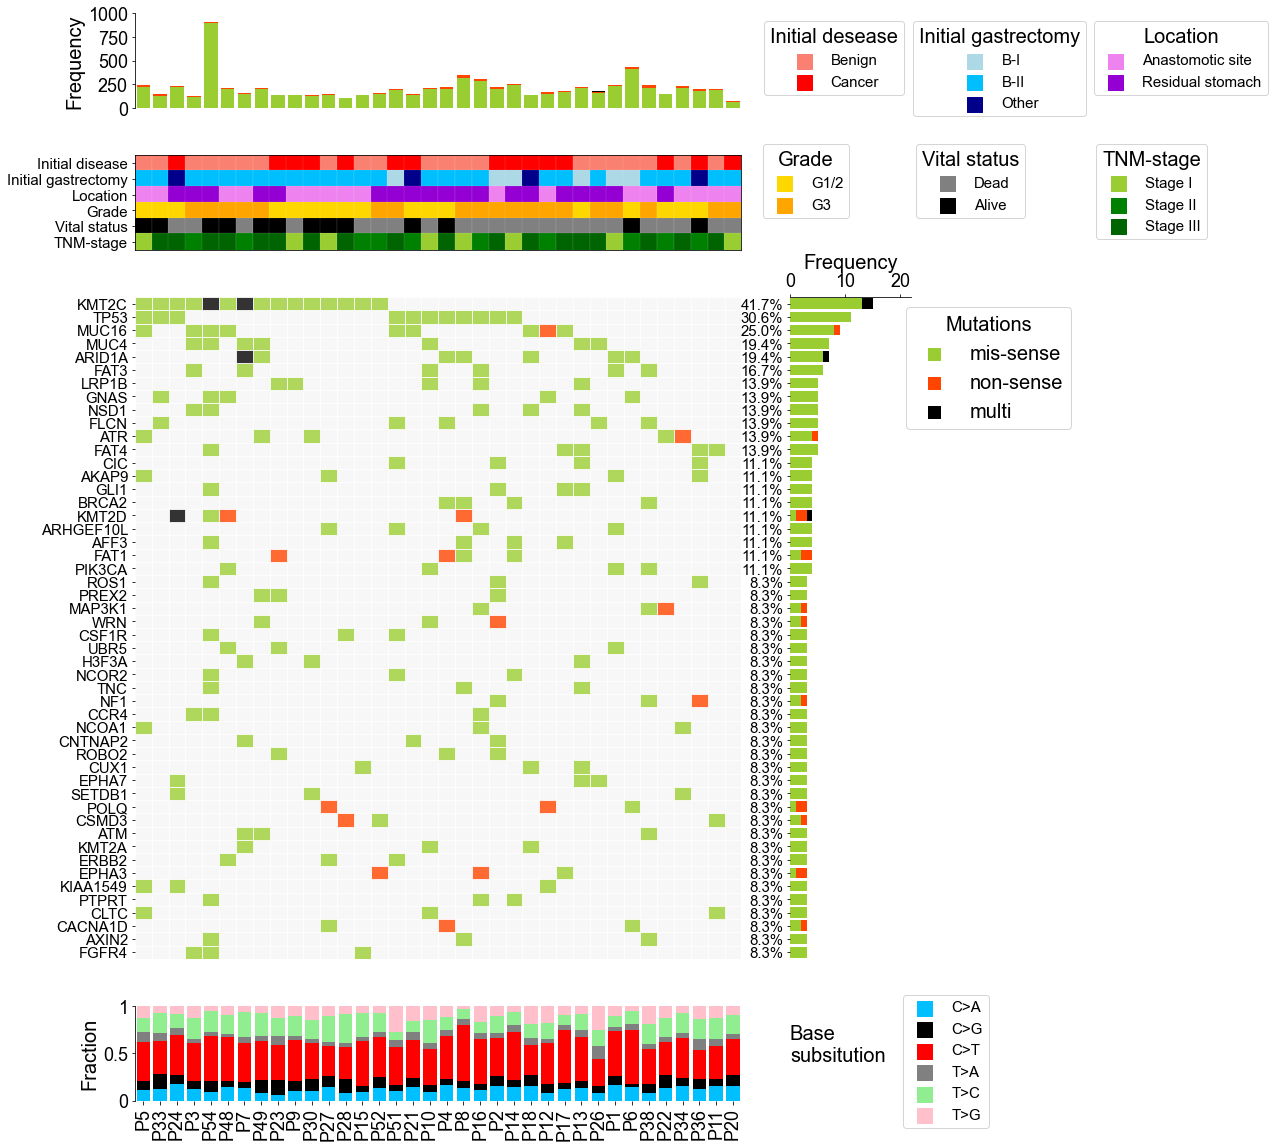

In [22]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib import rcParams

rcParams['font.family']='Arial'

plt.figure(figsize=(20,20))
gs=gridspec.GridSpec(4,4,height_ratios=[1,1,7,1],width_ratios=[5,1,1,1])
    
ax=plt.subplot(gs[0,0])

mis_sense=[len(df.index[df[i]==1]) for i in order.columns]
non_sense=[len(df.index[df[i]==2]) for i in order.columns]
multi=[len(df.index[df[i]==3]) for i in order.columns]

plt.bar([i+0.5 for i in range(36)],mis_sense,color='yellowgreen')
plt.bar([i+0.5 for i in range(36)],non_sense,bottom=mis_sense,color='orangered')
plt.bar([i+0.5 for i in range(36)],multi,bottom=[i+j for i,j in zip(mis_sense,non_sense)],color='black')


plt.xlim(0,36)
plt.ylim(0,1000)
plt.xticks([],[])
plt.yticks([0,250,500,750,1000],[0,250,500,750,1000],size=18)
plt.ylabel('Frequency',size=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax=plt.subplot(gs[1,0])

colors=[]
for i in order.columns:
    if patient_info_df.loc[int(i),'initialDisease (benign:1,cancer:2)']==1:
        colors.append('salmon')
    else:
        colors.append('red')
plt.scatter([i+0.5 for i in range(36)],[0]*36,marker='s',s=300,edgecolors='white',linewidths=0.1,
            c=colors)

colors=[]
for i in order.columns:
    if patient_info_df.loc[int(i),'InitialGastrectomy (B-I:1,B-II:2,R-Y:3,Proximal:4)']==1:
        colors.append('lightblue')
    elif patient_info_df.loc[int(i),'InitialGastrectomy (B-I:1,B-II:2,R-Y:3,Proximal:4)']==2:
        colors.append('deepskyblue')
    elif patient_info_df.loc[int(i),'InitialGastrectomy (B-I:1,B-II:2,R-Y:3,Proximal:4)']==3:
        colors.append('blue')
    elif patient_info_df.loc[int(i),'InitialGastrectomy (B-I:1,B-II:2,R-Y:3,Proximal:4)']==4:
        colors.append('darkblue')        
plt.scatter([i+0.5 for i in range(36)],[1]*36,marker='s',s=300,edgecolors='white',linewidths=0.1,
            c=colors)

colors=[]
for i in order.columns:
    if patient_info_df.loc[int(i),'location(A:1,G:2)']==1:
        colors.append('violet')
    else:
        colors.append('darkviolet')
plt.scatter([i+0.5 for i in range(36)],[2]*36,marker='s',s=300,edgecolors='white',linewidths=0.1,
            c=colors)

colors=[]
for i in order.columns:
    if patient_info_df.loc[int(i),'Grade']==2:
        colors.append('gold')
    else:
        colors.append('orange')

plt.scatter([i+0.5 for i in range(36)],[3]*36,marker='s',s=300,edgecolors='white',linewidths=0.1,
            c=colors)


colors=[]
for i in order.columns:
    if patient_info_df.loc[int(i),'status (death:1,alive:0)']==0:
        colors.append('grey')
    else:
        colors.append('black')
        
plt.scatter([i+0.5 for i in range(36)],[4]*36,marker='s',s=300,edgecolors='white',linewidths=0.1,
            c=colors)


colors=[]
for i in order.columns:
    if patient_info_df.loc[int(i),'TNMstage']==1:
        colors.append('yellowgreen')
    elif patient_info_df.loc[int(i),'TNMstage']==2:
        colors.append('green')
    elif patient_info_df.loc[int(i),'TNMstage']==3:
        colors.append('darkgreen')

plt.scatter([i+0.5 for i in range(36)],[5]*36,marker='s',s=300,edgecolors='white',linewidths=0.1,
            c=colors)

plt.yticks([0,1,2,3,4,5],['Initial disease','Initial gastrectomy','Location',
                          'Grade','Vital status','TNM-stage'],size=15)
plt.xlim(0,36)
plt.ylim(5.5,-0.5)
plt.xticks([],[])

ax=plt.subplot(gs[0,1])

patches=[plt.scatter([],[],marker='s',color=i,label=j,s=100) for i,j in zip(['salmon','red'],
                                                                            ['Benign','Cancer'])]
l=plt.legend(handles=patches,markerscale=1.5,fontsize=15,bbox_to_anchor=(1,1))
l.set_title(title='Initial desease',prop={'size':20})
plt.axis('off')

ax=plt.subplot(gs[0,2])

patches=[plt.scatter([],[],marker='s',color=i,label=j,s=100) for i,j in zip(['lightblue','deepskyblue','darkblue'],
                                                                            ['B-I','B-II','Other'])]
l=plt.legend(handles=patches,markerscale=1.5,fontsize=15,bbox_to_anchor=(1.1,1))
l.set_title(title='Initial gastrectomy',prop={'size':20})
plt.axis('off')

ax=plt.subplot(gs[0,3])

patches=[plt.scatter([],[],marker='s',color=i,label=j,s=100) for i,j in zip(['violet','darkviolet'],
                                                                            ['Anastomotic site','Residual stomach'])]
l=plt.legend(handles=patches,markerscale=1.5,fontsize=15,bbox_to_anchor=(1.2,1))
l.set_title(title='Location',prop={'size':20})
plt.axis('off')


ax=plt.subplot(gs[1,1])

patches=[plt.scatter([],[],marker='s',color=i,label=j,s=100) for i,j in zip(['gold','orange'],
                                                                            ['G1/2','G3'])]
l=plt.legend(handles=patches,markerscale=1.5,fontsize=15,bbox_to_anchor=(0.55,1.2))
l.set_title(title='Grade',prop={'size':20})
plt.axis('off')


ax=plt.subplot(gs[1,2])

patches=[plt.scatter([],[],marker='s',color=i,label=j,s=100) for i,j in zip(['grey','black'],
                                                                            ['Dead','Alive'])]
l=plt.legend(handles=patches,markerscale=1.5,fontsize=15,bbox_to_anchor=(0.6,1.2))
l.set_title(title='Vital status',prop={'size':20})
plt.axis('off')

ax=plt.subplot(gs[1,3])

patches=[plt.scatter([],[],marker='s',color=i,label=j,s=100) for i,j in zip(['yellowgreen','green','darkgreen'],
                                                                            ['Stage I','Stage II','Stage III'])]
l=plt.legend(handles=patches,markerscale=1.5,fontsize=15,bbox_to_anchor=(0.7,1.2))
l.set_title(title='TNM-stage',prop={'size':20})
plt.axis('off')



ax=plt.subplot(gs[2,0])

rectangles0=[]
rectangles1=[]
rectangles2=[]
rectangles3=[]

for row_num,row in enumerate(df.loc[order.index,order.columns].values):
    for col_num,col in enumerate(row):
        rect=mpl.patches.Rectangle((col_num,row_num),1,1)
        if col==1:
            rectangles1.append(rect)
        elif col==2:
            rectangles2.append(rect)
        elif col==3:
            rectangles3.append(rect)            
        else:          
            rectangles0.append(rect)

patch_collections0=mpl.collections.PatchCollection(rectangles0,facecolor='whitesmoke',alpha=0.8,edgecolor='white')
patch_collections1=mpl.collections.PatchCollection(rectangles1,facecolor='yellowgreen',alpha=0.8,edgecolor='white')
patch_collections2=mpl.collections.PatchCollection(rectangles2,facecolor='orangered',alpha=0.8,edgecolor='white')
patch_collections3=mpl.collections.PatchCollection(rectangles3,facecolor='black',alpha=0.8,edgecolor='white')


ax.add_collection(patch_collections0)
ax.add_collection(patch_collections1)
ax.add_collection(patch_collections2)
ax.add_collection(patch_collections3)


plt.yticks([i+0.5 for i in range(50)],order.index,size=15)
plt.xticks([],[])

plt.xlim(0,36)
plt.ylim(50,0)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax=plt.subplot(gs[2,1])
mis_sense=[len(df.columns[df.loc[i,:]==1]) for i in order.index]
non_sense=[len(df.columns[df.loc[i,:]==2]) for i in order.index]
multi=[len(df.columns[df.loc[i,:]==3]) for i in order.index]

plt.barh([i+0.5 for i in range(50)],mis_sense,color='yellowgreen')
plt.barh([i+0.5 for i in range(50)],non_sense,left=mis_sense,color='orangered')
plt.barh([i+0.5 for i in range(50)],multi,left=[i+j for i,j in zip(mis_sense,non_sense)],color='black')
plt.ylim(50,0)
plt.yticks([i+0.5 for i in range(50)],['%.1f%%'%(sum(i)/36*100) for i in order.values],size=15)
ax.xaxis.tick_top()
plt.xlabel('Frequency',size=20)
ax.xaxis.set_label_position('top')
plt.xticks([0,10,20],[0,10,20],size=18)
plt.xlim(0,22)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.subplot(gs[2,2])

patches=[plt.scatter([],[],marker='s',color='yellowgreen',label='mis-sense'),
         plt.scatter([],[],marker='s',color='orangered',label='non-sense'),
         plt.scatter([],[],marker='s',color='black',label='multi')]
l=plt.legend(handles=patches,markerscale=2,fontsize=20)
l.set_title(title='Mutations',prop={'size':20})
plt.axis('off')

ax=plt.subplot(gs[3,0])
base_subsitutions_type=['C>A','C>G','C>T','T>A','T>C','T>G']
colors=['deepskyblue','black','red','grey','lightgreen','pink']
for i,j in enumerate(base_subsitutions_type):
    plt.bar([i+0.5 for i in range(36)],
            base_subsitution_fraction_df.loc[j,:],
            bottom=base_subsitution_fraction_df.loc[base_subsitutions_type[:i],:].sum(axis=0),
            color=colors[i])

plt.xlim(0,36)
plt.ylim(0,1)
plt.xticks([i+0.5 for i in range(36)],['P%s'%(i) for i in order.columns],size=18,rotation=90)
plt.yticks([0,0.5,1],[0,0.5,1],size=18)
plt.ylabel('Fraction',size=20)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.subplot(gs[3,1])
plt.text(0,1.25,'Base\nsubsitution',size=20)
plt.xlim(0,3)
plt.ylim(0,3)
plt.axis('off')

plt.subplot(gs[3,2])

patches=[plt.scatter([],[],marker='s',color=i,label=j,s=100) for i,j in zip(colors,base_subsitutions_type)]
plt.legend(handles=patches,markerscale=1.5,fontsize=15,bbox_to_anchor=(0.3,1.2))
plt.axis('off')

plt.savefig('../Figure1_A_cosmic.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure1_A_cosmic.pdf',
            bbox_inches='tight',quality=95)

plt.show()


In [21]:
df.to_csv('../mutation_landscape.txt',sep='\t')
df.to_csv('..1/df.csv',sep='\t')
order.to_csv('../order.csv',sep='\t')
base_subsitution_fraction_df.to_csv('../base_subsitution_fraction_df.csv',sep='\t')
order_df.to_csv('../mutation_profile.txt',sep='\t')

In [1]:
import pandas as pd

order_df=pd.read_csv('../mutation_profile.txt',sep='\t',index_col=0)
order_df

30  8  12  51  54  36  23  9  6  10  ...  26  20  18  49  13  27  \
NEU3          0  0   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   
ETV1          0  0   0   1   0   0   0  0  0   0  ...   0   0   0   1   0   0   
PRAMEF19      0  0   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   
SCN10A        0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
CAMSAP3       0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
...          .. ..  ..  ..  ..  ..  .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..   
KLHDC7B       0  0   0   1   0   0   0  0  0   0  ...   0   0   0   0   0   0   
PALM2-AKAP2   0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
ADAM7         0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
RYR1          0  0   0   0   0   0   0  0  0   0  ...   1   0   1   0   0   0   
SOGA3         0  0   1   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   

             48  22  11  52  
NEU3          0   0   0   0  
ETV1          0   0   0   0  
PRAMEF19      0   0   1   0  
SCN10A        0   0   0   0  
CAMSAP3       0   0   0   0  
...          ..  ..  ..  ..  
KLHDC7B       0   0   0   0  
PALM2-AKAP2   0   0   0   0  
ADAM7         0   0   0   0  
RYR1          0   0   0   0  
SOGA3         0   0   0   0  

[5608 rows x 36 columns]

In [2]:
cosmic_df=pd.read_csv('../Census_allSun Jun 23 09_01_25 2019.json',sep='\t')
cosmic_df

Gene Symbol                                               Name  \
0          A1CF                     APOBEC1 complementation factor   
1          ABI1                                   abl-interactor 1   
2          ABL1  v-abl Abelson murine leukemia viral oncogene h...   
3          ABL2     c-abl oncogene 2, non-receptor tyrosine kinase   
4         ACKR3                      atypical chemokine receptor 3   
..          ...                                                ...   
718      ZNF429                            zinc finger protein 429   
719      ZNF479                            zinc finger protein 479   
720      ZNF521                            zinc finger protein 521   
721       ZNRF3                             zinc and ring finger 3   
722       ZRSR2  zinc finger (CCCH type), RNA-binding motif and...   

     Entrez GeneId        Genome Location  Tier Hallmark  Chr Band Somatic  \
0            29974   10:50806729-50859940     2      NaN  10q11.23     yes   
1            10006   10:26748570-26860863     1      Yes   10p11.2     yes   
2               25  9:130835447-130885683     1      Yes    9q34.1     yes   
3               27  1:179107718-179143044     1      NaN  1q24-q25     yes   
4            57007  2:236580466-236581554     1      Yes    2q37.3     yes   
..             ...                    ...   ...      ...       ...     ...   
718         353088   19:21505772-21538078     2      NaN     19p12     yes   
719          90827    7:57119840-57132324     2      NaN    7p11.2     yes   
720          25925   18:25062712-25350946     1      NaN   18q11.2     yes   
721          84133   22:28987076-29053622     2      NaN   22q12.1     yes   
722           8233    X:15790496-15823242     1      Yes    Xp22.1     yes   

    Germline                              Tumour Types(Somatic)  \
0        NaN                                           melanoma   
1        NaN                                                AML   
2        NaN                                    CML, ALL, T-ALL   
3        NaN                                                AML   
4        NaN                                             lipoma   
..       ...                                                ...   
718      NaN                                                GBM   
719      NaN  lung cancer, bladder carcinoma, prostate carci...   
720      NaN                                                ALL   
721      NaN  colorectal cancer, adrenocortical carcinoma, g...   
722      NaN                                           MDS, CLL   

    Tumour Types(Germline) Cancer Syndrome Tissue Type Molecular Genetics  \
0                      NaN             NaN           E                NaN   
1                      NaN             NaN           L                Dom   
2                      NaN             NaN           L                Dom   
3                      NaN             NaN           L                Dom   
4                      NaN             NaN           M                Dom   
..                     ...             ...         ...                ...   
718                    NaN             NaN           O                NaN   
719                    NaN             NaN           E                NaN   
720                    NaN             NaN           L                Dom   
721                    NaN             NaN           E                NaN   
722                    NaN             NaN           L                Rec   

       Role in Cancer Mutation Types Translocation Partner Other Germline Mut  \
0            oncogene            Mis                   NaN                NaN   
1         TSG, fusion              T                 KMT2A                NaN   
2    oncogene, fusion         T, Mis     BCR, ETV6, NUP214                NaN   
3    oncogene, fusion              T                  ETV6                NaN   
4    oncogene, fusion              T                 HMGA2                NaN   
..        

In [3]:
set(cosmic_df['Role in Cancer'])

{'TSG',
 'TSG, fusion',
 'fusion',
 nan,
 'oncogene',
 'oncogene, TSG',
 'oncogene, TSG, fusion',
 'oncogene, fusion'}

In [5]:
set(cosmic_df[cosmic_df['Role in Cancer']=='oncogene']['Gene Symbol'])

{'A1CF',
 'ACVR1',
 'AKT1',
 'AKT2',
 'AKT3',
 'AR',
 'ARAF',
 'ARHGAP5',
 'BCL2L12',
 'CACNA1D',
 'CALR',
 'CARD11',
 'CCNE1',
 'CCR4',
 'CCR7',
 'CD28',
 'CD79A',
 'CD79B',
 'CDH17',
 'CDK4',
 'CHD4',
 'CSF1R',
 'CSF3R',
 'CTNNA2',
 'CTNND2',
 'CXCR4',
 'CYSLTR2',
 'DDR2',
 'DGCR8',
 'EGFR',
 'ERBB3',
 'FGFR4',
 'FLT3',
 'FLT4',
 'FOXA1',
 'FUBP1',
 'GATA2',
 'GNA11',
 'GNAQ',
 'GNAS',
 'GRM3',
 'H3F3A',
 'H3F3B',
 'HIF1A',
 'HIST1H3B',
 'HRAS',
 'IDH1',
 'IDH2',
 'IKBKB',
 'IL6ST',
 'IL7R',
 'JAK3',
 'JUN',
 'KAT7',
 'KCNJ5',
 'KDR',
 'KIT',
 'KNSTRN',
 'KRAS',
 'MACC1',
 'MAP2K1',
 'MAP2K2',
 'MAPK1',
 'MDM2',
 'MDM4',
 'MET',
 'MITF',
 'MPL',
 'MTOR',
 'MUC16',
 'MUC4',
 'MYCL',
 'MYCN',
 'MYD88',
 'MYOD1',
 'NRAS',
 'NT5C2',
 'PIK3CA',
 'PIK3CB',
 'PPM1D',
 'PREX2',
 'PRKACA',
 'PTPN11',
 'RAC1',
 'REL',
 'SALL4',
 'SETDB1',
 'SF3B1',
 'SGK1',
 'SIX1',
 'SIX2',
 'SKI',
 'SMO',
 'SOX2',
 'SRC',
 'SRSF2',
 'STAT3',
 'TNC',
 'TRRAP',
 'TSHR',
 'U2AF1',
 'UBR5',
 'USP8',
 'WAS',
 'XP

In [13]:
for i in (order_df!=0).sum(axis=1).sort_values(ascending=False).index:
    if i in set(cosmic_df[cosmic_df['Role in Cancer']=='oncogene']['Gene Symbol']):
        print(i)

MUC16
MUC4
GNAS
PIK3CA
TNC
CSF1R
UBR5
PREX2
CACNA1D
H3F3A
FGFR4
SETDB1
CCR4
JAK3
SMO
MYOD1
SF3B1
PIK3CB
TRRAP
CHD4
MACC1
SALL4
CSF3R
PPM1D
AR
CDH17
AKT1
KNSTRN
WAS
A1CF
MYCN
SIX1
MTOR
CTNND2
GRM3
CDK4
EGFR
CCNE1
KAT7
KIT
TSHR
FLT4
XPO1
PTPN11
FLT3
ERBB3
AKT3
IKBKB
MYD88


In [12]:
(order_df!=0).sum(axis=1).sort_values(ascending=False).index

Index(['TTN', 'KMT2C', 'MUC5B', 'TP53', 'MUC16', 'ANKRD36C', 'PCLO', 'FSIP2',
       'SHANK1', 'SACS',
       ...
       'MTF2', 'TRMT44', 'HGFAC', 'TBK1', 'ZNF645', 'XAB2', 'NACA2', 'OLFM3',
       'MAP4K3', 'SOGA3'],
      dtype='object', length=5608)

In [2]:
sum(order_df.loc['KMT2C',:]!=0)

15

In [8]:
order_df.loc['KMT2C',:].sum()

15

In [3]:
15/36

0.4166666666666667

In [4]:
patient_info_df=pd.read_csv('../cohort1_info.txt',sep='\t',index_col=0)
patient_info_df

OStime  status (death:1,alive:0)  Sex (male:1,female:)  age  ageT  \
Patient_ID                                                                      
1            26.23                         0                     1   71     1   
2            20.57                         0                     1   52     0   
3            38.67                         0                     1   66     1   
4            19.10                         1                     1   61     0   
5            31.93                         1                     1   66     1   
6            27.20                         1                     1   59     0   
7            47.67                         0                     1   58     0   
8            44.30                         0                     1   61     0   
9            34.77                         0                     0   69     1   
10           18.33                         0                     1   46     0   
11           28.20                         0                     1   63     0   
12           21.70                         0                     1   67     1   
13           10.00                         0                     0   73     1   
14           60.83                         0                     1   75     1   
15           38.90                         0                     1   72     1   
16           30.33                         0                     1   59     0   
17           28.50                         0                     1   68     1   
18           49.10                         0                     1   57     0   
20           20.57                         0                     1   73     1   
21           32.70                         1                     1   64     0   
22           43.23                         0                     1   63     0   
23           19.00                         1                     1   71     1   
24           35.33                         0                     1   62     0   
26           52.77                         0                     0   61     0   
27           41.23                         1                     1   83     1   
28           34.33                         1                     1   77     1   
30            6.93                         1                     0   65     1   
33           16.50                         1                     1   70     1   
34           16.77                         0                     0   59     0   
36            8.60                         1                     1   59     0   
38           34.40                         0                     1   55     0   
48           13.27                         1                     1   72     1   
49            9.83                         1                     1   55     0   
51           29.50                         0                     1   57     0   
52            7.27                         0                     1   73     1   
54            6.10                         1                     1   60     0   

            initialDisease (benign:1,cancer:2)  IntervalTimeBetweenSurgeries  \
Patient_ID                                                                     
1                                            1                            47   
2                                            2                             7   
3                                            1                            48   
4                                            1                            20   
5                                            1                            45   
6                                            1                            38   
7                                            1                            40   
8                                            1                            40   
9                                            2                            27   
10                                           1       

In [6]:
cosmic_df=pd.read_csv('../Census_allSun Jun 23 09_01_25 2019.json',sep='\t')
cosmic_df

Gene Symbol                                               Name  \
0          A1CF                     APOBEC1 complementation factor   
1          ABI1                                   abl-interactor 1   
2          ABL1  v-abl Abelson murine leukemia viral oncogene h...   
3          ABL2     c-abl oncogene 2, non-receptor tyrosine kinase   
4         ACKR3                      atypical chemokine receptor 3   
..          ...                                                ...   
718      ZNF429                            zinc finger protein 429   
719      ZNF479                            zinc finger protein 479   
720      ZNF521                            zinc finger protein 521   
721       ZNRF3                             zinc and ring finger 3   
722       ZRSR2  zinc finger (CCCH type), RNA-binding motif and...   

     Entrez GeneId        Genome Location  Tier Hallmark  Chr Band Somatic  \
0            29974   10:50806729-50859940     2      NaN  10q11.23     yes   
1            10006   10:26748570-26860863     1      Yes   10p11.2     yes   
2               25  9:130835447-130885683     1      Yes    9q34.1     yes   
3               27  1:179107718-179143044     1      NaN  1q24-q25     yes   
4            57007  2:236580466-236581554     1      Yes    2q37.3     yes   
..             ...                    ...   ...      ...       ...     ...   
718         353088   19:21505772-21538078     2      NaN     19p12     yes   
719          90827    7:57119840-57132324     2      NaN    7p11.2     yes   
720          25925   18:25062712-25350946     1      NaN   18q11.2     yes   
721          84133   22:28987076-29053622     2      NaN   22q12.1     yes   
722           8233    X:15790496-15823242     1      Yes    Xp22.1     yes   

    Germline                              Tumour Types(Somatic)  \
0        NaN                                           melanoma   
1        NaN                                                AML   
2        NaN                                    CML, ALL, T-ALL   
3        NaN                                                AML   
4        NaN                                             lipoma   
..       ...                                                ...   
718      NaN                                                GBM   
719      NaN  lung cancer, bladder carcinoma, prostate carci...   
720      NaN                                                ALL   
721      NaN  colorectal cancer, adrenocortical carcinoma, g...   
722      NaN                                           MDS, CLL   

    Tumour Types(Germline) Cancer Syndrome Tissue Type Molecular Genetics  \
0                      NaN             NaN           E                NaN   
1                      NaN             NaN           L                Dom   
2                      NaN             NaN           L                Dom   
3                      NaN             NaN           L                Dom   
4                      NaN             NaN           M                Dom   
..                     ...             ...         ...                ...   
718                    NaN             NaN           O                NaN   
719                    NaN             NaN           E                NaN   
720                    NaN             NaN           L                Dom   
721                    NaN             NaN           E                NaN   
722                    NaN             NaN           L                Rec   

       Role in Cancer Mutation Types Translocation Partner Other Germline Mut  \
0            oncogene            Mis                   NaN                NaN   
1         TSG, fusion              T                 KMT2A                NaN   
2    oncogene, fusion         T, Mis     BCR, ETV6, NUP214                NaN   
3    oncogene, fusion              T                  ETV6                NaN   
4    oncogene, fusion              T                 HMGA2                NaN   
..        

In [31]:
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib import rcParams
from matplotlib import rcParams

rcParams['pdf.fonttype'] = 42 
rcParams['font.family']='Arial'

position:
[['MUC4', inf, 0.027291415099764245, 0.3333333333333333, 0.0, 0.6390050888390556], ['FAT3', inf, 0.030428813754240742, 0.2857142857142857, 0.0, 0.6390050888390556], ['PIK3CA', inf, 0.12477718360071341, 0.19047619047619047, 0.0, 0.6562500000000012], ['CHD4', 0.0, 0.16666666666666718, 0.0, 0.13333333333333333, 0.6562500000000012], ['TRRAP', 0.0, 0.16666666666666718, 0.0, 0.13333333333333333, 0.6562500000000012], ['SMO', 0.0, 0.16666666666666718, 0.0, 0.13333333333333333, 0.6562500000000012], ['CHD2', 0.0, 0.16666666666666718, 0.0, 0.13333333333333333, 0.6562500000000012], ['ARID1A', 5.6, 0.20034428727502773, 0.2857142857142857, 0.06666666666666667, 0.6562500000000012], ['TNC', inf, 0.25000000000000044, 0.14285714285714285, 0.0, 0.6562500000000012], ['CCR4', inf, 0.25000000000000044, 0.14285714285714285, 0.0, 0.6562500000000012], ['NCOA1', inf, 0.25000000000000044, 0.14285714285714285, 0.0, 0.6562500000000012], ['ATM', inf, 0.25000000000000044, 0.14285714285714285, 0.0, 0.656250

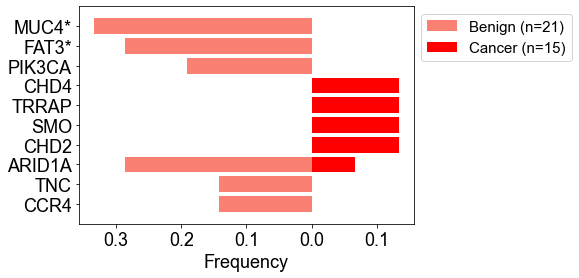

In [33]:
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib import rcParams
from matplotlib import rcParams

rcParams['pdf.fonttype'] = 42 
rcParams['font.family']='Arial'

#----------------------------------------------
G1=[i for i in map(str,patient_info_df[patient_info_df['initialDisease (benign:1,cancer:2)']==1].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['initialDisease (benign:1,cancer:2)']==2].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        if num_in_G1/num_of_G1>=0.1 or num_in_G2/num_of_G2>=0.1:
            OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                              [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
            result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
        
result2=[]
for i,j in zip(result.items(),
               statsmodels.stats.multitest.multipletests([i[1][1] for i in result.items()],method='fdr_bh')[1]):
    result2.append([i[0]]+i[1]+[j])    
    
print('position:')    
print(sorted(result2,key=lambda x:x[2])[:50])

    
index=0
xs=sorted([i for i in result2],key=lambda x:x[2])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/JPCR/initialDisease.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','benign','cancer','fdr'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,i)])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[3]],color='salmon',label='Benign (n=%d)'%(num_of_G1))
        plt.barh([index],[i[4]],color='red',label='Cancer (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[3]],color='salmon')
        plt.barh([index],[i[4]],color='red')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[2]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)



plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=15)

plt.savefig('../Figure1_D_initial_disease.png',
            bbox_inches='tight')
plt.savefig('../Figure1_D_initial_disease.pdf',
            bbox_inches='tight')

plt.show()

position:
[['NSD1', 0.0, 0.0472582972582972, 0.0, 0.2631578947368421, 0.6750915750915742], ['MUC4', 0.13541666666666666, 0.0917888563049852, 0.058823529411764705, 0.3157894736842105, 0.6750915750915742], ['NF1', inf, 0.09523809523809504, 0.17647058823529413, 0.0, 0.6750915750915742], ['POLQ', inf, 0.09523809523809504, 0.17647058823529413, 0.0, 0.6750915750915742], ['AFF3', 0.0, 0.10620490620490615, 0.0, 0.21052631578947367, 0.6750915750915742], ['FAT1', 0.0, 0.10620490620490615, 0.0, 0.21052631578947367, 0.6750915750915742], ['TP53', 0.29464285714285715, 0.15595811925066644, 0.17647058823529413, 0.42105263157894735, 0.6750915750915742], ['GNAS', 5.538461538461538, 0.16720779220779222, 0.23529411764705882, 0.05263157894736842, 0.6750915750915742], ['BCL11B', inf, 0.2158730158730163, 0.11764705882352941, 0.0, 0.6750915750915742], ['PIK3CB', inf, 0.2158730158730163, 0.11764705882352941, 0.0, 0.6750915750915742], ['EXT1', inf, 0.2158730158730163, 0.11764705882352941, 0.0, 0.675091575091574

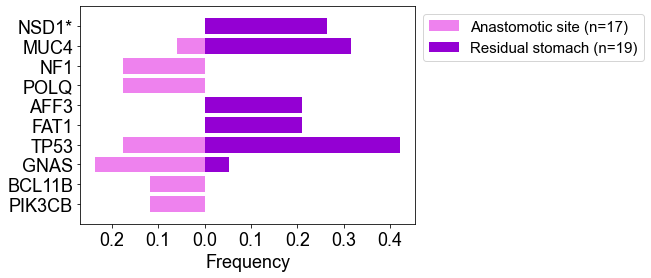

In [32]:
#----------------------------------------------
G1=[i for i in map(str,patient_info_df[patient_info_df['location(A:1,G:2)']==1].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['location(A:1,G:2)']==2].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        if num_in_G1/num_of_G1>=0.1 or num_in_G2/num_of_G2>=0.1:
            OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                              [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
            result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
        
result2=[]
for i,j in zip(result.items(),
               statsmodels.stats.multitest.multipletests([i[1][1] for i in result.items()],method='fdr_bh')[1]):
    result2.append([i[0]]+i[1]+[j])    
    
print('position:')    
print(sorted(result2,key=lambda x:x[2])[:50])

    
index=0
xs=sorted([i for i in result2],key=lambda x:x[2])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/JPCR/location.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','Anastomotic site','Residual stomach','fdr'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,i)])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[3]],color='violet',label='Anastomotic site (n=%d)'%(num_of_G1))
        plt.barh([index],[i[4]],color='darkviolet',label='Residual stomach (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[3]],color='violet')
        plt.barh([index],[i[4]],color='darkviolet')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[2]<=0.05 else i[0] for i in xs],size=18)   
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)



plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=15)


plt.savefig('../Figure1_D_location.png',
            bbox_inches='tight')
plt.savefig('../Figure1_D_location.pdf',
            bbox_inches='tight')
plt.show()

position:
[['SETDB1', inf, 0.09523809523809504, 0.17647058823529413, 0.0, 0.755036630036629], ['CACNA1D', inf, 0.09523809523809504, 0.17647058823529413, 0.0, 0.755036630036629], ['AFF3', 0.0, 0.10620490620490615, 0.0, 0.21052631578947367, 0.755036630036629], ['MUC16', 0.22857142857142856, 0.12790979876630595, 0.11764705882352941, 0.3684210526315789, 0.755036630036629], ['LRP1B', 5.538461538461538, 0.16720779220779222, 0.23529411764705882, 0.05263157894736842, 0.755036630036629], ['ATR', 5.538461538461538, 0.16720779220779222, 0.23529411764705882, 0.05263157894736842, 0.755036630036629], ['FAT3', 0.175, 0.18213238374528662, 0.058823529411764705, 0.2631578947368421, 0.755036630036629], ['SMARCA4', inf, 0.2158730158730163, 0.11764705882352941, 0.0, 0.755036630036629], ['BCL11B', inf, 0.2158730158730163, 0.11764705882352941, 0.0, 0.755036630036629], ['PIK3CB', inf, 0.2158730158730163, 0.11764705882352941, 0.0, 0.755036630036629], ['SF3B1', inf, 0.2158730158730163, 0.11764705882352941, 0.0,

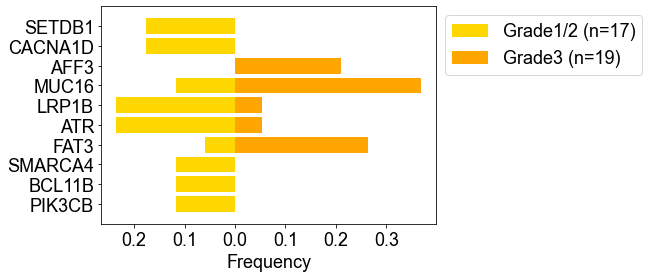

In [34]:
#----------------------------------------------
G1=[i for i in map(str,patient_info_df[patient_info_df['Grade']==2].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['Grade']==3].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        if num_in_G1/num_of_G1>=0.1 or num_in_G2/num_of_G2>=0.1:
            OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                              [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
            result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
        
result2=[]
for i,j in zip(result.items(),
               statsmodels.stats.multitest.multipletests([i[1][1] for i in result.items()],method='fdr_bh')[1]):
    result2.append([i[0]]+i[1]+[j])    
    
print('position:')    
print(sorted(result2,key=lambda x:x[2])[:50])

    
index=0
xs=sorted([i for i in result2],key=lambda x:x[2])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/JPCR/grade.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','Grade1/2','Grade3','fdr'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,i)])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[3]],color='gold',label='Grade1/2 (n=%d)'%(num_of_G1))
        plt.barh([index],[i[4]],color='orange',label='Grade3 (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[3]],color='gold')
        plt.barh([index],[i[4]],color='orange')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[2]<=0.05 else i[0] for i in xs],size=18)    
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)


plt.savefig('../Figure1_D_grade.png',
            bbox_inches='tight')
plt.savefig('../Figure1_D_grade.pdf',
            bbox_inches='tight')
plt.show()

position:
[['FLCN', 0.0, 0.04545454545454564, 0.0, 0.2777777777777778, 0.9592857142857165], ['AKAP9', inf, 0.10389610389610417, 0.2222222222222222, 0.0, 0.9592857142857165], ['GLI1', 0.0, 0.10389610389610417, 0.0, 0.2222222222222222, 0.9592857142857165], ['FAT3', 6.538461538461538, 0.17741935483870996, 0.2777777777777778, 0.05555555555555555, 0.9592857142857165], ['PREX2', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.9592857142857165], ['CSF1R', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.9592857142857165], ['ROBO2', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.9592857142857165], ['EPHA7', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.9592857142857165], ['SETDB1', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.9592857142857165], ['POLQ', inf, 0.22857142857142895, 0.16666666666666666, 0.0, 0.9592857142857165], ['FAT4', 0.20588235294117646, 0.33766233766233794, 0.05555555555555555, 0.2222222222222222, 0.9592857142857165], ['ETV1', 0.0, 0.4857142

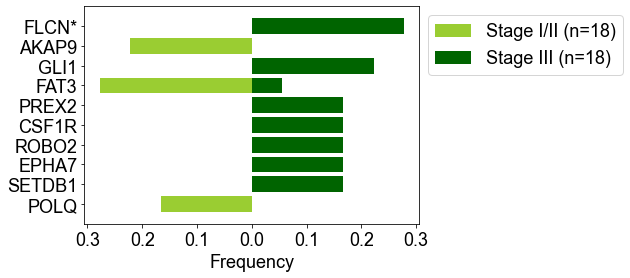

In [37]:
#----------------------------------------------
G1=[i for i in map(str,patient_info_df[(patient_info_df['TNMstage']==1)|
                                       (patient_info_df['TNMstage']==2)].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['TNMstage']==3].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        if num_in_G1/num_of_G1>=0.1 or num_in_G2/num_of_G2>=0.1:
            OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                              [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
            result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
        
result2=[]
for i,j in zip(result.items(),
               statsmodels.stats.multitest.multipletests([i[1][1] for i in result.items()],method='fdr_bh')[1]):
    result2.append([i[0]]+i[1]+[j])    
    
print('position:')    
print(sorted(result2,key=lambda x:x[2])[:50])

index=0
xs=sorted([i for i in result2],key=lambda x:x[2])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/JPCR/stages.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','Stage I/II','Stage III','fdr'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,i)])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[3]],color='yellowgreen',label='Stage I/II (n=%d)'%(num_of_G1))
        plt.barh([index],[i[4]],color='darkgreen',label='Stage III (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[3]],color='yellowgreen')
        plt.barh([index],[i[4]],color='darkgreen')        
    index+=1
    
plt.yticks([i for i in range(10)],[i[0]+'*' if i[2]<=0.05 else i[0] for i in xs],size=18)
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)


plt.savefig('../Figure1_D_stages.png',
            bbox_inches='tight')
plt.savefig('../Figure1_D_stages.pdf',
            bbox_inches='tight')

plt.show()

position:
[['TP53', 0.125, 0.027490862863499124, 0.1111111111111111, 0.5, 0.8680851063829808], ['BRCA2', 0.0, 0.10389610389610417, 0.0, 0.2222222222222222, 0.8680851063829808], ['KMT2D', 0.0, 0.10389610389610417, 0.0, 0.2222222222222222, 0.8680851063829808], ['PIK3CA', 0.0, 0.10389610389610417, 0.0, 0.2222222222222222, 0.8680851063829808], ['KMT2C', 3.25, 0.17558317615385882, 0.5555555555555556, 0.2777777777777778, 0.8680851063829808], ['WRN', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.8680851063829808], ['NCOR2', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.8680851063829808], ['TNC', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.8680851063829808], ['NCOA1', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.8680851063829808], ['PTPRT', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.8680851063829808], ['CLTC', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.8680851063829808], ['AXIN2', 0.0, 0.22857142857142895, 0.0, 0.16666666666666666, 0.868

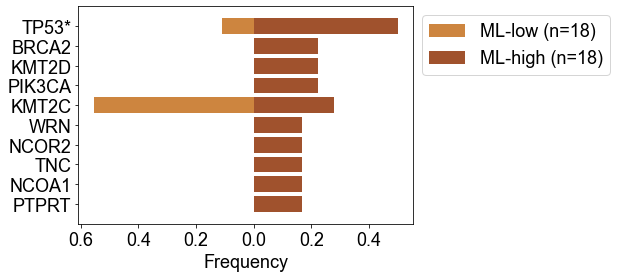

In [39]:
mutation_load={'1': 4.225783442294797,
 '2': 3.551095532526275,
 '3': 2.111258128403322,
 '4': 3.544351068895223,
 '5': 3.889851719805058,
 '6': 6.932482087843285,
 '7': 2.5994645895465225,
 '8': 5.585938618278727,
 '9': 2.2771596835456487,
 '10': 3.5796712916595435,
 '11': 3.2803354461699286,
 '12': 3.057561815083352,
 '13': 3.630996879458134,
 '14': 4.682297671279884,
 '15': 2.504245732756636,
 '16': 5.4960496227328335,
 '17': 3.143868203846096,
 '18': 2.7001371446209843,
 '20': 1.2709108735288162,
 '21': 2.750029877743962,
 '22': 2.556734813539697,
 '23': 2.4421343200895405,
 '24': 4.026354612712134,
 '26': 3.074492127393625,
 '27': 2.3962366072590418,
 '28': 2.18134687413181,
 '30': 2.289991294558611,
 '33': 2.2989493119886832,
 '34': 3.809020353770066,
 '36': 3.2198507869884003,
 '38': 4.035571689651128,
 '48': 3.473517466661885,
 '49': 3.5408352915812262,
 '51': 3.3995620835949016,
 '52': 2.6633865723986125,
 '54': 18.468955705749227}


G1=[]
G2=[]

for i in mutation_load:
    if mutation_load[i]>3.2500931165791647:
        G2.append(i)
    else:
        G1.append(i)
        
num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        if num_in_G1/num_of_G1>=0.1 or num_in_G2/num_of_G2>=0.1:
            OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                              [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
            result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
        
result2=[]
for i,j in zip(result.items(),
               statsmodels.stats.multitest.multipletests([i[1][1] for i in result.items()],method='fdr_bh')[1]):
    result2.append([i[0]]+i[1]+[j])    
    
print('position:')    
print(sorted(result2,key=lambda x:x[2])[:50])

index=0
xs=sorted([i for i in result2],key=lambda x:x[2])[:10]
    

for i in xs:
    if index==1:
        plt.barh([index],[-i[3]],color='peru',label='ML-low (n=%d)'%(num_of_G1))
        plt.barh([index],[i[4]],color='sienna',label='ML-high (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[3]],color='peru')
        plt.barh([index],[i[4]],color='sienna')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[2]<=0.05 else i[0] for i in xs],size=18)
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)

plt.savefig('../Figure1_E_ML.png',
            bbox_inches='tight')
plt.savefig('../Figure1_E_ML.pdf',
            bbox_inches='tight')

with open('../ML.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','ML-low','ML-high','fdr'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,i)])+'\n')


plt.show()

position:
[['CIC', inf, 0.0040322580645161315, 0.5, 0.0, 0.34466911764705804], ['KMT2C', 0.0, 0.023799592139414117, 0.0, 0.5384615384615384, 0.34466911764705804], ['FGFR3', inf, 0.030241935483870955, 0.3333333333333333, 0.0, 0.34466911764705804], ['JAK3', inf, 0.030241935483870955, 0.3333333333333333, 0.0, 0.34466911764705804], ['NCOR2', 12.5, 0.08266129032258078, 0.3333333333333333, 0.038461538461538464, 0.34466911764705804], ['GLI1', 6.0, 0.1504449388209118, 0.3333333333333333, 0.07692307692307693, 0.34466911764705804], ['ARHGEF10L', 6.0, 0.1504449388209118, 0.3333333333333333, 0.07692307692307693, 0.34466911764705804], ['TSHR', inf, 0.18749999999999958, 0.16666666666666666, 0.0, 0.34466911764705804], ['KAT7', inf, 0.18749999999999958, 0.16666666666666666, 0.0, 0.34466911764705804], ['SMARCA4', inf, 0.18749999999999958, 0.16666666666666666, 0.0, 0.34466911764705804], ['COL2A1', inf, 0.18749999999999958, 0.16666666666666666, 0.0, 0.34466911764705804], ['PRRX1', inf, 0.1874999999999995

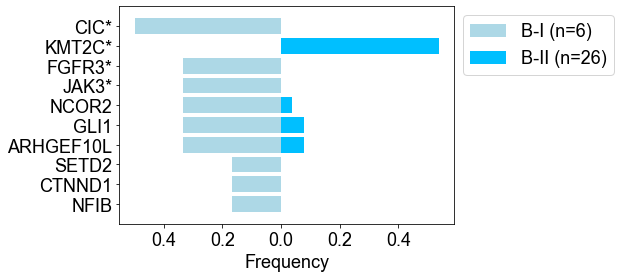

In [43]:
G1=[i for i in map(str,patient_info_df[(patient_info_df['InitialGastrectomy (B-I:1,B-II:2,R-Y:3,Proximal:4)']==1)].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[(patient_info_df['InitialGastrectomy (B-I:1,B-II:2,R-Y:3,Proximal:4)']==2)].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        if num_in_G1/num_of_G1>=0.1 or num_in_G2/num_of_G2>=0.1:
            OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                              [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
            result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
        
result2=[]
for i,j in zip(result.items(),
               statsmodels.stats.multitest.multipletests([i[1][1] for i in result.items()],method='fdr_bh')[1]):
    result2.append([i[0]]+i[1]+[j])    
    
print('position:')    
print(sorted(result2,key=lambda x:x[2])[:50])

index=0
xs=sorted([i for i in result2],key=lambda x:x[2])[:7]
for i in result2:
    if i[0] in ['NFIB','SETD2','CTNND1']:
        xs.append(i)

with open('/home/chenhaojie/桌面/Xu_lab/JPCR/B.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','B-I','B-II','fdr'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,i)])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[3]],color='lightblue',label='B-I (n=%d)'%(num_of_G1))
        plt.barh([index],[i[4]],color='deepskyblue',label='B-II (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[3]],color='lightblue')
        plt.barh([index],[i[4]],color='deepskyblue')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[2]<=0.05 else i[0] for i in xs],size=18)
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)

plt.savefig('../Figure1_H_B.png',
            bbox_inches='tight')
plt.savefig('../Figure1_H_B.pdf',
            bbox_inches='tight')
plt.show()

In [42]:
sorted([i for i in result2],key=lambda x:x[2])

[['CIC', inf, 0.0040322580645161315, 0.5, 0.0, 0.34466911764705804],
 ['KMT2C',
  0.0,
  0.023799592139414117,
  0.0,
  0.5384615384615384,
  0.34466911764705804],
 ['FGFR3',
  inf,
  0.030241935483870955,
  0.3333333333333333,
  0.0,
  0.34466911764705804],
 ['JAK3',
  inf,
  0.030241935483870955,
  0.3333333333333333,
  0.0,
  0.34466911764705804],
 ['NCOR2',
  12.5,
  0.08266129032258078,
  0.3333333333333333,
  0.038461538461538464,
  0.34466911764705804],
 ['GLI1',
  6.0,
  0.1504449388209118,
  0.3333333333333333,
  0.07692307692307693,
  0.34466911764705804],
 ['ARHGEF10L',
  6.0,
  0.1504449388209118,
  0.3333333333333333,
  0.07692307692307693,
  0.34466911764705804],
 ['TSHR',
  inf,
  0.18749999999999958,
  0.16666666666666666,
  0.0,
  0.34466911764705804],
 ['KAT7',
  inf,
  0.18749999999999958,
  0.16666666666666666,
  0.0,
  0.34466911764705804],
 ['SMARCA4',
  inf,
  0.18749999999999958,
  0.16666666666666666,
  0.0,
  0.34466911764705804],
 ['COL2A1',
  inf,
  0.187499

In [11]:
import scipy.stats
import statsmodels.stats.multitest

#----------------------------------------------
G1=[i for i in map(str,patient_info_df[patient_info_df['initialDisease (benign:1,cancer:2)']==1].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['initialDisease (benign:1,cancer:2)']==2].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
        
    
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])

position:
[('MUC4', [inf, 0.027291415099764245, 0.3333333333333333, 0.0]), ('FAT3', [inf, 0.030428813754240742, 0.2857142857142857, 0.0]), ('PIK3CA', [inf, 0.12477718360071341, 0.19047619047619047, 0.0]), ('CHD4', [0.0, 0.16666666666666718, 0.0, 0.13333333333333333]), ('TRRAP', [0.0, 0.16666666666666718, 0.0, 0.13333333333333333]), ('SMO', [0.0, 0.16666666666666718, 0.0, 0.13333333333333333]), ('CHD2', [0.0, 0.16666666666666718, 0.0, 0.13333333333333333]), ('ARID1A', [5.6, 0.20034428727502773, 0.2857142857142857, 0.06666666666666667]), ('TNC', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('CCR4', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('NCOA1', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('ATM', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('CLTC', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('CACNA1D', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('AXIN2', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('FGFR4

position:
[('MUC4', [inf, 0.027291415099764245, 0.3333333333333333, 0.0]), ('FAT3', [inf, 0.030428813754240742, 0.2857142857142857, 0.0]), ('PIK3CA', [inf, 0.12477718360071341, 0.19047619047619047, 0.0]), ('CHD4', [0.0, 0.16666666666666718, 0.0, 0.13333333333333333]), ('TRRAP', [0.0, 0.16666666666666718, 0.0, 0.13333333333333333]), ('SMO', [0.0, 0.16666666666666718, 0.0, 0.13333333333333333]), ('CHD2', [0.0, 0.16666666666666718, 0.0, 0.13333333333333333]), ('ARID1A', [5.6, 0.20034428727502773, 0.2857142857142857, 0.06666666666666667]), ('TNC', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('CCR4', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('NCOA1', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('ATM', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('CLTC', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('CACNA1D', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('AXIN2', [inf, 0.25000000000000044, 0.14285714285714285, 0.0]), ('FGFR4

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


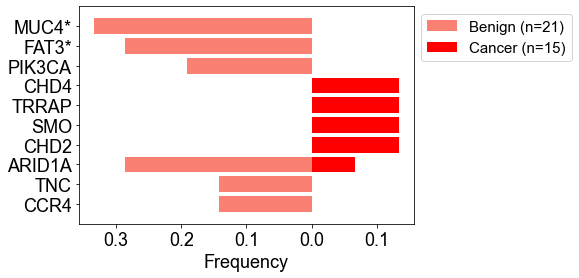

In [24]:
import scipy.stats
import statsmodels.stats.multitest

#----------------------------------------------
G1=[i for i in map(str,patient_info_df[patient_info_df['initialDisease (benign:1,cancer:2)']==1].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['initialDisease (benign:1,cancer:2)']==2].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
        
result2=[]
for i,j in zip(result,statsmodels.stats.multitest.multipletests([i[1] for i in result],method='fdr_bh')[1]):
    result2.append(i+[j])    
    
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])
    
index=0
xs=sorted([i for i in result.items()],key=lambda x:x[1][1])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/Figures_plan/Figure1/initialDisease.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','benign','cancer'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,[i[0]]+i[1])])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[1][2]],color='salmon',label='Benign (n=%d)'%(num_of_G1))
        plt.barh([index],[i[1][3]],color='red',label='Cancer (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[1][2]],color='salmon')
        plt.barh([index],[i[1][3]],color='red')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[1][1]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)



plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=15)

plt.savefig('../Figure1_D_initial_disease.png',
            bbox_inches='tight',quality=95)
plt.savefig('..1/Figure1_D_initial_disease.pdf',
            bbox_inches='tight',quality=95)

plt.show()

position:
[('NSD1', [0.0, 0.0472582972582972, 0.0, 0.2631578947368421]), ('MUC4', [0.13541666666666666, 0.0917888563049852, 0.058823529411764705, 0.3157894736842105]), ('NF1', [inf, 0.09523809523809504, 0.17647058823529413, 0.0]), ('POLQ', [inf, 0.09523809523809504, 0.17647058823529413, 0.0]), ('AFF3', [0.0, 0.10620490620490615, 0.0, 0.21052631578947367]), ('FAT1', [0.0, 0.10620490620490615, 0.0, 0.21052631578947367]), ('TP53', [0.29464285714285715, 0.15595811925066644, 0.17647058823529413, 0.42105263157894735]), ('GNAS', [5.538461538461538, 0.16720779220779222, 0.23529411764705882, 0.05263157894736842]), ('BCL11B', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('PIK3CB', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('EXT1', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('MACC1', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('COL1A1', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('FGFR3', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), (

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


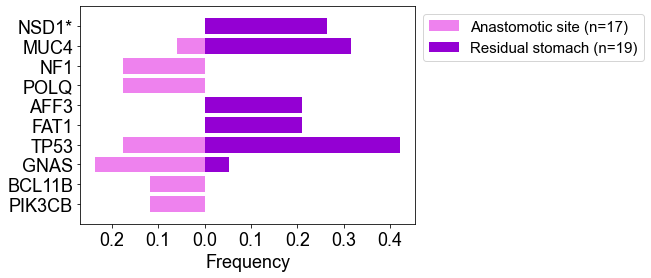

In [25]:
#----------------------------------------------
G1=[i for i in map(str,patient_info_df[patient_info_df['location(A:1,G:2)']==1].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['location(A:1,G:2)']==2].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
    
    
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])
    
index=0
xs=sorted([i for i in result.items()],key=lambda x:x[1][1])[:10]

with open('../location.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','Anastomotic site','Residual stomach'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,[i[0]]+i[1])])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[1][2]],color='violet',label='Anastomotic site (n=%d)'%(num_of_G1))
        plt.barh([index],[i[1][3]],color='darkviolet',label='Residual stomach (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[1][2]],color='violet')
        plt.barh([index],[i[1][3]],color='darkviolet')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[1][1]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)



plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=15)


plt.savefig('../Figure1_D_location.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure1_D_location.pdf',
            bbox_inches='tight',quality=95)
plt.show()

position:
[('SETDB1', [inf, 0.09523809523809504, 0.17647058823529413, 0.0]), ('CACNA1D', [inf, 0.09523809523809504, 0.17647058823529413, 0.0]), ('AFF3', [0.0, 0.10620490620490615, 0.0, 0.21052631578947367]), ('MUC16', [0.22857142857142856, 0.12790979876630595, 0.11764705882352941, 0.3684210526315789]), ('LRP1B', [5.538461538461538, 0.16720779220779222, 0.23529411764705882, 0.05263157894736842]), ('ATR', [5.538461538461538, 0.16720779220779222, 0.23529411764705882, 0.05263157894736842]), ('FAT3', [0.175, 0.18213238374528662, 0.058823529411764705, 0.2631578947368421]), ('SMARCA4', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('BCL11B', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('PIK3CB', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('SF3B1', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('STAT6', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('SMO', [inf, 0.2158730158730163, 0.11764705882352941, 0.0]), ('ATP2B3', [inf, 0.2158730158730163, 0.1

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


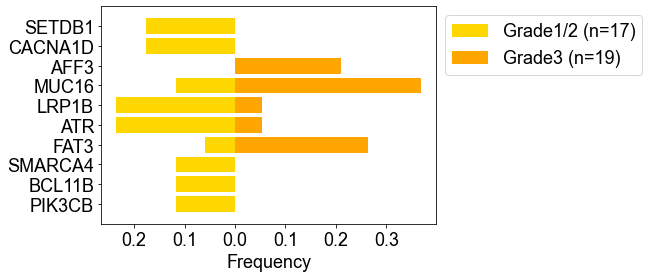

In [26]:
#----------------------------------------------
G1=[i for i in map(str,patient_info_df[patient_info_df['Grade']==2].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['Grade']==3].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
    
    
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])
    
index=0
xs=sorted([i for i in result.items()],key=lambda x:x[1][1])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/Figures_plan/Figure1/grade.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','Grade1/2','Grade3'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,[i[0]]+i[1])])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[1][2]],color='gold',label='Grade1/2 (n=%d)'%(num_of_G1))
        plt.barh([index],[i[1][3]],color='orange',label='Grade3 (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[1][2]],color='gold')
        plt.barh([index],[i[1][3]],color='orange')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[1][1]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)


plt.savefig('../Figure1_D_grade.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure1_D_grade.pdf',
            bbox_inches='tight',quality=95)
plt.show()

position:
[('KMT2C', [0.1568627450980392, 0.016815752070201462, 0.2608695652173913, 0.6923076923076923]), ('CACNA1D', [0.0, 0.04005602240896362, 0.0, 0.23076923076923078]), ('GNAS', [0.10227272727272728, 0.0470354808590104, 0.043478260869565216, 0.3076923076923077]), ('FAT3', [inf, 0.06790458118731378, 0.2608695652173913, 0.0]), ('AKAP9', [0.15151515151515152, 0.12380952380952398, 0.043478260869565216, 0.23076923076923078]), ('SMARCA4', [0.0, 0.12380952380952423, 0.0, 0.15384615384615385]), ('BCL11B', [0.0, 0.12380952380952423, 0.0, 0.15384615384615385]), ('PIK3CB', [0.0, 0.12380952380952423, 0.0, 0.15384615384615385]), ('STAT6', [0.0, 0.12380952380952423, 0.0, 0.15384615384615385]), ('PCM1', [0.0, 0.12380952380952423, 0.0, 0.15384615384615385]), ('MAP2K4', [0.0, 0.12380952380952423, 0.0, 0.15384615384615385]), ('PMS2', [0.0, 0.12380952380952423, 0.0, 0.15384615384615385]), ('MAP3K1', [inf, 0.2880952380952384, 0.13043478260869565, 0.0]), ('CUX1', [inf, 0.2880952380952384, 0.13043478260

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


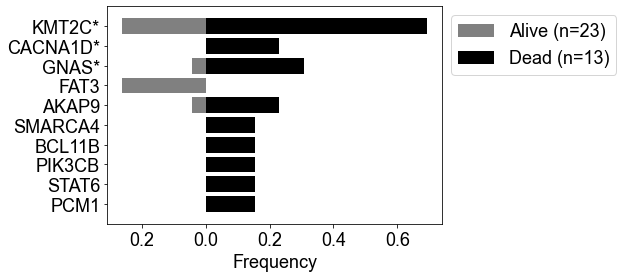

In [27]:
#----------------------------------------------
G1=[i for i in map(str,patient_info_df[patient_info_df['status (death:1,alive:0)']==0].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['status (death:1,alive:0)']==1].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
    
    
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])
    
index=0
xs=sorted([i for i in result.items()],key=lambda x:x[1][1])[:10]

with open('../vital_status.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','alive','dead'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,[i[0]]+i[1])])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[1][2]],color='grey',label='Alive (n=%d)'%(num_of_G1))
        plt.barh([index],[i[1][3]],color='black',label='Dead (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[1][2]],color='grey')
        plt.barh([index],[i[1][3]],color='black')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[1][1]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)


plt.savefig('../Figure1_D_vital_status.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure1_D_vital_status.pdf',
            bbox_inches='tight',quality=95)
plt.show()

position:
[('FLCN', [0.0, 0.04545454545454564, 0.0, 0.2777777777777778]), ('AKAP9', [inf, 0.10389610389610417, 0.2222222222222222, 0.0]), ('GLI1', [0.0, 0.10389610389610417, 0.0, 0.2222222222222222]), ('FAT3', [6.538461538461538, 0.17741935483870996, 0.2777777777777778, 0.05555555555555555]), ('PREX2', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('CSF1R', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('ROBO2', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('EPHA7', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('SETDB1', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('POLQ', [inf, 0.22857142857142895, 0.16666666666666666, 0.0]), ('FAT4', [0.20588235294117646, 0.33766233766233794, 0.05555555555555555, 0.2222222222222222]), ('ETV1', [0.0, 0.4857142857142869, 0.0, 0.1111111111111111]), ('SMARCA4', [inf, 0.4857142857142869, 0.1111111111111111, 0.0]), ('PIK3CB', [inf, 0.4857142857142869, 0.1111111111111111, 0.0]), ('SF3B1', [inf, 0.485714285714

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


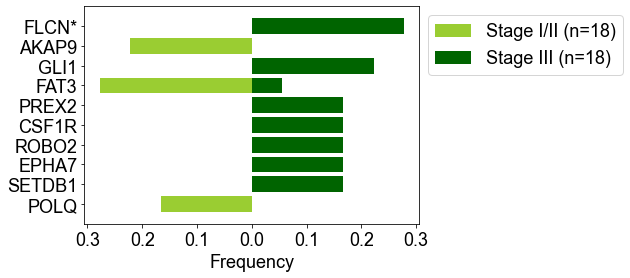

In [28]:
#----------------------------------------------
G1=[i for i in map(str,patient_info_df[(patient_info_df['TNMstage']==1)|
                                       (patient_info_df['TNMstage']==2)].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[patient_info_df['TNMstage']==3].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
    
    
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])
    
index=0
xs=sorted([i for i in result.items()],key=lambda x:x[1][1])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/Figures_plan/Figure1/stages.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','alive','dead'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,[i[0]]+i[1])])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[1][2]],color='yellowgreen',label='Stage I/II (n=%d)'%(num_of_G1))
        plt.barh([index],[i[1][3]],color='darkgreen',label='Stage III (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[1][2]],color='yellowgreen')
        plt.barh([index],[i[1][3]],color='darkgreen')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[1][1]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)


plt.savefig('../Figure1_D_stages.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure1_D_stages.pdf',
            bbox_inches='tight',quality=95)

plt.show()

In [30]:
number_of_mutation_per_samples={}
for i in count_dic1:
    number_of_mutation_per_samples[i]=count_dic1[i]+count_dic2[i]
number_of_mutation_per_samples

{'30': 143,
 '8': 347,
 '12': 176,
 '51': 205,
 '54': 924,
 '36': 200,
 '23': 141,
 '9': 144,
 '6': 435,
 '10': 219,
 '7': 162,
 '1': 251,
 '28': 112,
 '3': 132,
 '16': 313,
 '24': 239,
 '2': 222,
 '15': 144,
 '38': 249,
 '4': 220,
 '34': 233,
 '5': 242,
 '14': 259,
 '17': 180,
 '21': 152,
 '33': 144,
 '26': 179,
 '20': 75,
 '18': 143,
 '49': 214,
 '13': 228,
 '27': 152,
 '48': 216,
 '22': 157,
 '11': 209,
 '52': 167}

In [202]:
number_of_mutation_per_samples={
'1':253,
'2':227,
'3':133,
'4':223,
'5':245,
'6':438,
'7':164,
'8':352,
'9':144,
'10':228,
'11':211,
'12':176,
'13':230,
'14':261,
'15':145,
'16':315,
'17':179,
'18':145,
'20':76,
'21':155,
'22':162,
'23':141,
'24':241,
'26':179,
'27':151,
'28':116,
'30':145,
'33':145,
'34':240,
'36':201,
'38':254,
'48':219,
'49':224,
'51':206,
'52':166,
'54':1161,
}


In [203]:
sample_statistics=pd.read_csv('../sample_statistics2.txt',sep='\t',index_col=0)

    
dic={}
for i in number_of_mutation_per_samples:
    dic[i]=number_of_mutation_per_samples[i]
    
mutation_load={}
for i in dic:
    mutation_load[i]=dic[i]/sample_statistics.loc['T'+i,'#loc>=20X']*1000000
mutation_load

{'1': 4.225783442294797,
 '2': 3.551095532526275,
 '3': 2.111258128403322,
 '4': 3.544351068895223,
 '5': 3.889851719805058,
 '6': 6.932482087843285,
 '7': 2.5994645895465225,
 '8': 5.585938618278727,
 '9': 2.2771596835456487,
 '10': 3.5796712916595435,
 '11': 3.2803354461699286,
 '12': 3.057561815083352,
 '13': 3.630996879458134,
 '14': 4.682297671279884,
 '15': 2.504245732756636,
 '16': 5.4960496227328335,
 '17': 3.143868203846096,
 '18': 2.7001371446209843,
 '20': 1.2709108735288162,
 '21': 2.750029877743962,
 '22': 2.556734813539697,
 '23': 2.4421343200895405,
 '24': 4.026354612712134,
 '26': 3.074492127393625,
 '27': 2.3962366072590418,
 '28': 2.18134687413181,
 '30': 2.289991294558611,
 '33': 2.2989493119886832,
 '34': 3.809020353770066,
 '36': 3.2198507869884003,
 '38': 4.035571689651128,
 '48': 3.473517466661885,
 '49': 3.5408352915812262,
 '51': 3.3995620835949016,
 '52': 2.6633865723986125,
 '54': 18.468955705749227}

In [38]:
import numpy as np

np.median(list(mutation_load.values()))

3.2500931165791647

position:
[('TP53', [0.125, 0.027490862863499124, 0.1111111111111111, 0.5]), ('BRCA2', [0.0, 0.10389610389610417, 0.0, 0.2222222222222222]), ('KMT2D', [0.0, 0.10389610389610417, 0.0, 0.2222222222222222]), ('PIK3CA', [0.0, 0.10389610389610417, 0.0, 0.2222222222222222]), ('KMT2C', [3.25, 0.17558317615385882, 0.5555555555555556, 0.2777777777777778]), ('WRN', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('NCOR2', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('TNC', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('NCOA1', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('PTPRT', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('CLTC', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('AXIN2', [0.0, 0.22857142857142895, 0.0, 0.16666666666666666]), ('ARID1A', [0.325, 0.40175953079178994, 0.1111111111111111, 0.2777777777777778]), ('ETV1', [0.0, 0.4857142857142869, 0.0, 0.1111111111111111]), ('MYO5A', [inf, 0.4857142857142869, 0.1111111111111111, 

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


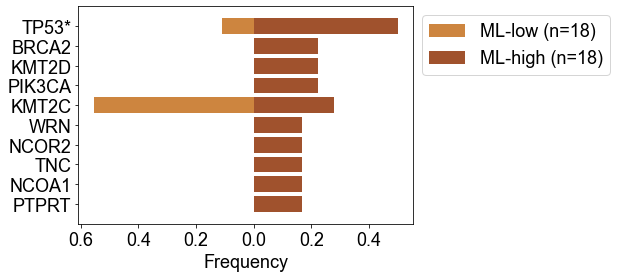

In [209]:
G1=[]
G2=[]

for i in mutation_load:
    if mutation_load[i]>3.2500931165791647:
        G2.append(i)
    else:
        G1.append(i)
        
num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
        
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])




    
index=0
xs=sorted([i for i in result.items()],key=lambda x:x[1][1])[:10]

for i in xs:
    if index==1:
        plt.barh([index],[-i[1][2]],color='peru',label='ML-low (n=%d)'%(num_of_G1))
        plt.barh([index],[i[1][3]],color='sienna',label='ML-high (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[1][2]],color='peru')
        plt.barh([index],[i[1][3]],color='sienna')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[1][1]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)

plt.savefig('../Figure1_E_ML.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure1_E_ML.pdf',
            bbox_inches='tight',quality=95)

with open('../ML.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','ML-low','ML-high'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,[i[0]]+i[1])])+'\n')


plt.show()

position:
[('AKAP9', [inf, 0.0035650623885918084, 0.4, 0.0]), ('ARHGEF10L', [10.714285714285714, 0.05653170359052723, 0.3, 0.038461538461538464]), ('MACC1', [inf, 0.0714285714285716, 0.2, 0.0]), ('FANCD2', [inf, 0.0714285714285716, 0.2, 0.0]), ('CNBD1', [inf, 0.0714285714285716, 0.2, 0.0]), ('LRP1B', [5.142857142857143, 0.11860198624904536, 0.3, 0.07692307692307693]), ('NCOA1', [6.25, 0.1806722689075631, 0.2, 0.038461538461538464]), ('PTPRT', [6.25, 0.1806722689075631, 0.2, 0.038461538461538464]), ('CLTC', [6.25, 0.1806722689075631, 0.2, 0.038461538461538464]), ('TP53', [3.3333333333333335, 0.22401524569783438, 0.5, 0.23076923076923078]), ('ATRX', [inf, 0.2777777777777781, 0.1, 0.0]), ('NFKB2', [inf, 0.2777777777777781, 0.1, 0.0]), ('SLC34A2', [inf, 0.2777777777777781, 0.1, 0.0]), ('PRRX1', [inf, 0.2777777777777781, 0.1, 0.0]), ('SEPT9', [inf, 0.2777777777777781, 0.1, 0.0]), ('CDK4', [inf, 0.2777777777777781, 0.1, 0.0]), ('TFPT', [inf, 0.2777777777777781, 0.1, 0.0]), ('LARP4B', [inf, 0

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


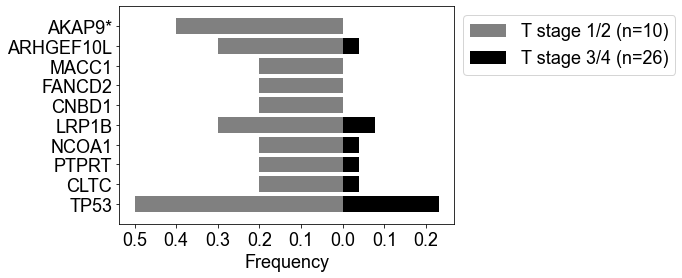

In [34]:
G1=[i for i in map(str,patient_info_df[(patient_info_df['Tstage']==1)|
                                       (patient_info_df['Tstage']==2)].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[(patient_info_df['Tstage']==3)|
                                       (patient_info_df['Tstage']==4)].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
    
    
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])
    
index=0
xs=sorted([i for i in result.items()],key=lambda x:x[1][1])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/Figures_plan/Figure1/T.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','alive','dead'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,[i[0]]+i[1])])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[1][2]],color='grey',label='T stage 1/2 (n=%d)'%(num_of_G1))
        plt.barh([index],[i[1][3]],color='black',label='T stage 3/4 (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[1][2]],color='grey')
        plt.barh([index],[i[1][3]],color='black')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[1][1]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)

plt.savefig('../Figure1_F_T.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure1_F_T.pdf',
            bbox_inches='tight',quality=95)

plt.show()

position:
[('GNAS', [0.0, 0.06194295900178276, 0.0, 0.23809523809523808]), ('FLCN', [0.0, 0.06194295900178276, 0.0, 0.23809523809523808]), ('KAT6A', [inf, 0.16666666666666718, 0.13333333333333333, 0.0]), ('NTRK1', [inf, 0.16666666666666718, 0.13333333333333333, 0.0]), ('MACC1', [inf, 0.16666666666666718, 0.13333333333333333, 0.0]), ('CNBD1', [inf, 0.16666666666666718, 0.13333333333333333, 0.0]), ('ATP2B3', [inf, 0.16666666666666718, 0.13333333333333333, 0.0]), ('ATP1A1', [inf, 0.16666666666666718, 0.13333333333333333, 0.0]), ('BIRC6', [inf, 0.16666666666666718, 0.13333333333333333, 0.0]), ('FANCD2', [inf, 0.16666666666666718, 0.13333333333333333, 0.0]), ('FAT3', [3.4545454545454546, 0.20997211201196003, 0.26666666666666666, 0.09523809523809523]), ('ROS1', [0.0, 0.25000000000000044, 0.0, 0.14285714285714285]), ('CSF1R', [0.0, 0.25000000000000044, 0.0, 0.14285714285714285]), ('SETDB1', [0.0, 0.25000000000000044, 0.0, 0.14285714285714285]), ('ROBO2', [0.0, 0.25000000000000044, 0.0, 0.1428

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


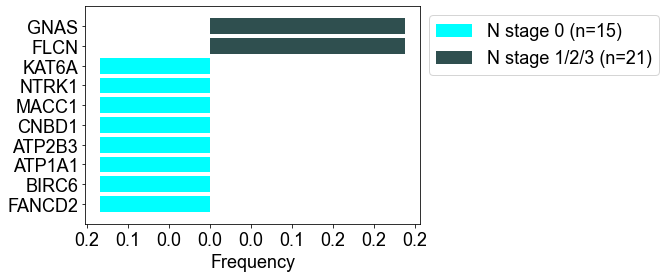

In [49]:
G1=[i for i in map(str,patient_info_df[(patient_info_df['Nstage']==0)].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[(patient_info_df['Nstage']==1)|
                                       (patient_info_df['Nstage']==2)|
                                       (patient_info_df['Nstage']==3)].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
    
    
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])
    
index=0
xs=sorted([i for i in result.items()],key=lambda x:x[1][1])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/Figures_plan/Figure1/N.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','alive','dead'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,[i[0]]+i[1])])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[1][2]],color='cyan',label='N stage 0 (n=%d)'%(num_of_G1))
        plt.barh([index],[i[1][3]],color='darkslategrey',label='N stage 1/2/3 (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[1][2]],color='cyan')
        plt.barh([index],[i[1][3]],color='darkslategrey')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[1][1]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)

plt.savefig('../Figure1_G_N.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure1_G_N.pdf',
            bbox_inches='tight',quality=95)


plt.show()

position:
[('CIC', [inf, 0.0040322580645161315, 0.5, 0.0]), ('KMT2C', [0.0, 0.023799592139414117, 0.0, 0.5384615384615384]), ('FGFR3', [inf, 0.030241935483870955, 0.3333333333333333, 0.0]), ('JAK3', [inf, 0.030241935483870955, 0.3333333333333333, 0.0]), ('NCOR2', [12.5, 0.08266129032258078, 0.3333333333333333, 0.038461538461538464]), ('GLI1', [6.0, 0.1504449388209118, 0.3333333333333333, 0.07692307692307693]), ('ARHGEF10L', [6.0, 0.1504449388209118, 0.3333333333333333, 0.07692307692307693]), ('NFIB', [inf, 0.18749999999999958, 0.16666666666666666, 0.0]), ('SETD2', [inf, 0.18749999999999958, 0.16666666666666666, 0.0]), ('CTNND1', [inf, 0.18749999999999958, 0.16666666666666666, 0.0]), ('CAMTA1', [inf, 0.18749999999999958, 0.16666666666666666, 0.0]), ('BRIP1', [inf, 0.18749999999999958, 0.16666666666666666, 0.0]), ('SIX1', [inf, 0.18749999999999958, 0.16666666666666666, 0.0]), ('ASXL1', [inf, 0.18749999999999958, 0.16666666666666666, 0.0]), ('DCC', [inf, 0.18749999999999958, 0.16666666666

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


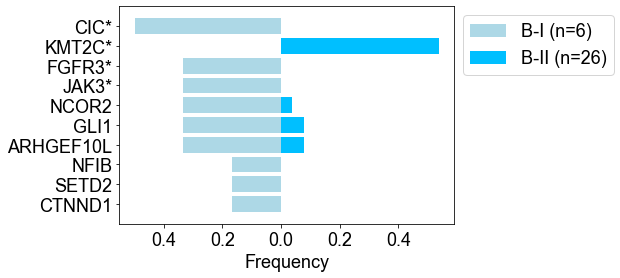

In [76]:
G1=[i for i in map(str,patient_info_df[(patient_info_df['InitialGastrectomy (B-I:1,B-II:2,R-Y:3,Proximal:4)']==1)].index.tolist()) if i in order_df.columns]
G2=[i for i in map(str,patient_info_df[(patient_info_df['InitialGastrectomy (B-I:1,B-II:2,R-Y:3,Proximal:4)']==2)].index.tolist()) if i in order_df.columns]

num_of_G1=len(G1)
num_of_G2=len(G2)
result={}
for i in df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_in_G1=order_df.loc[i,G1].sum()
        num_in_G2=order_df.loc[i,G2].sum()
        OR,pval=scipy.stats.fisher_exact([[num_in_G1,num_in_G2],
                                          [num_of_G1-num_in_G1,num_of_G2-num_in_G2]])
        result[i]=[OR,pval,num_in_G1/num_of_G1,num_in_G2/num_of_G2]
    
    
print('position:')    
print(sorted(result.items(),key=lambda x:x[1][1])[:50])
    
index=0
xs=sorted([i for i in result.items()],key=lambda x:x[1][1])[:10]

with open('/home/chenhaojie/桌面/Xu_lab/Figures_plan/Figure1/B.txt','w') as outfile:
    outfile.write('\t'.join(['gene_name','OR','p_val','alive','dead'])+'\n')
    for i in xs:
        outfile.write('\t'.join([j for j in map(str,[i[0]]+i[1])])+'\n')

for i in xs:
    if index==1:
        plt.barh([index],[-i[1][2]],color='lightblue',label='B-I (n=%d)'%(num_of_G1))
        plt.barh([index],[i[1][3]],color='deepskyblue',label='B-II (n=%d)'%(num_of_G2))
    else:
        plt.barh([index],[-i[1][2]],color='lightblue')
        plt.barh([index],[i[1][3]],color='deepskyblue')        
    index+=1
plt.yticks([i for i in range(10)],[i[0]+'*' if i[1][1]<=0.05 else i[0] for i in xs],size=18)  
xticks=plt.xticks()[0][1:-1]
plt.xticks(xticks,['%.1f'%(abs(i)) for i in xticks],size=18)
plt.xlabel('Frequency',size=18)

plt.ylim(10,-1)
plt.legend(bbox_to_anchor=(1,1),fontsize=18)

plt.savefig('../Figure1_H_B.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure1_H_B.pdf',
            bbox_inches='tight',quality=95)
plt.show()

In [154]:
maf.columns.tolist()

['Hugo_Symbol',
 'Entrez_Gene_Id',
 'Center',
 'NCBI_Build',
 'Chromosome',
 'Start_Position',
 'End_Position',
 'Strand',
 'Variant_Classification',
 'Variant_Type',
 'Reference_Allele',
 'Tumor_Seq_Allele1',
 'Tumor_Seq_Allele2',
 'dbSNP_RS',
 'dbSNP_Val_Status',
 'Tumor_Sample_Barcode',
 'Matched_Norm_Sample_Barcode',
 'Match_Norm_Seq_Allele1',
 'Match_Norm_Seq_Allele2',
 'Tumor_Validation_Allele1',
 'Tumor_Validation_Allele2',
 'Match_Norm_Validation_Allele1',
 'Match_Norm_Validation_Allele2',
 'Verification_Status',
 'Validation_Status',
 'Mutation_Status',
 'Sequencing_Phase',
 'Sequence_Source',
 'Validation_Method',
 'Score',
 'BAM_File',
 'Sequencer',
 'Tumor_Sample_UUID',
 'Matched_Norm_Sample_UUID',
 'HGVSc',
 'HGVSp',
 'HGVSp_Short',
 'Transcript_ID',
 'Exon_Number',
 't_depth',
 't_ref_count',
 't_alt_count',
 'n_depth',
 'n_ref_count',
 'n_alt_count',
 'all_effects',
 'Allele',
 'Gene',
 'Feature',
 'Feature_type',
 'One_Consequence',
 'Consequence',
 'cDNA_position',
 'C

In [158]:
maf.loc[maf['Hugo_Symbol']=='KMT2C','Variant_Classification']

922      Missense_Mutation
6549     Missense_Mutation
7043     Missense_Mutation
12005    Missense_Mutation
12006    Missense_Mutation
12007    Missense_Mutation
14357    Missense_Mutation
14358    Missense_Mutation
14359    Missense_Mutation
14360    Missense_Mutation
15719    Missense_Mutation
15720    Missense_Mutation
15721    Nonsense_Mutation
17313    Missense_Mutation
18425    Nonsense_Mutation
21297    Missense_Mutation
22083    Missense_Mutation
22084    Missense_Mutation
22085    Missense_Mutation
22086    Missense_Mutation
22736    Missense_Mutation
29088    Nonsense_Mutation
29810    Missense_Mutation
41727    Missense_Mutation
41728    Missense_Mutation
44924    Nonsense_Mutation
46473    Nonsense_Mutation
46986    Nonsense_Mutation
46987    Missense_Mutation
50186    Missense_Mutation
55487    Missense_Mutation
60676    Missense_Mutation
60677    Missense_Mutation
63957    Missense_Mutation
64600    Missense_Mutation
65699    Missense_Mutation
65700    Missense_Mutation
6

In [15]:
maf.loc[maf['Hugo_Symbol']=='GNAS','Protein_position']

457       120/1037
458       622/1037
5244      663/1037
9760      307/1037
13509       31/394
16443      336/394
19830     601/1037
19831      201/394
21502      201/394
26193     134/1037
26256      201/394
39212     116/1037
47171     427/1037
47172      158/394
55039     544/1037
71780      75/1037
71781     255/1037
85918      336/394
93206     263/1037
109093     265/394
109466    390/1037
118188     109/394
123357    632/1037
123358       -/394
127732    251/1037
144589    282/1037
144857    282/1037
145045     61/1037
157337     333/394
160938     201/394
162797     201/394
164597     229/394
177543    426/1037
180999    580/1037
181000     160/394
195692     366/394
197094     87/1037
210823       -/394
210824     356/394
Name: Protein_position, dtype: object

In [155]:
maf.loc[maf['Hugo_Symbol']=='KMT2C','Amino_acids']

922      S/T
6549     R/H
7043     Q/R
12005    K/R
12006    S/T
12007    C/R
14357    A/V
14358    P/H
14359    A/V
14360    R/Q
15719    A/V
15720    D/G
15721    R/*
17313    A/V
18425    Y/*
21297    R/C
22083    Y/C
22084    V/M
22085    V/I
22086    L/S
22736    R/H
29088    Q/*
29810    T/M
41727    R/C
41728    V/A
44924    R/*
46473    S/*
46986    R/*
46987    A/T
50186    K/N
55487    D/G
60676    A/V
60677    I/M
63957    E/Q
64600    N/S
65699    H/D
65700    A/V
66618    T/N
67583    NaN
67584    Y/C
68360    G/D
70066    R/*
71339    R/S
71521    V/A
71522    E/K
72740    R/C
79382    R/*
80685    A/T
80686    N/D
80687    NaN
83501    R/*
85890    I/M
88872    A/S
95529    P/S
96391    Q/*
96392    D/E
99928    C/Y
Name: Amino_acids, dtype: object

In [174]:
maf.loc[maf['Hugo_Symbol']=='KMT2C','Tumor_Sample_Barcode']

922      TCGA-VQ-AA6K-01A-11D-A410-08
6549     TCGA-VQ-A8E3-01A-11D-A397-08
7043     TCGA-BR-8382-01A-11D-2394-08
12005    TCGA-BR-6452-01A-12D-1800-08
12006    TCGA-BR-6452-01A-12D-1800-08
12007    TCGA-BR-6452-01A-12D-1800-08
14357    TCGA-F1-6177-01A-11D-1800-08
14358    TCGA-F1-6177-01A-11D-1800-08
14359    TCGA-F1-6177-01A-11D-1800-08
14360    TCGA-F1-6177-01A-11D-1800-08
15719    TCGA-BR-4184-01A-01D-1126-08
15720    TCGA-BR-4184-01A-01D-1126-08
15721    TCGA-BR-4184-01A-01D-1126-08
17313    TCGA-R5-A7O7-01A-11D-A33T-08
18425    TCGA-VQ-A8PT-01A-11D-A410-08
21297    TCGA-FP-7916-01A-11D-2201-08
22083    TCGA-VQ-A8PO-01A-11D-A410-08
22084    TCGA-VQ-A8PO-01A-11D-A410-08
22085    TCGA-VQ-A8PO-01A-11D-A410-08
22086    TCGA-VQ-A8PO-01A-11D-A410-08
22736    TCGA-HU-A4GX-01A-12D-A25D-08
29088    TCGA-CG-4305-01A-01D-1158-08
29810    TCGA-CG-4306-01A-01D-1158-08
41727    TCGA-VQ-A8P2-01A-11D-A364-08
41728    TCGA-VQ-A8P2-01A-11D-A364-08
44924    TCGA-BR-7707-01A-11D-2053-08
46473    TCG

In [175]:
dic={}
type_dic={}
for i,j in zip(maf.loc[maf['Hugo_Symbol']=='KMT2C','Protein_position'],
             maf.loc[maf['Hugo_Symbol']=='KMT2C','Variant_Classification']):
    a=i.split('/')[0]
    if a in dic:
        dic[a]+=1
    else:
        dic[a]=1
    type_dic[a]=j
dic        

{'3772': 1,
 '4549': 1,
 '419': 1,
 '4507': 1,
 '3618': 1,
 '409': 1,
 '4748': 1,
 '2419': 1,
 '1531': 1,
 '866': 1,
 '4837': 1,
 '2172': 1,
 '2066': 2,
 '374': 1,
 '4657': 1,
 '2497': 1,
 '3265': 1,
 '2105': 1,
 '1464': 1,
 '955': 1,
 '3252': 1,
 '3450': 1,
 '1957': 1,
 '4822': 1,
 '125': 1,
 '2609': 1,
 '1931': 1,
 '2028': 1,
 '293': 1,
 '3929': 1,
 '1596': 1,
 '4433': 2,
 '868': 1,
 '2583': 1,
 '2369': 1,
 '4620': 1,
 '3656': 1,
 '1873': 1,
 '4781': 1,
 '1395': 1,
 '2986': 1,
 '4353': 1,
 '2510': 1,
 '616': 1,
 '4608': 1,
 '56': 1,
 '3670': 1,
 '3173': 1,
 '2610': 1,
 '3155': 1,
 '241': 1,
 '3380': 1,
 '1720': 1,
 '1374': 1,
 '3363': 1}

In [176]:
type_dic

{'3772': 'Missense_Mutation',
 '4549': 'Missense_Mutation',
 '419': 'Missense_Mutation',
 '4507': 'Missense_Mutation',
 '3618': 'Missense_Mutation',
 '409': 'Missense_Mutation',
 '4748': 'Missense_Mutation',
 '2419': 'Missense_Mutation',
 '1531': 'Missense_Mutation',
 '866': 'Missense_Mutation',
 '4837': 'Missense_Mutation',
 '2172': 'Missense_Mutation',
 '2066': 'Nonsense_Mutation',
 '374': 'Missense_Mutation',
 '4657': 'Nonsense_Mutation',
 '2497': 'Missense_Mutation',
 '3265': 'Missense_Mutation',
 '2105': 'Missense_Mutation',
 '1464': 'Missense_Mutation',
 '955': 'Missense_Mutation',
 '3252': 'Missense_Mutation',
 '3450': 'Nonsense_Mutation',
 '1957': 'Missense_Mutation',
 '4822': 'Missense_Mutation',
 '125': 'Missense_Mutation',
 '2609': 'Nonsense_Mutation',
 '1931': 'Nonsense_Mutation',
 '2028': 'Nonsense_Mutation',
 '293': 'Missense_Mutation',
 '3929': 'Missense_Mutation',
 '1596': 'Missense_Mutation',
 '4433': 'Missense_Mutation',
 '868': 'Missense_Mutation',
 '2583': 'Missense

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


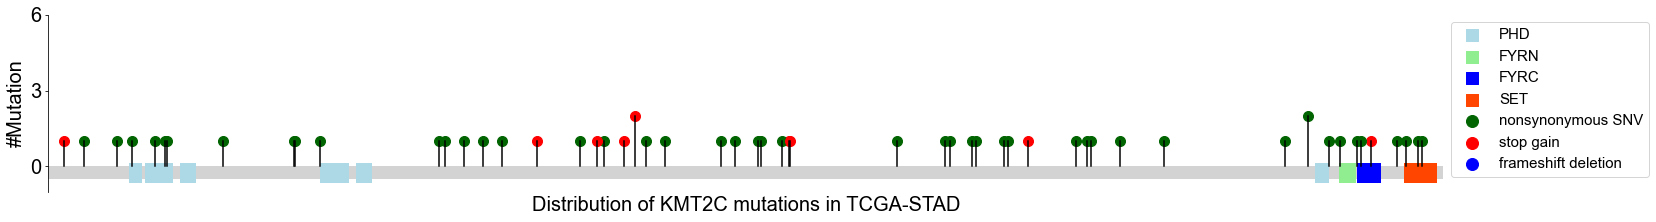

In [185]:
plt.figure(figsize=(25,15))
ax=plt.subplot(411)

KMT2C={
    'PHD1':[283,331,'lightblue'],
    'PHD2':[341,391,'lightblue'],
    'PHD3':[388,438,'lightblue'],
    'PHD4':[464,520,'lightblue'],
    'PHD5':[957,1010,'lightblue'],
    'PHD6':[1007,1057,'lightblue'],
    'PHD7':[1084,1139,'lightblue'],
    'PHD8':[4460,4507,'lightblue'],
    'FYRN':[4545,4605,'lightgreen'],
    'SET':[4771,4887,'orangered'],
    'FYRC':[4606,4691,'blue'],
}

num_of_AAs=4911

plt.barh(-0.25,num_of_AAs,0.5,color='lightgrey')

for i in KMT2C:
    x,y,c=KMT2C[i]
    plt.barh(-0.25,y-x,left=x,color=c)

color_dic={'Missense_Mutation':'darkgreen',
           'Nonsense_Mutation':'red',
           'Splice_Site':'darkgreen'}

for i in dic:
    x=int(i)
    y=dic[i]
    plt.scatter(x,y,c=color_dic[type_dic[i]],s=100)
    plt.plot([x,x],[0,y],color='black')

plt.ylim(-1,4.5)
plt.xlim(0,num_of_AAs)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([],[])
plt.yticks([0,3,6],size=20)

patches=[plt.scatter([],[],marker='s',color='lightblue',label='PHD'),
         plt.scatter([],[],marker='s',color='lightgreen',label='FYRN'),
         plt.scatter([],[],marker='s',color='blue',label='FYRC'),
         plt.scatter([],[],marker='s',color='orangered',label='SET'),
         plt.scatter([],[],color='darkgreen',label='nonsynonymous SNV'),
         plt.scatter([],[],color='red',label='stop gain'),
         plt.scatter([],[],color='blue',label='frameshift deletion'),]

plt.legend(bbox_to_anchor=(1,1),handles=patches,markerscale=2,fontsize=15)

plt.ylabel('#Mutation',size=20)
plt.xlabel('Distribution of KMT2C mutations in TCGA-STAD',size=20)

plt.savefig('../TCGA_STAD.png',
            bbox_inches='tight',quality=95)
plt.savefig('../TCGA_STAD.pdf',
            bbox_inches='tight',quality=95)

plt.show()

In [165]:
?plt.legend

In [152]:
maf[maf['Hugo_Symbol']=='KMT2C']

Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  \
922         KMT2C           58508     BI     GRCh38       chr7   
6549        KMT2C           58508     BI     GRCh38       chr7   
7043        KMT2C           58508     BI     GRCh38       chr7   
12005       KMT2C           58508     BI     GRCh38       chr7   
12006       KMT2C           58508     BI     GRCh38       chr7   
12007       KMT2C           58508     BI     GRCh38       chr7   
14357       KMT2C           58508     BI     GRCh38       chr7   
14358       KMT2C           58508     BI     GRCh38       chr7   
14359       KMT2C           58508     BI     GRCh38       chr7   
14360       KMT2C           58508     BI     GRCh38       chr7   
15719       KMT2C           58508     BI     GRCh38       chr7   
15720       KMT2C           58508     BI     GRCh38       chr7   
15721       KMT2C           58508     BI     GRCh38       chr7   
17313       KMT2C           58508     BI     GRCh38       chr7   
18425       KMT2C           58508     BI     GRCh38       chr7   
21297       KMT2C           58508     BI     GRCh38       chr7   
22083       KMT2C           58508     BI     GRCh38       chr7   
22084       KMT2C           58508     BI     GRCh38       chr7   
22085       KMT2C           58508     BI     GRCh38       chr7   
22086       KMT2C           58508     BI     GRCh38       chr7   
22736       KMT2C           58508     BI     GRCh38       chr7   
29088       KMT2C           58508     BI     GRCh38       chr7   
29810       KMT2C           58508     BI     GRCh38       chr7   
41727       KMT2C           58508     BI     GRCh38       chr7   
41728       KMT2C           58508     BI     GRCh38       chr7   
44924       KMT2C           58508     BI     GRCh38       chr7   
46473       KMT2C           58508     BI     GRCh38       chr7   
46986       KMT2C           58508     BI     GRCh38       chr7   
46987       KMT2C           58508     BI     GRCh38       chr7   
50186       KMT2C           58508     BI     GRCh38       chr7   
55487       KMT2C           58508     BI     GRCh38       chr7   
60676       KMT2C           58508     BI     GRCh38       chr7   
60677       KMT2C           58508     BI     GRCh38       chr7   
63957       KMT2C           58508     BI     GRCh38       chr7   
64600       KMT2C           58508     BI     GRCh38       chr7   
65699       KMT2C           58508     BI     GRCh38       chr7   
65700       KMT2C           58508     BI     GRCh38       chr7   
66618       KMT2C           58508     BI     GRCh38       chr7   
67583       KMT2C           58508     BI     GRCh38       chr7   
67584       KMT2C           58508     BI     GRCh38       chr7   
68360       KMT2C           58508     BI     GRCh38       chr7   
70066       KMT2C           58508     BI     GRCh38       chr7   
71339       KMT2C           58508     BI     GRCh38       chr7   
71521       KMT2C           58508     BI     GRCh38       chr7   
71522       KMT2C           58508     BI     GRCh38       chr7   
72740       KMT2C           58508     BI     GRCh38       chr7   
79382       KMT2C           58508     BI     GRCh38       chr7   
80685       KMT2C           58508     BI     GRCh38       chr7   
80686       KMT2C           58508     BI     GRCh38       chr7   
80687       KMT2C           58508     BI     GRCh38       chr7   
83501       KMT2C           58508     BI     GRCh38       chr7   
85890       KMT2C           58508     BI     GRCh38       chr7   
88872       KMT2C           58508     BI     GRCh38       chr7   
95529       KMT2C           58508     BI     GRCh38       chr7   
96391       KMT2C           58508     BI     GRCh38       chr7   
96392       KMT2C           58508     BI     GRCh38       chr7   
99928       KMT2C           58508     BI     GRCh38       chr7   

       Start_Position  End_Position Strand Variant_Classification  \
922         152162263     152162263      +      Missense_Mutation   
6549        152148281     152148281    

In [44]:
maf=pd.read_csv('../SNVs.txt',sep='\t')

In [48]:
set(maf['Variant_Type'])

{'SNP'}

In [14]:
maf=pd.read_csv('../TCGA.STAD.mutect.somatic.maf',sep='\t',
                skiprows=5)

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (87,88,98,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [49]:
maf=pd.read_csv('../TCGA.STAD.mutect.somatic.maf',sep='\t',
                skiprows=5)

all_samples=set()
mutation_dic={}
for i in maf.index:
    gene_name=maf.loc[i,'Hugo_Symbol']
    sample_ID='-'.join(maf.loc[i,'Tumor_Sample_Barcode'].split('-')[:3])
    all_samples.add(sample_ID)
    if gene_name in mutation_dic:
        mutation_dic[gene_name].add(sample_ID)
    else:
        mutation_dic[gene_name]=set([sample_ID])

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (87,88,98,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
len(all_samples)

437

In [180]:
import pandas as pd

maf=pd.read_csv('../SNVs.txt',sep='\t')
all_samples=set()
mutation_dic={}
for i in maf.index:
    gene_name=maf.loc[i,'Hugo_Symbol']
    sample_ID='-'.join(maf.loc[i,'Tumor_Sample_Barcode'].split('-')[:3])
    all_samples.add(sample_ID)
    if gene_name in mutation_dic:
        mutation_dic[gene_name].add(sample_ID)
    else:
        mutation_dic[gene_name]=set([sample_ID])

In [89]:
import re
import glob

#SNPs

paths_SNV=glob.glob('../*.exonic_variant_function')

def get_somatic_snps(path):
    somatic_mutations_annotation={}
    with open(path) as infile:
        for line in infile:
            temp=line.strip().split('\t')
            chrom,pos,ref_nt,alt_nt=[temp[3],temp[4],temp[6],temp[7]]

            mutation_type=temp[1]
            gene_name=temp[2].split(':')[0]
            ref,alt=[0,0]
            if temp[-1].split(':')[0]=='0/1':
                ref,alt=temp[-1].split(':')[1].split(',')
            else:
                ref,alt=temp[-2].split(':')[1].split(',')
            ref=int(ref)
            alt=int(alt)
            vaf=alt/(ref+alt)
            if mutation_type in somatic_mutations_annotation:
                if gene_name in somatic_mutations_annotation[mutation_type]:
                    somatic_mutations_annotation[mutation_type][gene_name].append(vaf)
                else:
                    somatic_mutations_annotation[mutation_type][gene_name]=[vaf]
            else:
                somatic_mutations_annotation[mutation_type]={}
                somatic_mutations_annotation[mutation_type][gene_name]=[vaf]
    return somatic_mutations_annotation

dic_SNP={}
for path in paths_SNV:
    ID=re.search(r'\d+',path).group()
    dic_SNP[ID]=get_somatic_snps(path)
dic_SNP

{'13': {'synonymous SNV': {'GRIK3': [0.07194244604316546],
   'SYT11': [0.08955223880597014],
   'CTNNA2': [0.14285714285714285],
   'TTN': [0.07894736842105263],
   'COL3A1': [0.18181818181818182],
   'ERICH6': [0.05263157894736842],
   'CDH6': [0.128],
   'CMYA5': [0.08450704225352113],
   'COL12A1': [0.1320754716981132],
   'CRYBG1': [0.0898876404494382],
   'MUC17': [0.02671118530884808],
   'SLC26A4': [0.061224489795918366],
   'DGKI': [0.08],
   'ACTR3C': [0.04597701149425287],
   'CNPY1': [0.075],
   'C8orf87': [0.14074074074074075],
   'GRINA': [0.1],
   'C8orf82': [0.125],
   'TNC': [0.15517241379310345],
   'ANGPTL2': [0.11347517730496454],
   'TPTE2': [0.10714285714285714],
   'KLHL25': [0.06696428571428571],
   'GRIN2A': [0.07228915662650602],
   'GP1BA': [0.3076923076923077],
   'HOXB2': [0.13402061855670103],
   'SALL3': [0.09821428571428571],
   'AFF2': [0.1267605633802817]},
  'nonsynonymous SNV': {'RPTN': [0.5294117647058824],
   'FCRL1': [0.10743801652892562],
   'KCN

In [12]:
len(dic_SNP.keys())

36

In [11]:
for i in dic_SNP:
    print(dic_SNP[i].keys())

dict_keys(['synonymous SNV', 'nonsynonymous SNV', 'stoploss'])
dict_keys(['nonsynonymous SNV', 'synonymous SNV', 'unknown', 'stopgain', 'stoploss'])
dict_keys(['synonymous SNV', 'nonsynonymous SNV', 'unknown'])
dict_keys(['unknown', 'stopgain', 'synonymous SNV', 'nonsynonymous SNV'])
dict_keys(['nonsynonymous SNV', 'synonymous SNV', 'unknown', 'stopgain'])
dict_keys(['unknown', 'nonsynonymous SNV', 'synonymous SNV'])
dict_keys(['nonsynonymous SNV', 'synonymous SNV', 'unknown'])
dict_keys(['nonsynonymous SNV', 'synonymous SNV'])
dict_keys(['stopgain', 'nonsynonymous SNV', 'synonymous SNV', 'unknown'])
dict_keys(['synonymous SNV', 'nonsynonymous SNV'])
dict_keys(['synonymous SNV', 'nonsynonymous SNV', 'unknown', 'stopgain'])
dict_keys(['synonymous SNV', 'nonsynonymous SNV'])
dict_keys(['nonsynonymous SNV', 'unknown', 'synonymous SNV', 'stopgain'])
dict_keys(['nonsynonymous SNV', 'synonymous SNV', 'stopgain', 'unknown'])
dict_keys(['synonymous SNV', 'nonsynonymous SNV', 'stopgain'])
dict_

In [90]:
mutation_types=['nonsynonymous SNV','stopgain','stoploss']
all_genes=set()
for ID in dic_SNP:    
    for i in dic_SNP[ID].keys():
        if i!='synonymous SNV' or i!='unknown':
            for j in dic_SNP[ID][i].keys():
                all_genes.add(j)

all_genes=list(all_genes)
all_genes[:10]    

['LCMT2',
 'MALRD1',
 'EXOC3L4',
 'NEU3',
 'KEL',
 'MRGPRD',
 'PRAMEF19',
 'LTBP2',
 'TCEANC2',
 'ARVCF']

In [15]:
'ATR' in all_genes

False

In [4]:
len(all_genes)

2611

In [52]:
all_dic={}
for ID in dic_SNP:
    all_dic[ID]=set()
    for i in mutation_types:  
        if i in dic_SNP[ID]:
            for j in dic_SNP[ID][i]:
                all_dic[ID].add(j)
all_dic['1']    

{'ADAMTSL3',
 'ALPK3',
 'ARID1A',
 'ARPC1A',
 'ATP1A1',
 'AXIN1',
 'BAMBI',
 'BRINP2',
 'CCDC144NL',
 'CHML',
 'CSPG4',
 'DCAF12L1',
 'FAM171B',
 'FAT3',
 'FOXB2',
 'FOXI2',
 'FZD10',
 'GJC1',
 'HEY2',
 'HLCS',
 'IGFN1',
 'IQCK',
 'KDM6B',
 'KIFC2',
 'LRRC74B',
 'MAGEH1',
 'MED24',
 'METTL25',
 'MZF1',
 'NHLH1',
 'NKX3-2',
 'NLRP5',
 'NPIPB11',
 'OPCML',
 'OR4C11',
 'OR9I1',
 'PIK3CA',
 'PLXNC1',
 'PSME4',
 'PTPRD',
 'SCN5A',
 'SETD1A',
 'SLC37A2',
 'SLC38A10',
 'SLC9A6',
 'SLITRK5',
 'SNPH',
 'SPDYE6',
 'SPEG',
 'STEAP4',
 'STK11IP',
 'TBX1',
 'TBX18',
 'TCHH',
 'TECPR1',
 'TFPT',
 'TGFBRAP1',
 'TMEM249',
 'TMF1',
 'TPTE',
 'TRAPPC9',
 'TRMT1',
 'TTLL9',
 'ZDHHC8',
 'ZNF106',
 'ZNF181',
 'ZNF691',
 'ZNF85'}

In [91]:
data=[]
samples_ID=list(all_dic.keys())
for gene in all_genes:
    temp=[]
    for ID in samples_ID:
        if gene in all_dic[ID]:
            temp.append(1)
        else:
            temp.append(0)
    data.append(temp)
df=pd.DataFrame(data,index=all_genes,columns=samples_ID)
df

13  16  9  27  17  26  18  34  7  23  ...  52  1  10  30  28  15  54  \
LCMT2     0   0  0   0   0   0   0   0  0   0  ...   0  0   0   0   0   0   1   
MALRD1    0   0  0   0   0   0   0   0  0   0  ...   0  0   1   0   0   0   0   
EXOC3L4   0   0  0   0   0   0   0   0  0   0  ...   0  0   0   0   0   0   1   
NEU3      0   0  0   0   0   0   0   0  0   0  ...   0  0   0   0   0   0   1   
KEL       0   0  0   0   0   0   0   0  0   0  ...   0  0   0   0   0   0   0   
...      ..  .. ..  ..  ..  ..  ..  .. ..  ..  ...  .. ..  ..  ..  ..  ..  ..   
FGF3      0   0  0   0   0   0   0   0  0   0  ...   0  0   0   0   0   0   0   
RYR1      0   0  0   0   0   0   0   0  0   0  ...   0  0   0   0   0   0   0   
CEP170    0   0  0   0   0   0   1   0  0   0  ...   0  0   0   0   0   0   0   
SOGA3     0   0  0   0   0   0   0   0  0   0  ...   0  0   0   0   0   0   0   
TOPBP1    0   0  0   0   0   0   0   0  0   0  ...   0  0   0   0   0   0   0   

         12  22  21  
LCMT2     0   0   0  
MALRD1    0   0   0  
EXOC3L4   0   0   0  
NEU3      0   0   0  
KEL       0   0   1  
...      ..  ..  ..  
FGF3      0   0   0  
RYR1      0   0   0  
CEP170    0   0   0  
SOGA3     0   0   0  
TOPBP1    0   0   0  

[3715 rows x 36 columns]

In [63]:
(df==2).sum(axis=1)

GTF2I       0
IFT80       0
SLC12A7     1
TMEM260     0
MGRN1       0
           ..
DYSF        0
BRIP1       0
GIPC3       1
PHF19       1
C17orf82    0
Length: 5608, dtype: int64

In [71]:
mutation_dic

{'SH3GLB1': {'TCGA-BR-4191', 'TCGA-BR-8686'},
 'HIPK1': {'TCGA-BR-4363',
  'TCGA-BR-8686',
  'TCGA-CG-5726',
  'TCGA-D7-A6EY',
  'TCGA-HU-A4GU'},
 'TTC31': {'TCGA-BR-8686', 'TCGA-HU-A4GT'},
 'TTN': {'TCGA-3M-AB46',
  'TCGA-B7-5816',
  'TCGA-B7-A5TI',
  'TCGA-B7-A5TJ',
  'TCGA-BR-4184',
  'TCGA-BR-4188',
  'TCGA-BR-4201',
  'TCGA-BR-4256',
  'TCGA-BR-4257',
  'TCGA-BR-4292',
  'TCGA-BR-4357',
  'TCGA-BR-4361',
  'TCGA-BR-4362',
  'TCGA-BR-4363',
  'TCGA-BR-4368',
  'TCGA-BR-4370',
  'TCGA-BR-4371',
  'TCGA-BR-6452',
  'TCGA-BR-6453',
  'TCGA-BR-6455',
  'TCGA-BR-6566',
  'TCGA-BR-6709',
  'TCGA-BR-6802',
  'TCGA-BR-6852',
  'TCGA-BR-7197',
  'TCGA-BR-7703',
  'TCGA-BR-7704',
  'TCGA-BR-7707',
  'TCGA-BR-7715',
  'TCGA-BR-7716',
  'TCGA-BR-7717',
  'TCGA-BR-7851',
  'TCGA-BR-7958',
  'TCGA-BR-8059',
  'TCGA-BR-8060',
  'TCGA-BR-8078',
  'TCGA-BR-8080',
  'TCGA-BR-8081',
  'TCGA-BR-8284',
  'TCGA-BR-8285',
  'TCGA-BR-8286',
  'TCGA-BR-8289',
  'TCGA-BR-8297',
  'TCGA-BR-8363',
  'TCGA-BR-

In [51]:
order_df

30  8  12  51  54  36  23  9  6  10  ...  26  20  18  49  13  27  \
NEU3          0  0   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   
ETV1          0  0   0   1   0   0   0  0  0   0  ...   0   0   0   1   0   0   
PRAMEF19      0  0   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   
SCN10A        0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
CAMSAP3       0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
...          .. ..  ..  ..  ..  ..  .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..   
KLHDC7B       0  0   0   1   0   0   0  0  0   0  ...   0   0   0   0   0   0   
PALM2-AKAP2   0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
ADAM7         0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
RYR1          0  0   0   0   0   0   0  0  0   0  ...   1   0   1   0   0   0   
SOGA3         0  0   1   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   

             48  22  11  52  
NEU3          0   0   0   0  
ETV1          0   0   0   0  
PRAMEF19      0   0   1   0  
SCN10A        0   0   0   0  
CAMSAP3       0   0   0   0  
...          ..  ..  ..  ..  
KLHDC7B       0   0   0   0  
PALM2-AKAP2   0   0   0   0  
ADAM7         0   0   0   0  
RYR1          0   0   0   0  
SOGA3         0   0   0   0  

[5608 rows x 36 columns]

In [72]:
import scipy.stats

data=[]
for i in set(order_df.index)&set(maf['Hugo_Symbol']):
    num_of_mutation_in_GSC=sum(order_df.loc[i,:]!=0)
    num_of_mutation_in_TCGA_STAD=len(mutation_dic[i])
    OR,pval=scipy.stats.fisher_exact([[num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD],
                                      [36-num_of_mutation_in_GSC,437-num_of_mutation_in_TCGA_STAD]],
                                     )
    data.append([i,num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD,num_of_mutation_in_GSC/36,
                 num_of_mutation_in_TCGA_STAD/437,OR,pval])

In [73]:
for i in sorted(data,key=lambda x:x[-1])[:20]:
    print('\t'.join([i[0],str(i[3]*100),str(i[4]*100),str(i[-1])]))

FRG1	19.444444444444446	0.4576659038901602	2.6729031900501226e-07
ANKRD36C	25.0	1.8306636155606408	4.909269490726124e-07
GOLGA6A	19.444444444444446	1.1441647597254003	4.968639225061341e-06
MUC12	13.88888888888889	0.2288329519450801	1.1063945558675967e-05
POTEM	13.88888888888889	0.6864988558352403	9.217578057699797e-05
NACAD	11.11111111111111	0.2288329519450801	0.00013521795017524475
CRIPAK	16.666666666666664	1.6018306636155606	0.00014912362292645012
GOLGA6L10	16.666666666666664	1.8306636155606408	0.00024653772868318
KMT2C	41.66666666666667	15.102974828375288	0.0002538434246560767
CEP162	19.444444444444446	3.4324942791762014	0.0006081164957933712
ZNF708	13.88888888888889	1.6018306636155606	0.0010386618591172142
C16orf96	8.333333333333332	0.2288329519450801	0.0015438015661889272
SPDYE6	8.333333333333332	0.2288329519450801	0.0015438015661889272
MBTD1	11.11111111111111	0.9153318077803204	0.001600049448872397
GPR32	13.88888888888889	2.059496567505721	0.002343559661209613
SHANK1	22.222222222

In [181]:
import scipy.stats
data=[]
for i in set(df.index)&set(maf['Hugo_Symbol']):
    num_of_mutation_in_GSC=sum(df.loc[i,:]!=0)
    num_of_mutation_in_TCGA_STAD=len(mutation_dic[i])
    OR,pval=scipy.stats.fisher_exact([[num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD],
                                      [36-num_of_mutation_in_GSC,433-num_of_mutation_in_TCGA_STAD]],
                                     )
    data.append([i,num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD,num_of_mutation_in_GSC/36,
                 num_of_mutation_in_TCGA_STAD/433,pval])

In [182]:
for i in sorted(data,key=lambda x:x[-1])[:20]:
    print('\t'.join([i[0],str(i[3]*100),str(i[4]*100),str(i[-1])]))

KMT2C	36.11111111111111	8.775981524249422	2.31379390225603e-05
H3F3A	8.333333333333332	0.9237875288683602	0.011767492739849377
MUC4	13.88888888888889	4.157043879907621	0.024445591423585045
GNAS	13.88888888888889	4.157043879907621	0.024445591423585045
LRP1B	8.333333333333332	24.249422632794456	0.037034900323200226
CSMD3	5.555555555555555	19.630484988452658	0.042275216061764744
RNF213	0.0	9.237875288683602	0.06021693505676953
FAT4	5.555555555555555	18.475750577367204	0.06454819636538683
GLI1	8.333333333333332	2.3094688221709005	0.06965150871658456
MYOD1	5.555555555555555	1.1547344110854503	0.09423656015072289
CLTC	5.555555555555555	1.3856812933025404	0.11970319857198478
FGFR3	5.555555555555555	1.3856812933025404	0.11970319857198478
MUC16	16.666666666666664	28.868360277136258	0.12664574057469405
FAM131B	5.555555555555555	1.6166281755196306	0.1466613754690698
HNF1A	2.7777777777777777	0.23094688221709006	0.1477775955388269
PAX5	2.7777777777777777	0.23094688221709006	0.1477775955388269
FGFR1

In [57]:
all_barcodes=set()
for i in mutation_dic:
    for j in mutation_dic[i]:
        all_barcodes.add(j)
print(len(all_barcodes))

433


In [58]:
sorted(data,key=lambda x:x[-1])

[['ANKRD36C',
  8,
  3,
  0.2222222222222222,
  0.006928406466512702,
  7.729658745444041e-08],
 ['GOLGA6A',
  7,
  2,
  0.19444444444444445,
  0.004618937644341801,
  2.834873461728521e-07],
 ['GOLGA6L10',
  6,
  1,
  0.16666666666666666,
  0.0023094688221709007,
  8.996321892189069e-07],
 ['KMT2C',
  13,
  38,
  0.3611111111111111,
  0.08775981524249422,
  2.31379390225603e-05],
 ['NBPF10',
  4,
  2,
  0.1111111111111111,
  0.004618937644341801,
  0.0003964277152460153],
 ['GPR32',
  5,
  6,
  0.1388888888888889,
  0.013856812933025405,
  0.0006672196425668397],
 ['NBPF15',
  4,
  3,
  0.1111111111111111,
  0.006928406466512702,
  0.0008741427321932526],
 ['SIMC1',
  4,
  4,
  0.1111111111111111,
  0.009237875288683603,
  0.0016522391613114744],
 ['IGFN1',
  5,
  10,
  0.1388888888888889,
  0.023094688221709007,
  0.0034485423726207643],
 ['ALPPL2',
  3,
  2,
  0.08333333333333333,
  0.004618937644341801,
  0.003747670940191602],
 ['SPDYE6',
  3,
  2,
  0.08333333333333333,
  0.00461

In [22]:
sorted(data,key=lambda x:x[-1])

[['SWSAP1',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['TBC1D20',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['TH',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['ZNF181',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['KRTAP15-1',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['TRADD',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['TEX19',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['OR4D6',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['PRSS37',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['CLEC4G',
  5,
  1,
  0.1388888888888889,
  0.0023094688221709007,
  1.1540152288269204e-05],
 ['SPOCK2',
  5,
  1,
  0.1388888888888889,

In [74]:
with open('../GSC_and_TCGA_STAD.txt','w') as outfile:
    outfile.write('\t'.join(['','GRC-MT-count','TCGA-STAD-MT-count','GRC-Freq','TCGA-STAD-Freq','OR','pval'])+'\n')
    for i in data:
        outfile.write('\t'.join([j for j in map(str,i)])+'\n')
        
df=pd.read_csv('../GSC_and_TCGA_STAD.txt',sep='\t',index_col=0)
df        

In [75]:
df=pd.read_csv('../GSC_and_TCGA_STAD.txt',sep='\t',index_col=0)
df

GRC-MT-count  TCGA-STAD-MT-count  GRC-Freq  TCGA-STAD-Freq  \
MMP21               2                  12  0.055556        0.027460   
FKBP7               1                   3  0.027778        0.006865   
MIA                 1                   1  0.027778        0.002288   
ALPK1               1                  24  0.027778        0.054920   
POM121C             1                  18  0.027778        0.041190   
...               ...                 ...       ...             ...   
SLC4A1              2                  17  0.055556        0.038902   
ZNF616              1                  18  0.027778        0.041190   
PRF1                1                  19  0.027778        0.043478   
UPB1                1                  10  0.027778        0.022883   
RAG2                2                  11  0.055556        0.025172   

                OR      pval  
MMP21     2.083333  0.289042  
FKBP7     4.133333  0.272178  
MIA      12.457143  0.146576  
ALPK1     0.491667  0.710594  
POM121C   0.665079  1.000000  
...            ...       ...  
SLC4A1    1.453287  0.648171  
ZNF616    0.665079  1.000000  
PRF1      0.628571  1.000000  
UPB1      1.220000  0.585430  
RAG2      2.278075  0.259515  

[5254 rows x 6 columns]

In [56]:
cosmic_df=pd.read_csv('../Census_allSun Jun 23 09_01_25 2019.json',sep='\t')
cosmic_df

Gene Symbol                                               Name  \
0          A1CF                     APOBEC1 complementation factor   
1          ABI1                                   abl-interactor 1   
2          ABL1  v-abl Abelson murine leukemia viral oncogene h...   
3          ABL2     c-abl oncogene 2, non-receptor tyrosine kinase   
4         ACKR3                      atypical chemokine receptor 3   
..          ...                                                ...   
718      ZNF429                            zinc finger protein 429   
719      ZNF479                            zinc finger protein 479   
720      ZNF521                            zinc finger protein 521   
721       ZNRF3                             zinc and ring finger 3   
722       ZRSR2  zinc finger (CCCH type), RNA-binding motif and...   

     Entrez GeneId        Genome Location  Tier Hallmark  Chr Band Somatic  \
0            29974   10:50806729-50859940     2      NaN  10q11.23     yes   
1            10006   10:26748570-26860863     1      Yes   10p11.2     yes   
2               25  9:130835447-130885683     1      Yes    9q34.1     yes   
3               27  1:179107718-179143044     1      NaN  1q24-q25     yes   
4            57007  2:236580466-236581554     1      Yes    2q37.3     yes   
..             ...                    ...   ...      ...       ...     ...   
718         353088   19:21505772-21538078     2      NaN     19p12     yes   
719          90827    7:57119840-57132324     2      NaN    7p11.2     yes   
720          25925   18:25062712-25350946     1      NaN   18q11.2     yes   
721          84133   22:28987076-29053622     2      NaN   22q12.1     yes   
722           8233    X:15790496-15823242     1      Yes    Xp22.1     yes   

    Germline                              Tumour Types(Somatic)  \
0        NaN                                           melanoma   
1        NaN                                                AML   
2        NaN                                    CML, ALL, T-ALL   
3        NaN                                                AML   
4        NaN                                             lipoma   
..       ...                                                ...   
718      NaN                                                GBM   
719      NaN  lung cancer, bladder carcinoma, prostate carci...   
720      NaN                                                ALL   
721      NaN  colorectal cancer, adrenocortical carcinoma, g...   
722      NaN                                           MDS, CLL   

    Tumour Types(Germline) Cancer Syndrome Tissue Type Molecular Genetics  \
0                      NaN             NaN           E                NaN   
1                      NaN             NaN           L                Dom   
2                      NaN             NaN           L                Dom   
3                      NaN             NaN           L                Dom   
4                      NaN             NaN           M                Dom   
..                     ...             ...         ...                ...   
718                    NaN             NaN           O                NaN   
719                    NaN             NaN           E                NaN   
720                    NaN             NaN           L                Dom   
721                    NaN             NaN           E                NaN   
722                    NaN             NaN           L                Rec   

       Role in Cancer Mutation Types Translocation Partner Other Germline Mut  \
0            oncogene            Mis                   NaN                NaN   
1         TSG, fusion              T                 KMT2A                NaN   
2    oncogene, fusion         T, Mis     BCR, ETV6, NUP214                NaN   
3    oncogene, fusion              T                  ETV6                NaN   
4    oncogene, fusion              T                 HMGA2                NaN   
..        

In [76]:
indexs=[i for i in df.index if i in set(cosmic_df['Gene Symbol'])]
df=df.loc[indexs,:]
df

GRC-MT-count  TCGA-STAD-MT-count  GRC-Freq  TCGA-STAD-Freq  \
ZFHX3                1                  51  0.027778        0.116705   
SF3B1                2                  13  0.055556        0.029748   
BRIP1                1                   8  0.027778        0.018307   
HIST1H4I             1                   4  0.027778        0.009153   
SLC34A2              1                  12  0.027778        0.027460   
...                ...                 ...       ...             ...   
NCOA1                3                  23  0.083333        0.052632   
CDH1                 1                  48  0.027778        0.109840   
CLTCL1               1                  16  0.027778        0.036613   
PIK3CA               4                  71  0.111111        0.162471   
PRF1                 1                  19  0.027778        0.043478   

                OR      pval  
ZFHX3     0.216246  0.159906  
SF3B1     1.918552  0.318485  
BRIP1     1.532143  0.512668  
HIST1H4I  3.092857  0.328045  
SLC34A2   1.011905  1.000000  
...            ...       ...  
NCOA1     1.636364  0.436768  
CDH1      0.231548  0.157107  
CLTCL1    0.751786  1.000000  
PIK3CA    0.644366  0.633739  
PRF1      0.628571  1.000000  

[300 rows x 6 columns]

In [78]:
statsmodels.stats.multitest.multipletests(df['pval'],method='fdr_bh')[1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [77]:
df.loc['GNAS',]

GRC-MT-count           5.000000
TCGA-STAD-MT-count    32.000000
GRC-Freq               0.138889
TCGA-STAD-Freq         0.073227
OR                     2.041331
pval                   0.186325
Name: GNAS, dtype: float64

In [80]:
df.sort_values(by='pval').iloc[:20,]

GRC-MT-count  TCGA-STAD-MT-count  GRC-Freq  TCGA-STAD-Freq  \
KMT2C                15                  66  0.416667        0.151030   
CSMD3                 3                 131  0.083333        0.299771   
FLCN                  5                  11  0.138889        0.025172   
CCR4                  3                   5  0.083333        0.011442   
H3F3A                 3                   6  0.083333        0.013730   
RNF213                1                  69  0.027778        0.157895   
LRP1B                 5                 130  0.138889        0.297483   
MAP3K1                3                  10  0.083333        0.022883   
MUC4                  7                  40  0.194444        0.091533   
TP53                 11                 205  0.305556        0.469108   
GLI1                  4                  19  0.111111        0.043478   
PWWP2A                2                   5  0.055556        0.011442   
DCC                   1                  53  0.027778        0.121281   
APC                   1                  56  0.027778        0.128146   
ERBB4                 1                  57  0.027778        0.130435   
NTHL1                 2                   6  0.055556        0.013730   
CLP1                  2                   6  0.055556        0.013730   
ARHGEF10L             4                  22  0.111111        0.050343   
STAT6                 2                   7  0.055556        0.016018   
FAM131B               2                   7  0.055556        0.016018   

                 OR      pval  
KMT2C      4.015152  0.000254  
CSMD3      0.212353  0.003708  
FLCN       6.246334  0.004564  
CCR4       7.854545  0.017428  
H3F3A      6.530303  0.024781  
RNF213     0.152381  0.028707  
LRP1B      0.380893  0.053406  
MAP3K1     3.881818  0.068213  
MUC4       2.395690  0.073462  
TP53       0.497951  0.080578  
GLI1       2.750000  0.087991  
PWWP2A     5.082353  0.092844  
DCC        0.207008  0.104549  
APC        0.194388  0.105444  
ERBB4      0.190476  0.106876  
NTHL1      4.225490  0.117983  
CLP1       4.225490  0.117983  
ARHGEF10L  2.357955  0.126026  
STAT6      3.613445  0.144612  
FAM131B    3.613445  0.144612

In [83]:
for i in df.sort_values(by='pval').index[:20]:
    print('\t'.join([i,str(df.loc[i,'GRC-Freq']*100),str(df.loc[i,'TCGA-STAD-Freq']*100),
                     str(df.loc[i,'OR']),str(df.loc[i,'pval'])]))

KMT2C	41.66666666666667	15.10297482837528	4.015151515151516	0.000253843424656
CSMD3	8.33333333333333	29.97711670480549	0.21235253296322	0.0037078406956585
FLCN	13.88888888888889	2.51716247139588	6.24633431085044	0.0045642387106379
CCR4	8.33333333333333	1.1441647597254	7.8545454545454545	0.0174281536518338
H3F3A	8.33333333333333	1.37299771167048	6.53030303030303	0.0247805633461051
RNF213	2.77777777777777	15.78947368421052	0.1523809523809524	0.0287073497613639
LRP1B	13.88888888888889	29.74828375286041	0.3808933002481389	0.0534062536651057
MAP3K1	8.33333333333333	2.2883295194508	3.881818181818182	0.0682130838107495
MUC4	19.44444444444444	9.1533180778032	2.3956896551724136	0.0734621855992383
TP53	30.555555555555557	46.910755148741416	0.4979512195121951	0.0805775400421317
GLI1	11.11111111111111	4.347826086956521	2.75	0.0879912306612602
PWWP2A	5.55555555555555	1.1441647597254	5.08235294117647	0.0928444148542075
DCC	2.77777777777777	12.12814645308924	0.2070080862533692	0.10454887308851
APC	2.

In [69]:
len(all_samples)

437

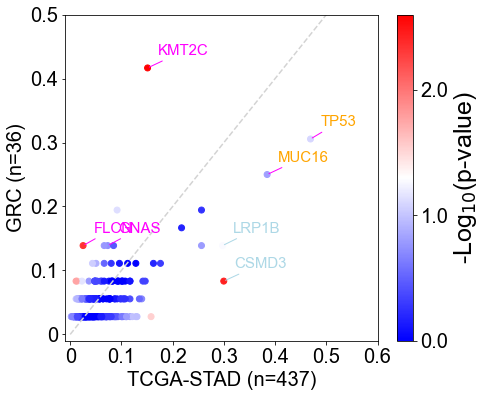

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
rcParams['font.family']='Arial'

plt.figure(figsize=(7,6)) 

plt.scatter(df['TCGA-STAD-Freq'],df['GRC-Freq'],c=-np.log10(df['pval']),cmap='bwr',vmin=0,vmax=2.6)
cbar=plt.colorbar()
cbar.ax.set_ylabel('-Log$_{10}$(p-value)',size=25)
cbar.set_ticks([0.0,1.0,2.0])
cbar.ax.set_yticklabels([0.0,1.0,2.0],rotation=0,fontsize=20)

plt.plot([0,1],[0,1],linestyle='dashed',color='lightgrey')
plt.xlabel('TCGA-STAD (n=437)',size=20)
plt.ylabel('GRC (n=36)',size=20)
common_list=['TP53','MUC16']
for gene in common_list:
    plt.annotate(gene,
                 xy=(df.loc[gene,'TCGA-STAD-Freq'],df.loc[gene,'GRC-Freq']),
                 xytext=(df.loc[gene,'TCGA-STAD-Freq']+0.02,df.loc[gene,'GRC-Freq']+0.02),
                 arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='orange',
                 size=15)

current_study_specific=['KMT2C','GNAS','FLCN']
for gene in current_study_specific:
    plt.annotate(gene,
                 xy=(df.loc[gene,'TCGA-STAD-Freq'],df.loc[gene,'GRC-Freq']),
                 xytext=(df.loc[gene,'TCGA-STAD-Freq']+0.02,df.loc[gene,'GRC-Freq']+0.02),
                 arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='fuchsia',
                 size=15)

TCGA_STAD_specific=['CSMD3','LRP1B']
for gene in TCGA_STAD_specific:
    plt.annotate(gene,
                 xy=(df.loc[gene,'TCGA-STAD-Freq'],df.loc[gene,'GRC-Freq']),
                 xytext=(df.loc[gene,'TCGA-STAD-Freq']+0.02,df.loc[gene,'GRC-Freq']+0.02),
                 arrowprops=dict(color='lightblue',arrowstyle='-'),ha='left',color='lightblue',
                 size=15) 
    
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6],[0,0.1,0.2,0.3,0.4,0.5,0.6],size=20)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5],[0,0.1,0.2,0.3,0.4,0.5],size=20)

plt.xlim(-0.01,0.6)
plt.ylim(-0.01,0.5)

plt.savefig('../Figure1_B.pdf',bbox_inches='tight')
plt.savefig('../Figure1_B.png',bbox_inches='tight')

plt.show()

In [70]:
TCGA_mutation_df=pd.read_csv('../TCGA_subtypes_mutation_frequency.txt',
                             sep='\t',index_col=0)
TCGA_mutation_df

TCGA-CIN-WT  TCGA-CIN-MT  TCGA-EBV-WT  TCGA-EBV-MT  TCGA-GS-WT  \
Gene                                                                     
TP53             71          132           26            1          38   
PCLO            170           33           25            2          41   
KMT2C           188           15           26            1          42   
OR4K15          165           38           25            2          37   
LRP1B           156           47           24            3          40   
...             ...          ...          ...          ...         ...   
HLA-B           201            2           25            2          43   
HDAC4           203            0           27            0          44   
LARP4B          200            3           27            0          44   
PIK3CA          194            9            5           22          42   
CIC             194            9           25            2          38   

        TCGA-GS-MT  TCGA-MSI-WT  TCGA-MSI-MT  
Gene                                          
TP53             6           42           21  
PCLO             3           29           34  
KMT2C            2           34           29  
OR4K15           7           34           29  
LRP1B            4           26           37  
...            ...          ...          ...  
HLA-B            1           42           21  
HDAC4            0           41           22  
LARP4B           0           40           23  
PIK3CA           2           38           25  
CIC              6           37           26  

[94 rows x 8 columns]

In [69]:
df

GRC-MT-count  TCGA-STAD-MT-count  GRC-Freq  TCGA-STAD-Freq      pval
FAM135B             1                  25  0.027778        0.057737  0.710230
WT1                 1                   3  0.027778        0.006928  0.274235
TSHR                1                  10  0.027778        0.023095  0.588695
KMT2D               4                  42  0.111111        0.096998  0.769711
CNTRL               1                   9  0.027778        0.020785  0.553690
...               ...                 ...       ...             ...       ...
ASXL1               1                  13  0.027778        0.030023  1.000000
MUC16               6                 125  0.166667        0.288684  0.126646
ARID1A              2                  52  0.055556        0.120092  0.411152
BCL2                1                   5  0.027778        0.011547  0.382373
NUTM2A              1                   1  0.027778        0.002309  0.147778

[191 rows x 5 columns]

In [85]:
molecular_subtypes_df=pd.read_csv('../Molecular_subtypes.txt',
                                  sep='\t',index_col=0)
molecular_subtypes_df

Molecular Subtype
TCGA barcode                  
TCGA-B7-5816               MSI
TCGA-B7-5818               EBV
TCGA-BR-4183               CIN
TCGA-BR-4184               MSI
TCGA-BR-4187                GS
...                        ...
TCGA-IN-7806               CIN
TCGA-IN-7808               CIN
TCGA-IN-8462               CIN
TCGA-IN-8663               CIN
TCGA-IP-7968               CIN

[295 rows x 1 columns]

In [86]:
set(molecular_subtypes_df[molecular_subtypes_df['Molecular Subtype']=='GS'].index)

{'TCGA-BR-4187',
 'TCGA-BR-4188',
 'TCGA-BR-4279',
 'TCGA-BR-4371',
 'TCGA-BR-6453',
 'TCGA-BR-6457',
 'TCGA-BR-6563',
 'TCGA-BR-6705',
 'TCGA-BR-6710',
 'TCGA-BR-6801',
 'TCGA-BR-6803',
 'TCGA-BR-7722',
 'TCGA-BR-7957',
 'TCGA-BR-8058',
 'TCGA-BR-8362',
 'TCGA-BR-8364',
 'TCGA-BR-8367',
 'TCGA-BR-8370',
 'TCGA-BR-8371',
 'TCGA-BR-8380',
 'TCGA-BR-8384',
 'TCGA-BR-8588',
 'TCGA-BR-8590',
 'TCGA-BR-8592',
 'TCGA-BR-8677',
 'TCGA-BR-8680',
 'TCGA-BR-A44T',
 'TCGA-BR-A453',
 'TCGA-BR-A4IU',
 'TCGA-BR-A4IV',
 'TCGA-BR-A4IZ',
 'TCGA-BR-A4J2',
 'TCGA-BR-A4J5',
 'TCGA-BR-A4J6',
 'TCGA-BR-A4J7',
 'TCGA-BR-A4J9',
 'TCGA-BR-A4QM',
 'TCGA-CD-5798',
 'TCGA-CD-5803',
 'TCGA-CD-5813',
 'TCGA-CD-8531',
 'TCGA-CD-8532',
 'TCGA-CG-4462',
 'TCGA-CG-4474',
 'TCGA-CG-5717',
 'TCGA-CG-5720',
 'TCGA-CG-5727',
 'TCGA-CG-5734',
 'TCGA-D7-6522',
 'TCGA-D7-6524',
 'TCGA-D7-8572',
 'TCGA-D7-8574',
 'TCGA-D7-8579',
 'TCGA-D7-A4Z0',
 'TCGA-FP-8209',
 'TCGA-FP-8210',
 'TCGA-HU-A4G3',
 'TCGA-HU-A4GY'}

In [87]:
#maf=pd.read_csv('/home/chenhaojie/桌面/Xu_lab/TCGAbiolinks/TCGA-STAD/SNVs/SNVs.txt',sep='\t')
all_samples=set()
mutation_dic={}
for i in maf.index:
    gene_name=maf.loc[i,'Hugo_Symbol']
    sample_ID='-'.join(maf.loc[i,'Tumor_Sample_Barcode'].split('-')[:3])
    if sample_ID in set(molecular_subtypes_df[molecular_subtypes_df['Molecular Subtype']=='GS'].index):
        all_samples.add(sample_ID)
        if gene_name in mutation_dic:
            mutation_dic[gene_name].add(sample_ID)
        else:
            mutation_dic[gene_name]=set([sample_ID])

In [85]:
mutation_dic

{'SCNN1D': {'TCGA-CG-5727'},
 'BEND5': {'TCGA-CG-5727'},
 'BARHL2': {'TCGA-BR-8680', 'TCGA-CG-5727'},
 'GFI1': {'TCGA-CG-5727'},
 'COL11A1': {'TCGA-BR-6453',
  'TCGA-BR-8680',
  'TCGA-BR-A4J7',
  'TCGA-CG-5727',
  'TCGA-D7-A4Z0'},
 'NOTCH2': {'TCGA-CG-5727'},
 'HIST2H2AB': {'TCGA-CG-5727'},
 'FLG': {'TCGA-BR-6563',
  'TCGA-BR-8680',
  'TCGA-BR-A4J9',
  'TCGA-CD-5813',
  'TCGA-CG-4474',
  'TCGA-CG-5727',
  'TCGA-CG-5734',
  'TCGA-D7-8572',
  'TCGA-D7-8579'},
 'ADAR': {'TCGA-CG-5727'},
 'DDR2': {'TCGA-CG-5727'},
 'IGKV1D-8': {'TCGA-CG-5727'},
 'IL36RN': {'TCGA-CG-5727'},
 'ZEB2': {'TCGA-CG-5727'},
 'SCN2A': {'TCGA-BR-8680', 'TCGA-CG-5727'},
 'TTN': {'TCGA-BR-4188',
  'TCGA-BR-4371',
  'TCGA-BR-6453',
  'TCGA-BR-8370',
  'TCGA-BR-8588',
  'TCGA-BR-8680',
  'TCGA-BR-A4QM',
  'TCGA-CD-5813',
  'TCGA-CD-8531',
  'TCGA-CG-4474',
  'TCGA-CG-5717',
  'TCGA-CG-5727',
  'TCGA-D7-A4Z0'},
 'DNAH7': {'TCGA-BR-A4J2', 'TCGA-CG-5727', 'TCGA-D7-A4Z0'},
 'ALS2': {'TCGA-CG-5727'},
 'CPNE9': {'TCGA-BR-8680

In [88]:
len(all_samples)

56

In [ ]:
order_df

In [89]:
import scipy.stats
data=[]
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_of_mutation_in_GSC=sum(order_df.loc[i,:]!=0)
        num_of_mutation_in_TCGA_STAD=len(mutation_dic[i]) if i in mutation_dic else 0
        OR,pval=scipy.stats.fisher_exact([[num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD],
                                          [36-num_of_mutation_in_GSC,56-num_of_mutation_in_TCGA_STAD]],
                                         )
        data.append([i,num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD,num_of_mutation_in_GSC/36,
                     num_of_mutation_in_TCGA_STAD/56,OR,pval])
data

[['ETV1',
  2,
  1,
  0.05555555555555555,
  0.017857142857142856,
  3.235294117647059,
  0.5585284280936451],
 ['TSHR',
  1,
  2,
  0.027777777777777776,
  0.03571428571428571,
  0.7714285714285715,
  1.0],
 ['KDM5C',
  1,
  1,
  0.027777777777777776,
  0.017857142857142856,
  1.5714285714285714,
  1.0],
 ['KAT7',
  1,
  1,
  0.027777777777777776,
  0.017857142857142856,
  1.5714285714285714,
  1.0],
 ['NACA',
  1,
  1,
  0.027777777777777776,
  0.017857142857142856,
  1.5714285714285714,
  1.0],
 ['CCNE1', 1, 0, 0.027777777777777776, 0.0, inf, 0.3913043478260879],
 ['KIT',
  1,
  1,
  0.027777777777777776,
  0.017857142857142856,
  1.5714285714285714,
  1.0],
 ['SMARCA4',
  2,
  1,
  0.05555555555555555,
  0.017857142857142856,
  3.235294117647059,
  0.5585284280936451],
 ['ATRX',
  1,
  2,
  0.027777777777777776,
  0.03571428571428571,
  0.7714285714285715,
  1.0],
 ['NFKB2', 1, 0, 0.027777777777777776, 0.0, inf, 0.3913043478260879],
 ['FLT4',
  1,
  4,
  0.027777777777777776,
  0.0

In [ ]:
with open('../GSC_and_TCGA_STAD_GS.txt','w') as outfile:
    outfile.write('\t'.join(['','GRC-MT-count','TCGA-STAD_GS-MT-count','GRC-Freq','TCGA-STAD_GS-Freq','OR','pval'])+'\n')
    for i in data:
        outfile.write('\t'.join([j for j in map(str,i)])+'\n')
        
df=pd.read_csv('../GSC_and_TCGA_STAD_GS.txt',sep='\t',index_col=0)
df        

In [ ]:
for i in df.sort_values(by='pval').index[:20]:
    print('\t'.join([i,str(df.loc[i,'GRC-Freq']*100),str(df.loc[i,'TCGA-STAD-Freq']*100),
                     str(df.loc[i,'OR']),str(df.loc[i,'pval'])]))

In [91]:
sorted(data,key=lambda x:x[-1])

[['CDH1',
  1,
  21,
  0.027777777777777776,
  0.375,
  0.047619047619047616,
  9.422713212436216e-05],
 ['KMT2C',
  15,
  4,
  0.4166666666666667,
  0.07142857142857142,
  9.285714285714286,
  0.00011742428654860505],
 ['MUC4',
  7,
  1,
  0.19444444444444445,
  0.017857142857142856,
  13.275862068965518,
  0.005347289170232684],
 ['GLI1', 4, 0, 0.1111111111111111, 0.0, inf, 0.021081507647213733],
 ['ARHGEF10L', 4, 0, 0.1111111111111111, 0.0, inf, 0.021081507647213733],
 ['NSD1',
  5,
  1,
  0.1388888888888889,
  0.017857142857142856,
  8.870967741935484,
  0.0323381956385676],
 ['FLCN',
  5,
  1,
  0.1388888888888889,
  0.017857142857142856,
  8.870967741935484,
  0.0323381956385676],
 ['CSMD3',
  3,
  14,
  0.08333333333333333,
  0.25,
  0.2727272727272727,
  0.05571512959254694],
 ['CSF1R', 3, 0, 0.08333333333333333, 0.0, inf, 0.056856187290970084],
 ['H3F3A', 3, 0, 0.08333333333333333, 0.0, inf, 0.056856187290970084],
 ['NCOR2', 3, 0, 0.08333333333333333, 0.0, inf, 0.0568561872909

In [93]:
for i in sorted(data,key=lambda x:x[-1])[:20]:
    print('\t'.join([i[0],str(i[3]*100),str(i[4]*100),str(i[5]),str(i[-1])]))

CDH1	2.7777777777777777	37.5	0.047619047619047616	9.422713212436216e-05
KMT2C	41.66666666666667	7.142857142857142	9.285714285714286	0.00011742428654860505
MUC4	19.444444444444446	1.7857142857142856	13.275862068965518	0.005347289170232684
GLI1	11.11111111111111	0.0	inf	0.021081507647213733
ARHGEF10L	11.11111111111111	0.0	inf	0.021081507647213733
NSD1	13.88888888888889	1.7857142857142856	8.870967741935484	0.0323381956385676
FLCN	13.88888888888889	1.7857142857142856	8.870967741935484	0.0323381956385676
CSMD3	8.333333333333332	25.0	0.2727272727272727	0.05571512959254694
CSF1R	8.333333333333332	0.0	inf	0.056856187290970084
H3F3A	8.333333333333332	0.0	inf	0.056856187290970084
NCOR2	8.333333333333332	0.0	inf	0.056856187290970084
CCR4	8.333333333333332	0.0	inf	0.056856187290970084
CUX1	8.333333333333332	0.0	inf	0.056856187290970084
FGFR4	8.333333333333332	0.0	inf	0.056856187290970084
CIC	11.11111111111111	1.7857142857142856	6.875	0.07474352711284836
KMT2D	11.11111111111111	1.7857142857142856	6

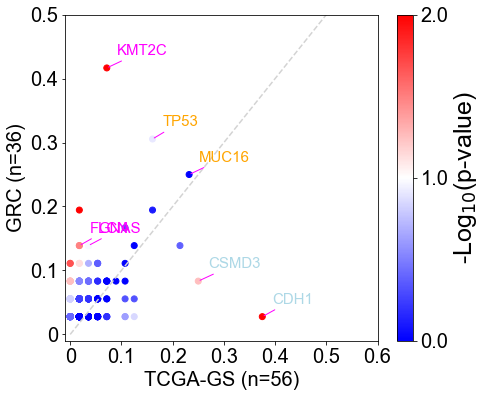

In [100]:
plt.figure(figsize=(7,6)) 

plt.scatter([i[4] for i in data],
            [i[3] for i in data],c=-np.log10([i[-1] for i in data]),cmap='bwr',vmin=0,vmax=2,
            )
cbar=plt.colorbar()
cbar.ax.set_ylabel('-Log$_{10}$(p-value)',size=25)
cbar.set_ticks([0.0,1.0,2.0])
cbar.ax.set_yticklabels([0.0,1.0,2.0],rotation=0,fontsize=20)

plt.plot([0,1],[0,1],linestyle='dashed',color='lightgrey')
plt.xlabel('TCGA-GS (n=56)',size=20)
plt.ylabel('GRC (n=36)',size=20)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6],[0,0.1,0.2,0.3,0.4,0.5,0.6],size=20)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5],[0,0.1,0.2,0.3,0.4,0.5],size=20)

plt.xlim(-0.01,0.6)
plt.ylim(-0.01,0.5)


common_list=['TP53','MUC16']
for i in data:
    if i[0] in common_list:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.02,i[3]+0.02),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='orange',
                     size=15)

current_study_specific=['KMT2C','GNAS','FLCN']
for i in data:
    if i[0] in current_study_specific:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.02,i[3]+0.02),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='fuchsia',
                     size=15)

TCGA_STAD_specific=['CSMD3','CDH1']
for i in data:
    if i[0] in TCGA_STAD_specific:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.02,i[3]+0.02),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='lightblue',
                     size=15)

plt.savefig('../TCGA_GS.pdf',bbox_inches='tight')
plt.savefig('../TCGA_GS.png',bbox_inches='tight')

plt.show()

In [101]:
#maf=pd.read_csv('/home/chenhaojie/桌面/Xu_lab/TCGAbiolinks/TCGA-STAD/SNVs/SNVs.txt',sep='\t')
all_samples=set()
mutation_dic={}
for i in maf.index:
    gene_name=maf.loc[i,'Hugo_Symbol']
    sample_ID='-'.join(maf.loc[i,'Tumor_Sample_Barcode'].split('-')[:3])
    if sample_ID in set(molecular_subtypes_df[molecular_subtypes_df['Molecular Subtype']=='MSI'].index):
        all_samples.add(sample_ID)
        if gene_name in mutation_dic:
            mutation_dic[gene_name].add(sample_ID)
        else:
            mutation_dic[gene_name]=set([sample_ID])

In [115]:
len(all_samples)

64

In [104]:
import scipy.stats

data=[]
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_of_mutation_in_GSC=sum(order_df.loc[i,:]!=0)
        num_of_mutation_in_TCGA_STAD=len(mutation_dic[i]) if i in mutation_dic else 0
        OR,pval=scipy.stats.fisher_exact([[num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD],
                                          [36-num_of_mutation_in_GSC,64-num_of_mutation_in_TCGA_STAD]],
                                         )
        data.append([i,num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD,num_of_mutation_in_GSC/36,
                     num_of_mutation_in_TCGA_STAD/64,OR,pval])
data

[['ETV1', 2, 5, 0.05555555555555555, 0.078125, 0.6941176470588235, 1.0],
 ['TSHR',
  1,
  10,
  0.027777777777777776,
  0.15625,
  0.15428571428571428,
  0.0915624751289655],
 ['KDM5C',
  1,
  18,
  0.027777777777777776,
  0.28125,
  0.07301587301587302,
  0.0012935141479520108],
 ['KAT7', 1, 2, 0.027777777777777776, 0.03125, 0.8857142857142857, 1.0],
 ['NACA',
  1,
  15,
  0.027777777777777776,
  0.234375,
  0.09333333333333334,
  0.008701969256986401],
 ['CCNE1',
  1,
  7,
  0.027777777777777776,
  0.109375,
  0.23265306122448978,
  0.25250542855973285],
 ['KIT',
  1,
  7,
  0.027777777777777776,
  0.109375,
  0.23265306122448978,
  0.25250542855973285],
 ['SMARCA4',
  2,
  23,
  0.05555555555555555,
  0.359375,
  0.10485933503836317,
  0.0006030633362249928],
 ['ATRX',
  1,
  15,
  0.027777777777777776,
  0.234375,
  0.09333333333333334,
  0.008701969256986401],
 ['NFKB2',
  1,
  5,
  0.027777777777777776,
  0.078125,
  0.33714285714285713,
  0.41465002712967175],
 ['FLT4',
  1,
  2

In [105]:
sorted(data,key=lambda x:x[-1])

[['RNF213',
  1,
  42,
  0.027777777777777776,
  0.65625,
  0.014965986394557823,
  1.1062494483664017e-10],
 ['KMT2D',
  4,
  46,
  0.1111111111111111,
  0.71875,
  0.04891304347826087,
  4.407112320643013e-09],
 ['ARID1A',
  7,
  48,
  0.19444444444444445,
  0.75,
  0.08045977011494253,
  8.149770190896483e-08],
 ['CSMD3',
  3,
  38,
  0.08333333333333333,
  0.59375,
  0.06220095693779904,
  2.477275264396228e-07],
 ['TRRAP',
  2,
  34,
  0.05555555555555555,
  0.53125,
  0.05190311418685121,
  7.889363126902668e-07],
 ['ZFHX3',
  1,
  31,
  0.027777777777777776,
  0.484375,
  0.030414746543778803,
  9.466411622061979e-07],
 ['FAT4',
  5,
  40,
  0.1388888888888889,
  0.625,
  0.0967741935483871,
  2.439173017322451e-06],
 ['MUC16', 9, 47, 0.25, 0.734375, 0.12056737588652482, 3.2794933649356404e-06],
 ['SPECC1',
  1,
  28,
  0.027777777777777776,
  0.4375,
  0.036734693877551024,
  5.5476075929807435e-06],
 ['NOTCH1',
  1,
  26,
  0.027777777777777776,
  0.40625,
  0.0417582417582417

In [107]:
for i in sorted(data,key=lambda x:x[-1])[:20]:
    print('\t'.join([i[0],str(i[3]*100),str(i[4]*100),str(i[5]),str(i[-1])]))

RNF213	2.7777777777777777	65.625	0.014965986394557823	1.1062494483664017e-10
KMT2D	11.11111111111111	71.875	0.04891304347826087	4.407112320643013e-09
ARID1A	19.444444444444446	75.0	0.08045977011494253	8.149770190896483e-08
CSMD3	8.333333333333332	59.375	0.06220095693779904	2.477275264396228e-07
TRRAP	5.555555555555555	53.125	0.05190311418685121	7.889363126902668e-07
ZFHX3	2.7777777777777777	48.4375	0.030414746543778803	9.466411622061979e-07
FAT4	13.88888888888889	62.5	0.0967741935483871	2.439173017322451e-06
MUC16	25.0	73.4375	0.12056737588652482	3.2794933649356404e-06
SPECC1	2.7777777777777777	43.75	0.036734693877551024	5.5476075929807435e-06
NOTCH1	2.7777777777777777	40.625	0.041758241758241756	1.4337684183841797e-05
FLNA	2.7777777777777777	40.625	0.041758241758241756	1.4337684183841797e-05
UBR5	8.333333333333332	50.0	0.09090909090909091	2.089601187412882e-05
CREBBP	5.555555555555555	43.75	0.07563025210084033	3.159855350428065e-05
LARP4B	2.7777777777777777	37.5	0.047619047619047616	6

In [125]:
sorted(data,key=lambda x:x[-2],reverse=True)

[['MUC16', 6, 37, 0.16666666666666666, 0.578125, 6.0425909358661754e-05],
 ['FAT4', 2, 30, 0.05555555555555555, 0.46875, 1.210523759860304e-05],
 ['LRP1B', 3, 28, 0.08333333333333333, 0.4375, 0.00023092743556639986],
 ['FAT3', 2, 26, 0.05555555555555555, 0.40625, 0.00013672584288338887],
 ['RNF213', 0, 26, 0.0, 0.40625, 1.7073576301853192e-06],
 ['TRRAP', 1, 24, 0.027777777777777776, 0.375, 6.500942720633613e-05],
 ['KMT2D', 4, 22, 0.1111111111111111, 0.34375, 0.016414974776937014],
 ['CSMD3', 2, 22, 0.05555555555555555, 0.34375, 0.0011856826018631656],
 ['KMT2C', 13, 21, 0.3611111111111111, 0.328125, 0.8268191992848546],
 ['PIK3CA', 2, 21, 0.05555555555555555, 0.328125, 0.0023663952487750356],
 ['KMT2A', 1, 20, 0.027777777777777776, 0.3125, 0.0006006566463924605],
 ['ZFHX3', 0, 19, 0.0, 0.296875, 9.505695486372926e-05],
 ['ERBB3', 1, 18, 0.027777777777777776, 0.28125, 0.0012935141479520108],
 ['ARID1A', 2, 18, 0.05555555555555555, 0.28125, 0.008153605620341146],
 ['MTOR', 0, 17, 0.0, 

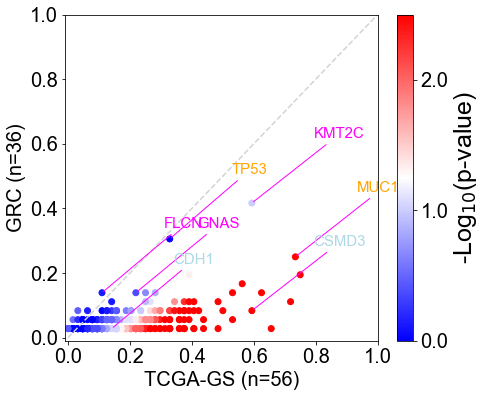

In [114]:
plt.figure(figsize=(7,6)) 

plt.scatter([i[4] for i in data],
            [i[3] for i in data],c=-np.log10([i[-1] for i in data]),cmap='bwr',vmin=0,vmax=2.5,
            )
cbar=plt.colorbar()
cbar.ax.set_ylabel('-Log$_{10}$(p-value)',size=25)
cbar.set_ticks([0.0,1.0,2.0])
cbar.ax.set_yticklabels([0.0,1.0,2.0],rotation=0,fontsize=20)

plt.plot([0,1],[0,1],linestyle='dashed',color='lightgrey')
plt.xlabel('TCGA-GS (n=56)',size=20)
plt.ylabel('GRC (n=36)',size=20)
plt.xticks([0,0.2,0.4,0.6,0.8,1.0],size=20)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],size=20)

plt.xlim(-0.01,1)
plt.ylim(-0.01,1)


common_list=['TP53','MUC16']
for i in data:
    if i[0] in common_list:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.2,i[3]+0.2),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='orange',
                     size=15)

current_study_specific=['KMT2C','GNAS','FLCN']
for i in data:
    if i[0] in current_study_specific:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.2,i[3]+0.2),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='fuchsia',
                     size=15)

TCGA_STAD_specific=['CSMD3','CDH1']
for i in data:
    if i[0] in TCGA_STAD_specific:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.2,i[3]+0.2),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='lightblue',
                     size=15)


plt.savefig('../TCGA_MSI.pdf',bbox_inches='tight')
plt.savefig('../TCGA_MSI.png',bbox_inches='tight')


plt.show()

In [129]:
set(molecular_subtypes_df['Molecular Subtype'])

{'CIN', 'EBV', 'GS', 'MSI'}

In [116]:
#maf=pd.read_csv('/home/chenhaojie/桌面/Xu_lab/TCGAbiolinks/TCGA-STAD/SNVs/SNVs.txt',sep='\t')
all_samples=set()
mutation_dic={}
for i in maf.index:
    gene_name=maf.loc[i,'Hugo_Symbol']
    sample_ID='-'.join(maf.loc[i,'Tumor_Sample_Barcode'].split('-')[:3])
    if sample_ID in set(molecular_subtypes_df[molecular_subtypes_df['Molecular Subtype']=='EBV'].index):
        all_samples.add(sample_ID)
        if gene_name in mutation_dic:
            mutation_dic[gene_name].add(sample_ID)
        else:
            mutation_dic[gene_name]=set([sample_ID])

In [117]:
len(all_samples)

26

In [119]:
import scipy.stats

data=[]
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_of_mutation_in_GSC=sum(order_df.loc[i,:]!=0)
        num_of_mutation_in_TCGA_STAD=len(mutation_dic[i]) if i in mutation_dic else 0
        OR,pval=scipy.stats.fisher_exact([[num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD],
                                          [36-num_of_mutation_in_GSC,26-num_of_mutation_in_TCGA_STAD]],
                                         )
        data.append([i,num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD,num_of_mutation_in_GSC/36,
                     num_of_mutation_in_TCGA_STAD/26,OR,pval])
data

[['ETV1', 2, 0, 0.05555555555555555, 0.0, inf, 0.5050237969328398],
 ['TSHR', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['KDM5C', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['KAT7', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['NACA', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['CCNE1', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['KIT', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['SMARCA4', 2, 0, 0.05555555555555555, 0.0, inf, 0.5050237969328398],
 ['ATRX',
  1,
  1,
  0.027777777777777776,
  0.038461538461538464,
  0.7142857142857143,
  1.0],
 ['NFKB2', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['FLT4', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['COL2A1', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['SLC34A2', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['PRRX1', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['BARD1', 1, 0, 0.027777777777777776, 0.0, inf, 1.0],
 ['BCL11B',
  2,
  1,
  0.05555555555555555,
  0.038461538461538464,
  1.4705882352941178,
  1.0],
 ['PIK3

In [169]:
sorted(data,key=lambda x:x[-1])

[['PIK3CA', 2, 13, 0.05555555555555555, 0.5, 0.00013407109333938536],
 ['ARID1A',
  2,
  8,
  0.05555555555555555,
  0.3076923076923077,
  0.012613737822150492],
 ['KMT2C',
  13,
  2,
  0.3611111111111111,
  0.07692307692307693,
  0.014897479817770029],
 ['TP53', 8, 1, 0.2222222222222222, 0.038461538461538464, 0.06677773273833999],
 ['RNF213', 0, 2, 0.0, 0.07692307692307693, 0.1718667371760977],
 ['RANBP2', 0, 2, 0.0, 0.07692307692307693, 0.1718667371760977],
 ['FAT4', 2, 4, 0.05555555555555555, 0.15384615384615385, 0.22716081763893192],
 ['MUC16', 6, 8, 0.16666666666666666, 0.3076923076923077, 0.2279379442006108],
 ['GLI1', 3, 0, 0.08333333333333333, 0.0, 0.25753569539925913],
 ['H3F3A', 3, 0, 0.08333333333333333, 0.0, 0.25753569539925913],
 ['NBEA', 1, 3, 0.027777777777777776, 0.11538461538461539, 0.3001819501832943],
 ['MUC4', 5, 1, 0.1388888888888889, 0.038461538461538464, 0.386605611342808],
 ['GNAS', 5, 1, 0.1388888888888889, 0.038461538461538464, 0.386605611342808],
 ['KMT2D', 4

In [120]:
for i in sorted(data,key=lambda x:x[-1])[:20]:
    print('\t'.join([i[0],str(i[3]*100),str(i[4]*100),str(i[5]),str(i[-1])]))

PIK3CA	11.11111111111111	69.23076923076923	0.05555555555555555	2.9335876850715047e-06
TP53	30.555555555555557	0.0	inf	0.001573478336599458
KMT2C	41.66666666666667	7.6923076923076925	8.571428571428571	0.003643479134456435
ARID1A	19.444444444444446	53.84615384615385	0.20689655172413793	0.006758912411380569
FLCN	13.88888888888889	0.0	inf	0.0684240245946454
NBEA	5.555555555555555	19.230769230769234	0.24705882352941178	0.1194298893172309
MUC4	19.444444444444446	3.8461538461538463	6.0344827586206895	0.12350660279261408
CIC	11.11111111111111	0.0	inf	0.13239340677069797
GLI1	11.11111111111111	0.0	inf	0.13239340677069797
BRCA2	11.11111111111111	0.0	inf	0.13239340677069797
BIRC6	5.555555555555555	15.384615384615385	0.3235294117647059	0.22716081763893192
MAP3K1	8.333333333333332	0.0	inf	0.25753569539925913
CSF1R	8.333333333333332	0.0	inf	0.25753569539925913
H3F3A	8.333333333333332	0.0	inf	0.25753569539925913
NCOR2	8.333333333333332	0.0	inf	0.25753569539925913
CCR4	8.333333333333332	0.0	inf	0.2575

In [141]:
sorted(data,key=lambda x:x[4],reverse=True)

[['PIK3CA', 2, 13, 0.05555555555555555, 0.5, 0.00013407109333938536],
 ['MUC16', 6, 8, 0.16666666666666666, 0.3076923076923077, 0.2279379442006108],
 ['ARID1A',
  2,
  8,
  0.05555555555555555,
  0.3076923076923077,
  0.012613737822150492],
 ['FAT4', 2, 4, 0.05555555555555555, 0.15384615384615385, 0.22716081763893192],
 ['SMAD4', 2, 3, 0.05555555555555555, 0.11538461538461539, 0.6414002035542552],
 ['LRP1B', 3, 3, 0.08333333333333333, 0.11538461538461539, 0.6885843872971188],
 ['NBEA', 1, 3, 0.027777777777777776, 0.11538461538461539, 0.3001819501832943],
 ['CTNND2',
  1,
  2,
  0.027777777777777776,
  0.07692307692307693,
  0.5668958223162349],
 ['ZNF331',
  1,
  2,
  0.027777777777777776,
  0.07692307692307693,
  0.5668958223162349],
 ['ERBB4',
  1,
  2,
  0.027777777777777776,
  0.07692307692307693,
  0.5668958223162349],
 ['RNF213', 0, 2, 0.0, 0.07692307692307693, 0.1718667371760977],
 ['MYH11',
  1,
  2,
  0.027777777777777776,
  0.07692307692307693,
  0.5668958223162349],
 ['RANBP

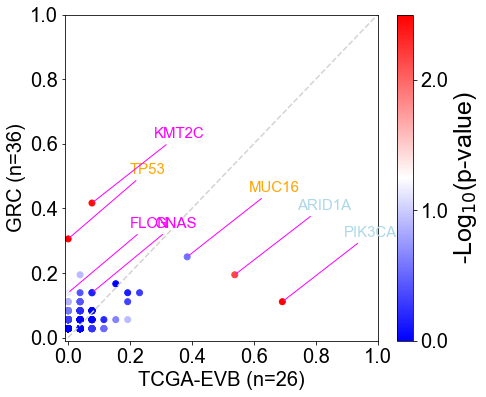

In [122]:


plt.figure(figsize=(7,6)) 

plt.scatter([i[4] for i in data],
            [i[3] for i in data],c=-np.log10([i[-1] for i in data]),cmap='bwr',vmin=0,vmax=2.5,
            )
cbar=plt.colorbar()
cbar.ax.set_ylabel('-Log$_{10}$(p-value)',size=25)
cbar.set_ticks([0.0,1.0,2.0])
cbar.ax.set_yticklabels([0.0,1.0,2.0],rotation=0,fontsize=20)

plt.plot([0,1],[0,1],linestyle='dashed',color='lightgrey')
plt.xlabel('TCGA-EVB (n=26)',size=20)
plt.ylabel('GRC (n=36)',size=20)
plt.xticks([0,0.2,0.4,0.6,0.8,1.0],size=20)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],size=20)

plt.xlim(-0.01,1)
plt.ylim(-0.01,1)


common_list=['TP53','MUC16']
for i in data:
    if i[0] in common_list:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.2,i[3]+0.2),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='orange',
                     size=15)

current_study_specific=['KMT2C','GNAS','FLCN']
for i in data:
    if i[0] in current_study_specific:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.2,i[3]+0.2),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='fuchsia',
                     size=15)

TCGA_STAD_specific=['PIK3CA','ARID1A']
for i in data:
    if i[0] in TCGA_STAD_specific:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.2,i[3]+0.2),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='lightblue',
                     size=15)


plt.savefig('../TCGA_EBV.pdf',bbox_inches='tight')
plt.savefig('../TCGA_EBV.png',bbox_inches='tight')


plt.show()

In [123]:
#maf=pd.read_csv('/home/chenhaojie/桌面/Xu_lab/TCGAbiolinks/TCGA-STAD/SNVs/SNVs.txt',sep='\t')
all_samples=set()
mutation_dic={}
for i in maf.index:
    gene_name=maf.loc[i,'Hugo_Symbol']
    sample_ID='-'.join(maf.loc[i,'Tumor_Sample_Barcode'].split('-')[:3])
    if sample_ID in set(molecular_subtypes_df[molecular_subtypes_df['Molecular Subtype']=='CIN'].index):
        all_samples.add(sample_ID)
        if gene_name in mutation_dic:
            mutation_dic[gene_name].add(sample_ID)
        else:
            mutation_dic[gene_name]=set([sample_ID])

In [124]:
len(all_samples)

145

In [125]:
import scipy.stats

data=[]
for i in order_df.index:
    if i in set(cosmic_df['Gene Symbol']):
        num_of_mutation_in_GSC=sum(order_df.loc[i,:]!=0)
        num_of_mutation_in_TCGA_STAD=len(mutation_dic[i]) if i in mutation_dic else 0
        OR,pval=scipy.stats.fisher_exact([[num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD],
                                          [36-num_of_mutation_in_GSC,145-num_of_mutation_in_TCGA_STAD]],
                                         )
        data.append([i,num_of_mutation_in_GSC,num_of_mutation_in_TCGA_STAD,num_of_mutation_in_GSC/36,
                     num_of_mutation_in_TCGA_STAD/145,OR,pval])
data

[['ETV1',
  2,
  4,
  0.05555555555555555,
  0.027586206896551724,
  2.073529411764706,
  0.3418665882656936],
 ['TSHR',
  1,
  1,
  0.027777777777777776,
  0.006896551724137931,
  4.114285714285714,
  0.35911602209949745],
 ['KDM5C',
  1,
  4,
  0.027777777777777776,
  0.027586206896551724,
  1.0071428571428571,
  1.0],
 ['KAT7',
  1,
  1,
  0.027777777777777776,
  0.006896551724137931,
  4.114285714285714,
  0.35911602209949745],
 ['NACA',
  1,
  3,
  0.027777777777777776,
  0.020689655172413793,
  1.3523809523809525,
  1.0],
 ['CCNE1',
  1,
  1,
  0.027777777777777776,
  0.006896551724137931,
  4.114285714285714,
  0.35911602209949745],
 ['KIT',
  1,
  4,
  0.027777777777777776,
  0.027586206896551724,
  1.0071428571428571,
  1.0],
 ['SMARCA4',
  2,
  2,
  0.05555555555555555,
  0.013793103448275862,
  4.205882352941177,
  0.1773625971948894],
 ['ATRX',
  1,
  4,
  0.027777777777777776,
  0.027586206896551724,
  1.0071428571428571,
  1.0],
 ['NFKB2',
  1,
  2,
  0.027777777777777776

In [126]:
for i in sorted(data,key=lambda x:x[-1])[:20]:
    print('\t'.join([i[0],str(i[3]*100),str(i[4]*100),str(i[5]),str(i[-1])]))

KMT2C	41.66666666666667	4.827586206896552	14.081632653061224	1.2520885915605786e-07
TP53	30.555555555555557	67.58620689655173	0.2110204081632653	9.661058693575035e-05
FLCN	13.88888888888889	0.6896551724137931	23.225806451612904	0.0012604572595288732
GLI1	11.11111111111111	0.0	inf	0.0013618814008339885
CIC	11.11111111111111	0.6896551724137931	18.0	0.005824543618255924
ARHGEF10L	11.11111111111111	0.6896551724137931	18.0	0.005824543618255924
MAP3K1	8.333333333333332	0.0	inf	0.007345905737832159
CCR4	8.333333333333332	0.0	inf	0.007345905737832159
FGFR4	8.333333333333332	0.0	inf	0.007345905737832159
MUC4	19.444444444444446	4.827586206896552	4.758620689655173	0.008400649141353005
ATR	13.88888888888889	2.7586206896551726	5.685483870967742	0.01644714715307179
EPHA7	8.333333333333332	0.6896551724137931	13.090909090909092	0.025297978748825653
GNAS	13.88888888888889	3.4482758620689653	4.516129032258065	0.028077315999992455
NSD1	13.88888888888889	3.4482758620689653	4.516129032258065	0.028077315999

In [156]:
sorted(data,key=lambda x:x[4],reverse=True)

[['TP53', 8, 71, 0.2222222222222222, 0.4896551724137931, 0.004537292457199773],
 ['LRP1B',
  3,
  31,
  0.08333333333333333,
  0.21379310344827587,
  0.09472912583161913],
 ['MUC16',
  6,
  31,
  0.16666666666666666,
  0.21379310344827587,
  0.6475524681773644],
 ['CSMD3',
  2,
  23,
  0.05555555555555555,
  0.15862068965517243,
  0.17429198226155485],
 ['FAT4', 2, 16, 0.05555555555555555, 0.1103448275862069, 0.5336541940508496],
 ['FAT3', 2, 15, 0.05555555555555555, 0.10344827586206896, 0.5309082913661647],
 ['ERBB4',
  1,
  12,
  0.027777777777777776,
  0.08275862068965517,
  0.4696859826345916],
 ['NBEA',
  1,
  11,
  0.027777777777777776,
  0.07586206896551724,
  0.4645802635970528],
 ['CTNND2',
  1,
  10,
  0.027777777777777776,
  0.06896551724137931,
  0.6957842406802306],
 ['PTPRT', 2, 10, 0.05555555555555555, 0.06896551724137931, 1.0],
 ['PTPRD',
  1,
  10,
  0.027777777777777776,
  0.06896551724137931,
  0.6957842406802306],
 ['PREX2',
  1,
  9,
  0.027777777777777776,
  0.062

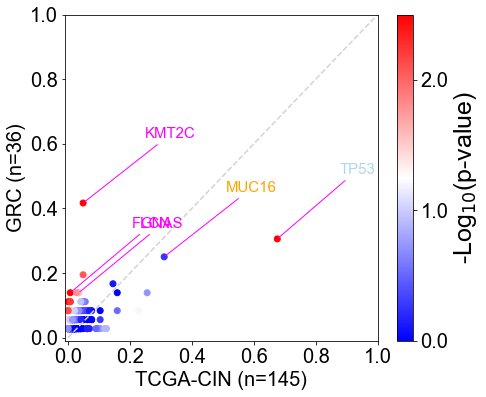

In [128]:
plt.figure(figsize=(7,6)) 

plt.scatter([i[4] for i in data],
            [i[3] for i in data],c=-np.log10([i[-1] for i in data]),cmap='bwr',vmin=0,vmax=2.5,
            )
cbar=plt.colorbar()
cbar.ax.set_ylabel('-Log$_{10}$(p-value)',size=25)
cbar.set_ticks([0.0,1.0,2.0])
cbar.ax.set_yticklabels([0.0,1.0,2.0],rotation=0,fontsize=20)

plt.plot([0,1],[0,1],linestyle='dashed',color='lightgrey')
plt.xlabel('TCGA-CIN (n=145)',size=20)
plt.ylabel('GRC (n=36)',size=20)
plt.xticks([0,0.2,0.4,0.6,0.8,1.0],size=20)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],size=20)

plt.xlim(-0.01,1)
plt.ylim(-0.01,1)


common_list=['MUC16']
for i in data:
    if i[0] in common_list:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.2,i[3]+0.2),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='orange',
                     size=15)

current_study_specific=['KMT2C','GNAS','FLCN']
for i in data:
    if i[0] in current_study_specific:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.2,i[3]+0.2),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='fuchsia',
                     size=15)

TCGA_STAD_specific=['TP53']
for i in data:
    if i[0] in TCGA_STAD_specific:
        plt.annotate(i[0],
                     xy=(i[4],i[3]),
                     xytext=(i[4]+0.2,i[3]+0.2),
                     arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='lightblue',
                     size=15)




plt.savefig('../TCGA_CIN.pdf',bbox_inches='tight')
plt.savefig('../TCGA_CIN.png',bbox_inches='tight')



plt.show()

In [ ]:
common_list=['TP53','MUC16']
for gene in common_list:
    plt.annotate(gene,
                 xy=(df.loc[gene,'TCGA-STAD-Freq'],df.loc[gene,'GRC-Freq']),
                 xytext=(df.loc[gene,'TCGA-STAD-Freq']+0.02,df.loc[gene,'GRC-Freq']+0.02),
                 arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='orange',
                 size=15)

current_study_specific=['KMT2C','GNAS']
for gene in current_study_specific:
    plt.annotate(gene,
                 xy=(df.loc[gene,'TCGA-STAD-Freq'],df.loc[gene,'GRC-Freq']),
                 xytext=(df.loc[gene,'TCGA-STAD-Freq']+0.02,df.loc[gene,'GRC-Freq']+0.02),
                 arrowprops=dict(color='fuchsia',arrowstyle='-'),ha='left',color='fuchsia',
                 size=15)

TCGA_STAD_specific=['CSMD3','LRP1B']
for gene in TCGA_STAD_specific:
    plt.annotate(gene,
                 xy=(df.loc[gene,'TCGA-STAD-Freq'],df.loc[gene,'GRC-Freq']),
                 xytext=(df.loc[gene,'TCGA-STAD-Freq']+0.02,df.loc[gene,'GRC-Freq']+0.02),
                 arrowprops=dict(color='lightblue',arrowstyle='-'),ha='left',color='lightblue',
                 size=15) 
    


In [67]:
df.sort_values(by='TCGA-STAD-Freq',ascending=False)

GRC-MT-count  TCGA-STAD-MT-count  GRC-Freq  TCGA-STAD-Freq      pval
TP53                8                 148  0.222222        0.341801  0.196702
MUC16               6                 125  0.166667        0.288684  0.126646
LRP1B               3                 105  0.083333        0.242494  0.037035
CSMD3               2                  85  0.055556        0.196305  0.042275
FAT4                2                  80  0.055556        0.184758  0.064548
...               ...                 ...       ...             ...       ...
SIX1                1                   1  0.027778        0.002309  0.147778
FGFR1OP             1                   1  0.027778        0.002309  0.147778
RAD51B              1                   1  0.027778        0.002309  0.147778
KDSR                0                   1  0.000000        0.002309  1.000000
NUTM2A              1                   1  0.027778        0.002309  0.147778

[191 rows x 5 columns]

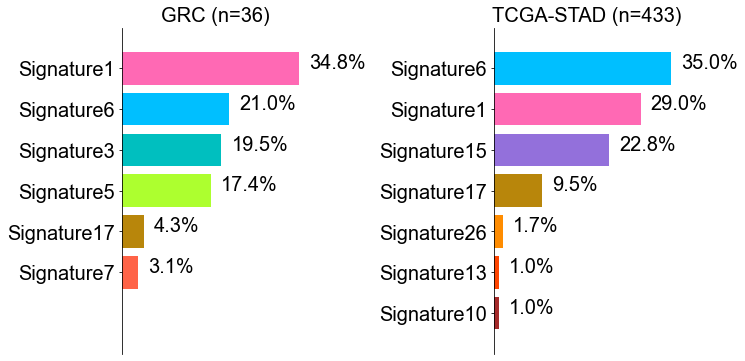

In [31]:
plt.figure(figsize=(10,6))
ax=plt.subplot(121)
GSC=pd.read_csv('../MSs_in_GSC.txt',sep='\t')
TCGA_STAD=pd.read_csv('../MSs_in_TCGA_STAD.txt',sep='\t')
for i in GSC.index:
    plt.barh(i,GSC.loc[i,'%'],color=GSC.loc[i,'color'])
    plt.text(GSC.loc[i,'%']+2,i,str(GSC.loc[i,'%'])+'%',size=20)
plt.yticks(GSC.index,GSC['signature'],size=20)    
plt.ylim(7,-1)
plt.xticks([],[])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title('GRC (n=36)',size=20)

ax=plt.subplot(122)
for i in TCGA_STAD.index:
    plt.barh(i,TCGA_STAD.loc[i,'%'],color=TCGA_STAD.loc[i,'color'])
    plt.text(TCGA_STAD.loc[i,'%']+2,i,str(TCGA_STAD.loc[i,'%'])+'%',size=20)
plt.yticks(TCGA_STAD.index,TCGA_STAD['signature'],size=20)    
plt.ylim(7,-1)
plt.xticks([],[])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title('TCGA-STAD (n=433)',size=20)

plt.subplots_adjust(wspace=1)

plt.savefig('../Figure1_C.pdf',bbox_inches='tight')
plt.savefig('../Figure1_C.png',bbox_inches='tight')

plt.show()

In [197]:
import glob
import re

data_paths=glob.glob('../DNAcopy/*.data')
seg_rows_paths=glob.glob('../DNAcopy/*.segRows')
output_paths=glob.glob('../DNAcopy/*.output')
vcf_paths=glob.glob('../Platypus/*.vcf')

dic={}
for vcf_path in vcf_paths:
    name=vcf_path.split('/')[-1].split('.')[0]
    Type=name[0]
    ID=re.search(r'\d+',name).group()
    if ID in dic:
        dic[ID][Type]=vcf_path
    else:
        dic[ID]={}
        dic[ID][Type]=vcf_path

for data_path in data_paths:
    ID=re.search(r'\d+',data_path.split('/')[-1]).group()
    if ID in dic:
        dic[ID]['data']=data_path
    else:
        dic[ID]={}
        dic[ID]['data']=data_path
        
for seg_rows_path in seg_rows_paths:
    ID=re.search(r'\d+',seg_rows_path.split('/')[-1]).group()
    if ID in dic:
        dic[ID]['seg_rows']=seg_rows_path
    else:
        dic[ID]={}
        dic[ID]['seg_rows']=seg_rows_path        
        
for output_path in output_paths:
    ID=re.search(r'\d+',output_path.split('/')[-1]).group()
    if ID in dic:
        dic[ID]['output']=output_path
    else:
        dic[ID]={}
        dic[ID]['output']=output_path

dic

{'7': {'data': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/7.data',
  'seg_rows': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/7.segRows',
  'output': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/7.output'},
 '26': {'data': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/26.data',
  'seg_rows': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/26.segRows',
  'output': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/26.output'},
 '3': {'data': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/3.data',
  'seg_rows': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/3.segRows',
  'output': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/3.output'},
 '36': {'data': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/36.data',
  'seg_rows': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/36.segRows',
  'output': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/36.output'},
 '15': {'data': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/15.data',
  'seg_rows': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/15.segRows',
  'output': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/15.output'},
 '11': {'data': '/home/chenhaojie/桌面/Xu_lab/DNAcopy/11.data',
  'seg_rows': '/

FRS2,MDM2,MDM1,YEATS4 2018799102.5 1.0992
FRS2,MDM2,MDM1,YEATS4, 2018744955.0 2.1206
FRS2,MDM2,MDM1,YEATS4, 2018376685.5 1.6809
[[124615563.5, -3, '1'], [370704443.0, -4, '2'], [591129699.5, -3, '3'], [785603748.5, -4, '4'], [971469753.5, -3, '5'], [1147288310.5, -4, '6'], [1312275895.5, -3, '7'], [1464928231.5, -4, '8'], [1608603497.0, -3, '9'], [1746884933.0, -4, '10'], [1882058871.5, -3, '11'], [2016392766.5, -4, '12'], [2140844020.5, -3, '13'], [2252031326.5, -4, '14'], [2356931821.5, -3, '15'], [2453309683.0, -4, '16'], [2539022639.5, -3, '17'], [2618619243.0, -4, '18'], [2687177112.0, -3, '19'], [2748212049.0, -4, '20'], [2803733915.5, -3, '21'], [2853394811.0, -4, '22']]


/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


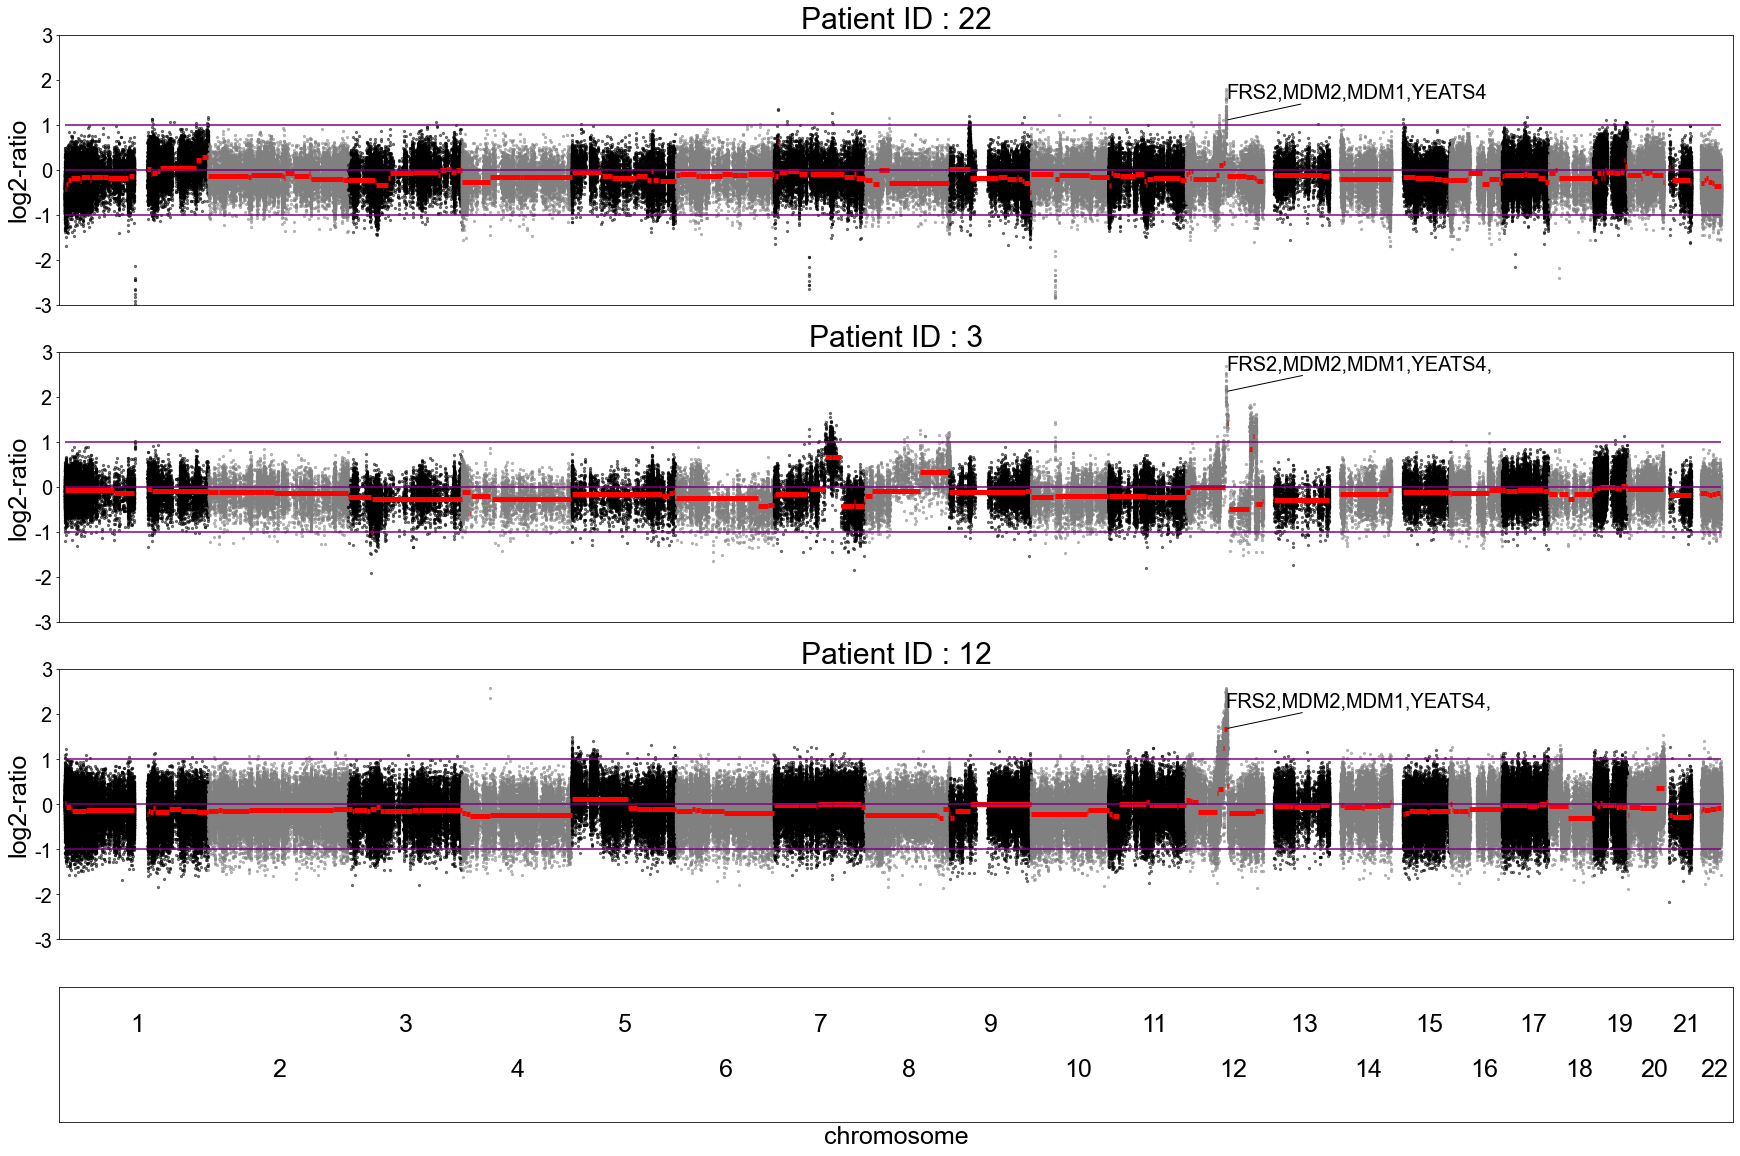

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams

rcParams['font.family']='Arial'

def plot_track_with_genes(chrom_list,dic,samples_and_locations,x_offset=100000,y_offset=0.5):
    fig=plt.figure(figsize=(30,20))
    gs=mpl.gridspec.GridSpec(4,1,height_ratios=[2,2,2,1])
    num=0
    for ID,chrom0,start0,end0,gene_name0,seg_mean0 in samples_and_locations:
        ax=plt.subplot(gs[num,0])
        chromosome_position=[]
        data_path=dic[ID]['data']
        seg_rows_path=dic[ID]['seg_rows'] 
        output_path=dic[ID]['output']

        data=pd.read_csv(data_path,sep='\t')
        seg_rows=pd.read_csv(seg_rows_path,sep='\t')
        output=pd.read_csv(output_path,sep='\t')

        x0=0
        for index,chrom in enumerate(chrom_list):
            color='black' if index%2==0 else 'grey'
            y=data[data['chrom']==chrom].iloc[:,-1]
            x=data[data['chrom']==chrom].iloc[:,-2]+x0
            plt.scatter(x,y,s=5,c=color,alpha=0.5)
            for i in output[output['chrom']==chrom].index:
                start,end,seg_mean=output.loc[i,['loc.start','loc.end','seg.mean']]
                plt.hlines(y=seg_mean,xmin=start+x0,xmax=end+x0,colors='red',lw=5)
            if chrom==chrom0:
                print(gene_name0,x0+(start0+end0)/2,seg_mean0)
                plt.annotate(gene_name0,
                             xy=(x0+(start0+end0)/2,seg_mean0),
                             xytext=(x0+(start0+end0)/2+x_offset,seg_mean0+y_offset),
                             arrowprops=dict(facecolor='black',arrowstyle='-'),size=20)

            m=(x0+x.iloc[-1])/2
            h=-3 if index%2==0 else -4
            chromosome_position.append([m,h,chrom[3:]])
            x0=x.iloc[-1]

        plt.hlines(y=0,xmin=0,xmax=x0,colors='purple')
        plt.hlines(y=1,xmin=0,xmax=x0,colors='purple')
        plt.hlines(y=-1,xmin=0,xmax=x0,colors='purple')
        plt.ylim(-3,3)
        plt.xlim(-0.01*10**9,2.9*10**9)
        plt.yticks([-3,-2,-1,0,1,2,3],[-3,-2,-1,0,1,2,3],size=20)
        plt.xticks([],[])
        plt.ylabel('log2-ratio',size=25)
        plt.title('Patient ID : '+ID,size=30)
        num+=1
    r=0.01*10**9+2.9*10**9
    print(chromosome_position)
    ax=plt.subplot(gs[num,0])
    for i,j,k in chromosome_position:
        plt.text(i/r,j,k,size=25)
    plt.ylim(-5,-2)
    plt.xlabel('chromosome',size=25)
    plt.xticks([],[])
    plt.yticks([],[])

    plt.savefig('../Supplementary_Figure3_C.png',
                bbox_inches='tight',quality=95)
    plt.savefig('../Supplementary_Figure3_C.pdf',
                bbox_inches='tight',quality=95)    

    plt.show()

chrom_list=['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10',
            'chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19',
            'chr20','chr21','chr22']
    
samples_and_locations=[['22','chr12',68646339,70149302,'FRS2,MDM2,MDM1,YEATS4',1.0992],
                       ['3','chr12',68708757,70273159,'FRS2,MDM2,MDM1,YEATS4,',2.1206],
                       ['12','chr12',66620464,71158451,'FRS2,MDM2,MDM1,YEATS4,',1.6809],]

plot_track_with_genes(chrom_list,dic,samples_and_locations)


In [210]:
mutation_landscape_df=pd.read_csv('/home/chenhaojie/桌面/Xu_lab/Figures_plan/Figure1/mutation_landscape.txt',sep='\t',index_col=0)
mutation_landscape_df

30  8  12  51  54  36  23  9  6  10  ...  26  20  18  49  13  27  \
NEU3          0  0   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   
ETV1          0  0   0   1   0   0   0  0  0   0  ...   0   0   0   1   0   0   
PRAMEF19      0  0   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   
SCN10A        0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
CAMSAP3       0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
...          .. ..  ..  ..  ..  ..  .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..   
KLHDC7B       0  0   0   1   0   0   0  0  0   0  ...   0   0   0   0   0   0   
PALM2-AKAP2   0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
ADAM7         0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
RYR1          0  0   0   0   0   0   0  0  0   0  ...   1   0   1   0   0   0   
SOGA3         0  0   1   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   

             48  22  11  52  
NEU3          0   0   0   0  
ETV1          0   0   0   0  
PRAMEF19      0   0   1   0  
SCN10A        0   0   0   0  
CAMSAP3       0   0   0   0  
...          ..  ..  ..  ..  
KLHDC7B       0   0   0   0  
PALM2-AKAP2   0   0   0   0  
ADAM7         0   0   0   0  
RYR1          0   0   0   0  
SOGA3         0   0   0   0  

[5608 rows x 36 columns]

In [39]:
mutation_landscape_df.columns[mutation_landscape_df.loc['ARID1A',:]!=0]

Index(['8', '6', '7', '1', '4', '18', '49'], dtype='object')

In [40]:
mutation_landscape_df.columns[mutation_landscape_df.loc['TP53',:]!=0]

Index(['8', '51', '10', '16', '24', '2', '4', '5', '14', '21', '33'], dtype='object')

In [199]:
a=['8', '6', '7', '1', '4', '18', '49']
d=['8', '51', '10', '16', '24', '2', '4', '5', '14', '21', '33']

In [200]:
c=['28',
 '49',
 '6',
 '18',
 '34',
 '26',
 '20',
 '23',
 '1',
 '48',
 '7',
 '38',
 '27',
 '17',
 '2',
 '36',
 '13',
 '9',
 '4',
 '5',
 '8',
 '51',
 '16',
 '22',
 '33',
 '10',
 '24',
 '30',
 '3',
 '11',
 '12',
 '15',
 '14',
 '21',
 '54',
 '52']
ARID1A=[]
for i in c:
    if i in a:
        ARID1A.append([1])
    else:
        ARID1A.append([0])
        
TP53=[]
for i in c:
    if i in d:
        TP53.append([1])
    else:
        TP53.append([0])

/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


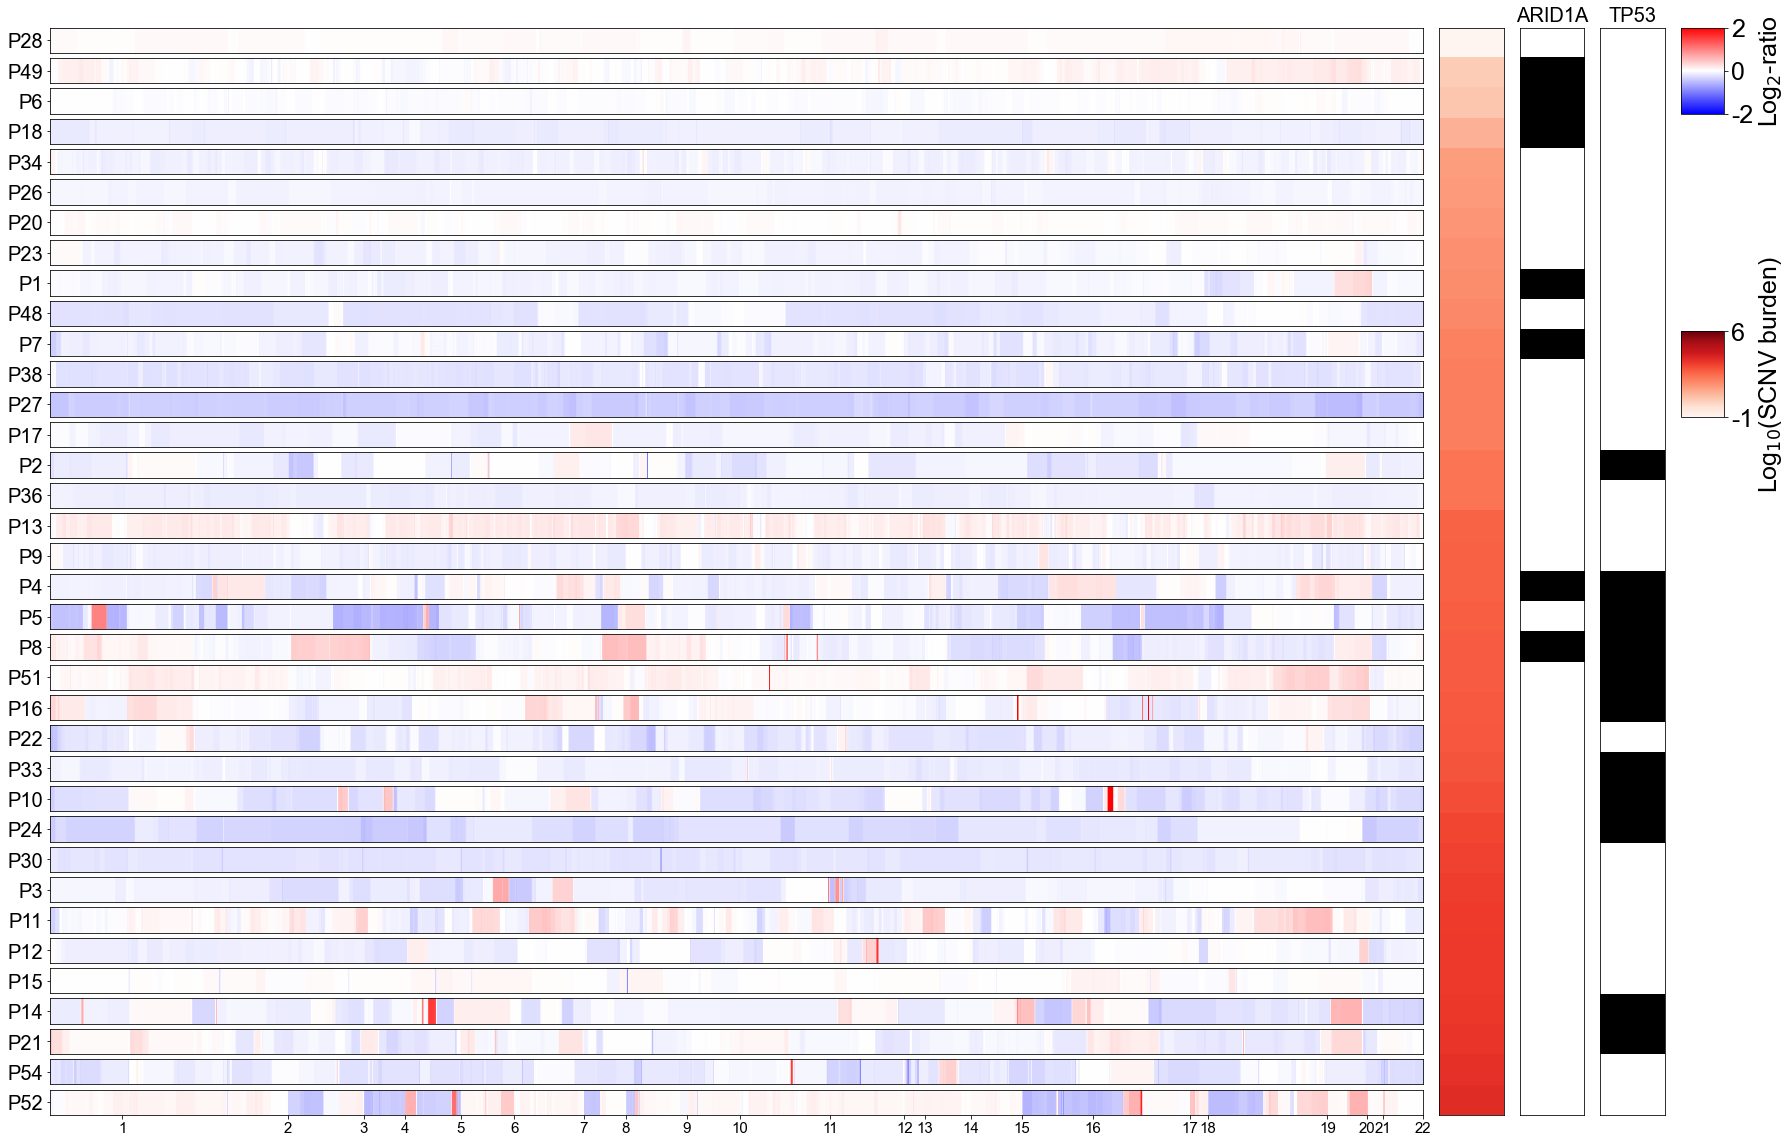

In [201]:
chrom_list=['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10',
            'chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19',
            'chr20','chr21','chr22']

fig=plt.figure(figsize=(30,20))
gs=mpl.gridspec.GridSpec(36,5,width_ratios=[32,1.5,1.5,1.5,1],wspace=0.05)
for index,ID in enumerate(c):
    output_path=dic[ID]['output']
    output=pd.read_csv(output_path,sep='\t')
    temp=[]
    xticks=[]
    count=0
    for index2,chrom in enumerate(chrom_list):
        for i,j in zip(output[output['chrom']==chrom]['num.mark'],output[output['chrom']==chrom]['seg.mean']):
            temp.extend([j]*i)
            count+=i
        xticks.append(count)
    ax=plt.subplot(gs[index,0])
    plt.imshow([temp],aspect='auto',cmap='bwr',vmin=-2,vmax=2)
    if ID=='52':
        plt.xticks([(i+j)/2 for i,j in zip([0]+xticks[1:],xticks)],[i.split('chr')[1] for i in chrom_list],size=15)
    else:
        plt.xticks([],[])
    plt.yticks([0],['P%s'%ID],color='black',size=20)

        
ax=plt.subplot(gs[:,1])
plt.imshow(np.log10([[0.07741607139836534],
 [2.21031231370702],
 [3.2059373108295133],
 [9.22704267723315],
 [24.34010616133273],
 [27.246773684844612],
 [37.00449313081892],
 [50.921848760602536],
 [51.93286977130471],
 [65.7126371484069],
 [97.28091087679925],
 [101.86802523930268],
 [110.38557027840862],
 [114.65014873381973],
 [171.12049954783987],
 [177.64110509728835],
 [428.8663300821449],
 [433.4423387332289],
 [436.0980894920601],
 [492.6461627185836],
 [578.2070319202658],
 [589.0200040008028],
 [645.0847461485282],
 [694.1099750045537],
 [798.3564084957799],
 [1080.5804173757192],
 [1492.793094414049],
 [1744.3527096393127],
 [2125.8694211635993],
 [2496.232493813654],
 [2675.8607379917257],
 [2689.1029495014704],
 [3016.894318164612],
 [3102.270156485358],
 [4278.6424039667445],
 [5595.05007044286]]),aspect='auto',cmap='Reds',vmin=-1,vmax=6)
plt.xticks([],[])
plt.yticks([],[])
#plt.title('log10(SCNV burden)',size=15)


ax=plt.subplot(gs[:,2])

plt.imshow(ARID1A,aspect='auto',cmap='Greys')
plt.title('ARID1A',size=20)
plt.xticks([],[])
plt.yticks([],[])

ax=plt.subplot(gs[:,3])

plt.imshow(TP53,aspect='auto',cmap='Greys')
plt.title('TP53',size=20)
plt.xticks([],[])
plt.yticks([],[])

ax1=plt.subplot(gs[:3,4])
norm=mpl.colors.Normalize(vmin=-2,vmax=2)
cb1=mpl.colorbar.ColorbarBase(ax1,cmap=mpl.cm.bwr,norm=norm,ticks=[-2,0,2])
cb1.set_label('Log$_{2}$-ratio',size=25)
cb1.ax.set_yticklabels(['-2','0','2'],rotation=0,fontsize=25)


ax1=plt.subplot(gs[10:13,4])
norm=mpl.colors.Normalize(vmin=-1,vmax=6)
cb1=mpl.colorbar.ColorbarBase(ax1,cmap=mpl.cm.Reds,norm=norm,ticks=[-1,6])
cb1.set_label('Log$_{10}$(SCNV burden)',size=25)
cb1.ax.set_yticklabels(['-1','6'],rotation=0,fontsize=25)

plt.savefig('../Supplementary_Figure3_A.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Supplementary_Figure3_A.pdf',
            bbox_inches='tight',quality=95)

plt.show()

In [91]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import numpy as np

In [59]:
patient_info_df

OStime  status (death:1,alive:0)  Sex (male:1,female:)  age  ageT  \
Patient_ID                                                                      
1            57.57                         0                     1   71     1   
2            23.90                         0                     1   52     0   
3            38.67                         0                     1   66     1   
4            19.10                         1                     1   61     0   
5            31.93                         1                     1   66     1   
6            27.20                         1                     1   59     0   
7            60.83                         0                     1   58     0   
8            44.30                         0                     1   61     0   
9            44.30                         0                     0   69     1   
10           43.23                         0                     1   46     0   
11           28.20                         0                     1   63     0   
12           21.70                         0                     1   67     1   
13           10.00                         0                     0   73     1   
14           60.83                         0                     1   75     1   
15           38.90                         0                     1   72     1   
16           30.33                         0                     1   59     0   
17           28.50                         0                     1   68     1   
18           49.10                         0                     1   57     0   
20           20.57                         0                     1   73     1   
21           32.70                         1                     1   64     0   
22           56.57                         0                     1   63     0   
23           19.00                         1                     1   71     1   
24           30.33                         0                     1   62     0   
26           47.67                         0                     0   61     0   
27           41.23                         0                     1   83     1   
28           34.33                         1                     1   77     1   
30            6.93                         1                     0   65     1   
33           16.50                         1                     1   70     1   
34           16.77                         0                     0   59     0   
36            8.60                         1                     1   59     0   
38           34.40                         0                     1   55     0   
48           13.27                         1                     1   72     1   
49            9.83                         1                     1   55     0   
51           29.50                         0                     1   57     0   
52            7.27                         0                     1   73     1   
54            4.10                         1                     1   60     0   

            initialDisease (benign:1,cancer:2)  IntervalTimeBetweenSurgeries  \
Patient_ID                                                                     
1                                            1                            47   
2                                            2                             7   
3                                            1                            48   
4                                            1                            20   
5                                            1                            45   
6                                            1                            38   
7                                            1                            40   
8                                            1                            40   
9                                            2                            27   
10                                           1       

In [36]:
KEGG_pathway_dic={}
with open('../c2.cp.kegg.v7.1.symbols.gmt') as infile:
    for line in infile:
        temp=line.strip().split('\t')
        KEGG_pathway_dic[temp[0]]=set(temp[2:])
KEGG_pathway_dic.keys()    

dict_keys(['KEGG_GLYCOLYSIS_GLUCONEOGENESIS', 'KEGG_CITRATE_CYCLE_TCA_CYCLE', 'KEGG_PENTOSE_PHOSPHATE_PATHWAY', 'KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS', 'KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM', 'KEGG_GALACTOSE_METABOLISM', 'KEGG_ASCORBATE_AND_ALDARATE_METABOLISM', 'KEGG_FATTY_ACID_METABOLISM', 'KEGG_STEROID_BIOSYNTHESIS', 'KEGG_PRIMARY_BILE_ACID_BIOSYNTHESIS', 'KEGG_STEROID_HORMONE_BIOSYNTHESIS', 'KEGG_OXIDATIVE_PHOSPHORYLATION', 'KEGG_PURINE_METABOLISM', 'KEGG_PYRIMIDINE_METABOLISM', 'KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM', 'KEGG_GLYCINE_SERINE_AND_THREONINE_METABOLISM', 'KEGG_CYSTEINE_AND_METHIONINE_METABOLISM', 'KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION', 'KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS', 'KEGG_LYSINE_DEGRADATION', 'KEGG_ARGININE_AND_PROLINE_METABOLISM', 'KEGG_HISTIDINE_METABOLISM', 'KEGG_TYROSINE_METABOLISM', 'KEGG_PHENYLALANINE_METABOLISM', 'KEGG_TRYPTOPHAN_METABOLISM', 'KEGG_BETA_ALANINE_METABOLISM', 'KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM'

In [26]:
maf=pd.read_csv('../SNVs.txt',sep='\t')
all_samples=set()
mutation_dic={}
for i in maf.index:
    gene_name=maf.loc[i,'Hugo_Symbol']
    sample_ID='-'.join(maf.loc[i,'Tumor_Sample_Barcode'].split('-')[:3])
    all_samples.add(sample_ID)
    if gene_name in mutation_dic:
        mutation_dic[gene_name].add(sample_ID)
    else:
        mutation_dic[gene_name]=set([sample_ID])

In [35]:
STAD=set()
for i in mutation_dic:
    if len(mutation_dic[i])/433>=0.05:
        STAD=STAD|set([i])
STAD

{'ABCA12',
 'ABCA13',
 'ABCB1',
 'ABCC9',
 'ACACB',
 'ACAN',
 'ADAMTS12',
 'ADAMTS16',
 'ADAMTS18',
 'ADAMTS5',
 'ADCY8',
 'ADGRB3',
 'ADGRG4',
 'ADGRV1',
 'AFF2',
 'AHNAK',
 'AHNAK2',
 'AKAP6',
 'AKAP9',
 'ALMS1',
 'ANK1',
 'ANK2',
 'ANK3',
 'ANKRD11',
 'APC',
 'APOB',
 'ARFGEF2',
 'ARID1A',
 'ARID2',
 'ASH1L',
 'ASPM',
 'ASTN2',
 'ATM',
 'ATP10A',
 'BIRC6',
 'BNC2',
 'BOD1L1',
 'BRINP3',
 'BSN',
 'C3',
 'CACNA1B',
 'CACNA1C',
 'CACNA1D',
 'CACNA1E',
 'CDH1',
 'CDH10',
 'CDH11',
 'CDH12',
 'CDH23',
 'CDH8',
 'CDH9',
 'CELSR1',
 'CELSR2',
 'CELSR3',
 'CENPF',
 'CEP250',
 'CHD4',
 'CHD6',
 'CHD7',
 'CMYA5',
 'CNTLN',
 'CNTN6',
 'CNTNAP1',
 'CNTNAP2',
 'CNTNAP5',
 'COL11A1',
 'COL12A1',
 'COL1A2',
 'COL22A1',
 'COL4A1',
 'COL6A3',
 'COL6A6',
 'COL7A1',
 'CPAMD8',
 'CREBBP',
 'CSMD1',
 'CSMD2',
 'CSMD3',
 'CTNND2',
 'CUBN',
 'DCAF12L2',
 'DCC',
 'DCHS1',
 'DCHS2',
 'DCLK1',
 'DIDO1',
 'DLC1',
 'DMD',
 'DNAH1',
 'DNAH10',
 'DNAH11',
 'DNAH17',
 'DNAH2',
 'DNAH3',
 'DNAH5',
 'DNAH7',
 'DNAH

In [43]:
GRC=set(df.index[(df!=0).mean(axis=1)>=0.05])

In [44]:
KEGG_pathway_dic['KEGG_CELL_CYCLE']&GRC

{'ABL1', 'ATM', 'ATR', 'CREBBP', 'RB1', 'SMAD4', 'TP53'}

In [45]:
KEGG_pathway_dic['KEGG_CELL_CYCLE']&STAD

{'ATM', 'CREBBP', 'PRKDC', 'SMAD4', 'TP53'}

In [56]:
len(STAD)

370

In [55]:
scipy.stats.fisher_exact([[len(KEGG_pathway_dic['KEGG_CELL_CYCLE']&GRC),
                                   len(KEGG_pathway_dic['KEGG_CELL_CYCLE']&STAD)],
                                  [len(GRC),len(STAD)]])

(0.3460253841015364, 0.07135431779815807)

In [47]:
result=[]
for pathway in KEGG_pathway_dic:
    o,p=scipy.stats.fisher_exact([[len(KEGG_pathway_dic[pathway]&GRC),
                                   len(KEGG_pathway_dic[pathway]&STAD)],
                                  [len(GRC),len(STAD)]])
    result.append([pathway,o,p])
result

[['KEGG_GLYCOLYSIS_GLUCONEOGENESIS', inf, 1.0],
 ['KEGG_CITRATE_CYCLE_TCA_CYCLE', inf, 1.0],
 ['KEGG_PENTOSE_PHOSPHATE_PATHWAY', inf, 1.0],
 ['KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS', inf, 1.0],
 ['KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM', inf, 1.0],
 ['KEGG_GALACTOSE_METABOLISM', nan, 1.0],
 ['KEGG_ASCORBATE_AND_ALDARATE_METABOLISM', inf, 1.0],
 ['KEGG_FATTY_ACID_METABOLISM', nan, 1.0],
 ['KEGG_STEROID_BIOSYNTHESIS', inf, 1.0],
 ['KEGG_PRIMARY_BILE_ACID_BIOSYNTHESIS', inf, 1.0],
 ['KEGG_STEROID_HORMONE_BIOSYNTHESIS', inf, 1.0],
 ['KEGG_OXIDATIVE_PHOSPHORYLATION', nan, 1.0],
 ['KEGG_PURINE_METABOLISM', 1.9772879091516367, 1.0],
 ['KEGG_PYRIMIDINE_METABOLISM', inf, 1.0],
 ['KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM', inf, 1.0],
 ['KEGG_GLYCINE_SERINE_AND_THREONINE_METABOLISM', inf, 1.0],
 ['KEGG_CYSTEINE_AND_METHIONINE_METABOLISM', inf, 1.0],
 ['KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION', inf, 1.0],
 ['KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS', nan, 1.0],
 ['KEGG_L

In [51]:
sorted(result,key=lambda x:x[2])

[['KEGG_FOCAL_ADHESION', 0.4119349810732576, 0.005429842184022202],
 ['KEGG_ECM_RECEPTOR_INTERACTION', 0.40605019562935396, 0.011660996225998395],
 ['KEGG_PATHWAYS_IN_CANCER', 0.46685964521635864, 0.013381090208573183],
 ['KEGG_SMALL_CELL_LUNG_CANCER', 0.3460253841015364, 0.016947450324383544],
 ['KEGG_CALCIUM_SIGNALING_PATHWAY', 0.44488977955911824, 0.01793154812065302],
 ['KEGG_TYPE_II_DIABETES_MELLITUS', 0.31777841397079876, 0.02625432922308922],
 ['KEGG_COLORECTAL_CANCER', 0.31777841397079876, 0.02625432922308922],
 ['KEGG_MELANOMA', 0.24716098864395458, 0.03226634951864143],
 ['KEGG_OLFACTORY_TRANSDUCTION', inf, 0.033332242717198646],
 ['KEGG_LONG_TERM_POTENTIATION', 0.37074148296593185, 0.042820982249731],
 ['KEGG_ENDOMETRIAL_CANCER', 0.3295479848586061, 0.043134173251259476],
 ['KEGG_CELL_ADHESION_MOLECULES_CAMS',
  0.4016366065464262,
  0.051300011141267456],
 ['KEGG_DILATED_CARDIOMYOPATHY', 0.4016366065464262, 0.051300011141267456],
 ['KEGG_VIRAL_MYOCARDITIS', 0.40163660654642

In [52]:
?scipy.stats.fisher_exact

In [54]:
scipy.stats.fisher_exact([[8, 2], [1, 5]])

(20.0, 0.03496503496503495)

In [16]:
import pandas as pd

df=pd.read_csv('../mutation_landscape.txt',sep='\t',index_col=0)
df

30  8  12  51  54  36  23  9  6  10  ...  26  20  18  49  13  27  \
NEU3          0  0   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   
ETV1          0  0   0   1   0   0   0  0  0   0  ...   0   0   0   1   0   0   
PRAMEF19      0  0   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   
SCN10A        0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
CAMSAP3       0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
...          .. ..  ..  ..  ..  ..  .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..   
KLHDC7B       0  0   0   1   0   0   0  0  0   0  ...   0   0   0   0   0   0   
PALM2-AKAP2   0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
ADAM7         0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   
RYR1          0  0   0   0   0   0   0  0  0   0  ...   1   0   1   0   0   0   
SOGA3         0  0   1   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   

             48  22  11  52  
NEU3          0   0   0   0  
ETV1          0   0   0   0  
PRAMEF19      0   0   1   0  
SCN10A        0   0   0   0  
CAMSAP3       0   0   0   0  
...          ..  ..  ..  ..  
KLHDC7B       0   0   0   0  
PALM2-AKAP2   0   0   0   0  
ADAM7         0   0   0   0  
RYR1          0   0   0   0  
SOGA3         0   0   0   0  

[5608 rows x 36 columns]

In [3]:
df.loc['TP53',:]

30    0
8     1
12    0
51    1
54    0
36    0
23    0
9     0
6     0
10    1
7     0
1     0
28    0
3     0
16    1
24    1
2     1
15    0
38    0
4     1
34    0
5     1
14    1
17    0
21    1
33    1
26    0
20    0
18    0
49    0
13    0
27    0
48    0
22    0
11    0
52    0
Name: TP53, dtype: int64

In [6]:
(df!=0).sum(axis=0).index

Index(['30', '8', '12', '51', '54', '36', '23', '9', '6', '10', '7', '1', '28',
       '3', '16', '24', '2', '15', '38', '4', '34', '5', '14', '17', '21',
       '33', '26', '20', '18', '49', '13', '27', '48', '22', '11', '52'],
      dtype='object')

In [7]:
(df!=0).sum(axis=0).values

array([142, 344, 174, 203, 914, 198, 141, 142, 431, 211, 158, 248, 110,
       129, 311, 235, 221, 142, 245, 219, 230, 241, 256, 177, 151, 143,
       176,  75, 142, 211, 226, 150, 215, 153, 206, 164])

In [104]:
df

30  8  12  51  54  36  23  9  6  10  ...  26  20  18  49  13  27  48  \
EFHC1    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
TRPM1    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
AKAP11   0  0   0   1   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
CYB5R4   1  0   0   0   0   0   0  0  1   0  ...   0   0   0   0   0   0   0   
PRR32    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   1   0   0   
...     .. ..  ..  ..  ..  ..  .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
ZC3H13   0  0   0   0   0   0   0  0  0   0  ...   1   0   0   0   0   0   0   
WWC2     0  0   0   0   0   0   1  0  0   0  ...   0   0   0   0   0   0   0   
LCE3A    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
ZFC3H1   0  0   0   0   0   0   0  0  1   0  ...   0   0   0   0   0   0   0   
RLIM     0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   1   0   0   

        22  11  52  
EFHC1    0   0   0  
TRPM1    0   0   0  
AKAP11   0   0   0  
CYB5R4   0   0   0  
PRR32    0   0   0  
...     ..  ..  ..  
ZC3H13   0   0   1  
WWC2     0   0   0  
LCE3A    0   0   0  
ZFC3H1   0   0   0  
RLIM     0   0   0  

[5608 rows x 36 columns]

In [17]:
sample_statistics=pd.read_csv('../sample_statistics2.txt',sep='\t',index_col=0)
    
dic={}
for i,j in zip((df!=0).sum(axis=0).index,(df!=0).sum(axis=0).values):
    dic[i]=j
    
mutation_load={}
for i in dic:
    mutation_load[i]=dic[i]/sample_statistics.loc['T'+i,'#loc>=20X']*1000000
mutation_load

{'30': 2.242612164326364,
 '8': 5.458985467863301,
 '12': 3.022816794457405,
 '51': 3.3500538979114807,
 '54': 14.539729125800854,
 '36': 3.171793312555738,
 '23': 2.4421343200895405,
 '9': 2.245532465718626,
 '6': 6.8216889951151956,
 '10': 3.312765976053349,
 '7': 2.504362226514333,
 '1': 4.142269935530078,
 '28': 2.0685185875387853,
 '3': 2.0477616433385606,
 '16': 5.426258516412417,
 '24': 3.926113419034653,
 '2': 3.4572339766004707,
 '15': 2.4524337520789126,
 '38': 3.8925789919863236,
 '4': 3.4807752649688513,
 '34': 3.6503111723629798,
 '5': 3.826343936624567,
 '14': 4.592598482174906,
 '17': 3.1087411848087094,
 '21': 2.6790613647699244,
 '33': 2.2672396663060805,
 '26': 3.0229643263758548,
 '20': 1.2541883620350158,
 '18': 2.64427223818055,
 '49': 3.3353403862662443,
 '13': 3.5678491076414707,
 '27': 2.3803674906546775,
 '48': 3.4100742252616683,
 '22': 2.41469399056527,
 '11': 3.2026023787251434,
 '52': 2.6312975775504364}

In [12]:
[mutation_load[i] for i in df.columns[df.loc['TP53',:]==0]]

[2.242612164326364,
 3.022816794457405,
 14.539729125800854,
 3.171793312555738,
 2.4421343200895405,
 2.245532465718626,
 6.8216889951151956,
 2.504362226514333,
 4.142269935530078,
 2.0685185875387853,
 2.0477616433385606,
 2.4524337520789126,
 3.8925789919863236,
 3.6503111723629798,
 3.1087411848087094,
 3.0229643263758548,
 1.2541883620350158,
 2.64427223818055,
 3.3353403862662443,
 3.5678491076414707,
 2.3803674906546775,
 3.4100742252616683,
 2.41469399056527,
 3.2026023787251434,
 2.6312975775504364]

In [13]:
[mutation_load[i] for i in df.columns[df.loc['TP53',:]==1]]

[5.458985467863301,
 3.3500538979114807,
 3.312765976053349,
 5.426258516412417,
 3.926113419034653,
 3.4572339766004707,
 3.4807752649688513,
 3.826343936624567,
 4.592598482174906,
 2.6790613647699244,
 2.2672396663060805]

In [22]:
import scipy.stats
import numpy as np

result=[]
for i in df.index:
    s,p=scipy.stats.ranksums([mutation_load[i] for i in df.columns[df.loc[i,:]!=0]],
                             [mutation_load[i] for i in df.columns[df.loc[i,:]==0]])
    if not np.isnan(s):
        result.append([i,s,p])
result

[['SPAG5', -1.3958017582244795, 0.1627742007838051],
 ['KRTAP5-5', -0.13812277665483927, 0.8901433851357767],
 ['ATF2', -1.7955960965129105, 0.07255877715559715],
 ['DNAJC10', -0.3369176657783226, 0.736178967749227],
 ['ZNF761', 1.6845883288916133, 0.0920680246654674],
 ['POLR3D', -1.1070151875573457, 0.26828736201900616],
 ['CDK9', -0.6215524949467767, 0.5342361662349244],
 ['FAM193A', 0.91449080711259, 0.36045900614296633],
 ['MCM10', 0.8182286168902121, 0.413226657577351],
 ['UBN2', -1.4920639484468574, 0.13568238179965747],
 ['PRR23A', 1.3812277665483927, 0.16720893987809782],
 ['SENP2', 1.1070151875573457, 0.26828736201900616],
 ['MYCN', 0.4331798560007005, 0.6648841120194451],
 ['HMGXB4', 0.5524911066193571, 0.58061192589016],
 ['FAM114A1', 1.6845883288916133, 0.0920680246654674],
 ['ZRANB1', 0.9668594365838749, 0.3336143068881531],
 ['KIF3C', 1.1070151875573457, 0.26828736201900616],
 ['RASSF4', 0.3453069416370982, 0.7298636285922802],
 ['CCDC40', 1.6845883288916133, 0.092068024

In [23]:
sorted(result,key=lambda x:x[1],reverse=True)

[['PTPN23', 3.0202022484631095, 0.00252605943621764],
 ['TULP4', 2.718728083402677, 0.006553345680248243],
 ['NBEAL2', 2.718728083402677, 0.006553345680248243],
 ['DCHS2', 2.6678453194757465, 0.007633939492802421],
 ['PTPRT', 2.604255321996248, 0.009207413714799153],
 ['OBSCN', 2.604255321996248, 0.009207413714799153],
 ['CEP162', 2.5781100786595714, 0.009934234584454863],
 ['ZDHHC8', 2.547018941293034, 0.010864753580718017],
 ['CD93', 2.48978256058982, 0.012782126910992769],
 ['AXIN2', 2.48978256058982, 0.012782126910992769],
 ['KMT2D', 2.466498502911539, 0.013644129880670203],
 ['TCTN3', 2.4325461798866055, 0.014993079476859805],
 ['COL5A3', 2.4161617987704878, 0.015685089789788036],
 ['PLXNC1', 2.4161617987704878, 0.015685089789788036],
 ['MARVELD3', 2.4161617987704878, 0.015685089789788036],
 ['COL6A6', 2.375309799183391, 0.017534226578066033],
 ['HLA-B', 2.3480872031322675, 0.018870102830341826],
 ['PRSS57', 2.3480872031322675, 0.018870102830341826],
 ['LCE3D', 2.3480872031322675,

In [24]:
sorted(result,key=lambda x:x[1])

[['KMT2C', -2.2621614702258803, 0.023687428867453883],
 ['ANKRD20A4', -2.2099644264774283, 0.02710763125916039],
 ['ZNF586', -2.1409030381500087, 0.0322818580994925],
 ['RNF111', -2.1409030381500087, 0.0322818580994925],
 ['BAGE2', -2.0891278956673203, 0.03669621186762593],
 ['UTP20', -2.071841649822589, 0.03828021106974179],
 ['ZDBF2', -2.063804869783125, 0.039036221169826656],
 ['DGKZ', -2.031891514964106, 0.04216463972085565],
 ['ERICH3', -2.031891514964106, 0.04216463972085565],
 ['LBR', -1.9337188731677497, 0.05314770207211969],
 ['SYF2', -1.9337188731677497, 0.05314770207211969],
 ['CGREF1', -1.9174187535576772, 0.05518475361879555],
 ['FAM210A', -1.8646574848403301, 0.06222942967694009],
 ['ATF2', -1.7955960965129105, 0.07255877715559715],
 ['SMO', -1.7955960965129105, 0.07255877715559715],
 ['PROM1', -1.7955960965129105, 0.07255877715559715],
 ['GAB2', -1.7955960965129105, 0.07255877715559715],
 ['OR8D4', -1.7457096114480346, 0.08086142410639965],
 ['IGSF10', -1.740353075909836

In [18]:
df1=pd.read_csv('../epigenetic_regulators.txt',sep='\t')
epigenetic_regulators=set(df1['Protein'])

In [19]:
temp=df.loc[set(df.index)&epigenetic_regulators,]
temp

30  8  12  51  54  36  23  9  6  10  ...  26  20  18  49  13  27  48  \
RBBP7     0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   1   
SMARCA4   0  0   0   0   0   0   0  0  1   0  ...   0   0   0   0   0   0   0   
EHMT1     0  0   1   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
SETD1B    0  0   0   0   0   0   0  0  1   0  ...   0   0   0   0   0   0   0   
ASH1L     0  0   0   0   0   0   0  0  0   0  ...   0   0   0   1   0   0   0   
...      .. ..  ..  ..  ..  ..  .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
ING1      0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
ACTR5     0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   1   0   
KAT8      0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
KMT2D     0  2   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   2   
DOT1L     0  0   0   0   0   0   0  0  0   1  ...   0   0   0   0   1   0   0   

         22  11  52  
RBBP7     0   0   0  
SMARCA4   0   0   0  
EHMT1     0   0   0  
SETD1B    0   0   0  
ASH1L     0   0   0  
...      ..  ..  ..  
ING1      0   0   0  
ACTR5     0   0   0  
KAT8      0   0   0  
KMT2D     0   0   0  
DOT1L     0   0   0  

[70 rows x 36 columns]

In [20]:
temp1=temp.loc[(temp!=0).sum(axis=1)>=3,]
temp1

30  8  12  51  54  36  23  9  6  10  ...  26  20  18  49  13  27  48  \
ASH1L    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   1   0   0   0   
PRDM9    0  0   0   1   1   0   0  0  0   0  ...   0   0   0   0   0   0   0   
KMT2E    1  0   0   0   1   0   1  0  0   0  ...   0   0   0   0   0   0   0   
HDAC5    0  0   0   0   0   0   0  0  0   1  ...   0   0   0   0   0   1   0   
SETDB1   1  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
KDM2B    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   1   0   0   0   
KMT2C    1  0   0   0   3   0   1  1  0   0  ...   0   0   0   1   0   1   1   
KMT2A    0  0   0   0   0   0   0  0  0   1  ...   0   0   1   0   0   0   0   
NCOA1    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
JMJD1C   0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
ARID1A   0  1   0   0   0   0   0  0  1   0  ...   0   0   1   1   0   0   0   
NSD1     0  0   0   0   1   0   0  0  0   0  ...   0   0   1   0   1   0   0   
KMT2D    0  2   0   0   1   0   0  0  0   0  ...   0   0   0   0   0   0   2   

        22  11  52  
ASH1L    0   0   0  
PRDM9    0   0   0  
KMT2E    0   1   0  
HDAC5    0   0   1  
SETDB1   0   0   0  
KDM2B    0   0   2  
KMT2C    0   0   1  
KMT2A    0   0   0  
NCOA1    0   0   0  
JMJD1C   0   1   0  
ARID1A   0   0   0  
NSD1     0   0   0  
KMT2D    0   0   0  

[13 rows x 36 columns]

In [21]:
gene='KMT2C'
mutation_samples=[int(i) for i in df.columns[df.loc[gene,:]!=0]]
mutation_samples

[30, 54, 23, 9, 7, 28, 3, 24, 15, 5, 33, 49, 27, 48, 52]

In [22]:
gene='KMT2C'
wildtype_samples=[int(i) for i in df.columns[df.loc[gene,:]==0]]
wildtype_samples

[8, 12, 51, 36, 6, 10, 1, 16, 2, 38, 4, 34, 14, 17, 21, 26, 20, 18, 13, 22, 11]

In [51]:
numbers=(df.loc[['KMT2C','ARID1A','NSD1','KMT2D'],]!=0).sum()
numbers

30    1
8     2
12    0
51    0
54    3
36    0
23    1
9     1
6     1
10    0
7     2
1     1
28    1
3     2
16    1
24    2
2     0
15    1
38    0
4     1
34    0
5     1
14    0
17    0
21    0
33    1
26    0
20    0
18    2
49    2
13    1
27    1
48    2
22    0
11    0
52    1
dtype: int64

In [24]:
surv_df=pd.read_csv('../OS_days.txt',sep='\t',index_col=0).dropna()
surv_df

OS_event  OSday
ID                 
13         0    300
29         1     63
19         0    834
23         1    791
45         1   1384
9          0   1043
18         0    833
10         0    550
1          1    787
3          0   1696
26         0   3837
22         1   1297
8          0   1329
15         0    958
27         1   2727
2          1    617
12         0   1160
6          1    218
21         1   2297
14         0    981
20         0   1167
28         1    651
11         0    816
30         1    208
7          0   1430
17         0    855
5          1   1030
16         0    910
4          1    573
46         1   1473
40         0   1192
51         0   1222
52         0   1057

In [34]:
surv_df.sort_index()

OS_event  OSday
ID                 
1          1    787
2          1    617
3          0   1696
4          1    573
5          1   1030
6          1    218
7          0   1430
8          0   1329
9          0   1043
10         0    550
11         0    816
12         0   1160
13         0    300
14         0    981
15         0    958
16         0    910
17         0    855
18         0    833
19         0    834
20         0   1167
21         1   2297
22         1   1297
23         1    791
26         0   3837
27         1   2727
28         1    651
29         1     63
30         1    208
40         0   1192
45         1   1384
46         1   1473
51         0   1222
52         0   1057

In [25]:
patient_info_df=pd.read_csv('../cohort1_info.txt',sep='\t',index_col=0)
patient_info_df

OStime  status (death:1,alive:0)  Sex (male:1,female:)  age  ageT  \
Patient_ID                                                                      
1            26.23                         0                     1   71     1   
2            20.57                         0                     1   52     0   
3            38.67                         0                     1   66     1   
4            19.10                         1                     1   61     0   
5            31.93                         1                     1   66     1   
6            27.20                         1                     1   59     0   
7            47.67                         0                     1   58     0   
8            44.30                         0                     1   61     0   
9            34.77                         0                     0   69     1   
10           18.33                         0                     1   46     0   
11           28.20                         0                     1   63     0   
12           21.70                         0                     1   67     1   
13           10.00                         0                     0   73     1   
14           60.83                         0                     1   75     1   
15           38.90                         0                     1   72     1   
16           30.33                         0                     1   59     0   
17           28.50                         0                     1   68     1   
18           49.10                         0                     1   57     0   
20           20.57                         0                     1   73     1   
21           32.70                         1                     1   64     0   
22           43.23                         0                     1   63     0   
23           19.00                         1                     1   71     1   
24           35.33                         0                     1   62     0   
26           52.77                         0                     0   61     0   
27           41.23                         1                     1   83     1   
28           34.33                         1                     1   77     1   
30            6.93                         1                     0   65     1   
33           16.50                         1                     1   70     1   
34           16.77                         0                     0   59     0   
36            8.60                         1                     1   59     0   
38           34.40                         0                     1   55     0   
48           13.27                         1                     1   72     1   
49            9.83                         1                     1   55     0   
51           29.50                         0                     1   57     0   
52            7.27                         0                     1   73     1   
54            6.10                         1                     1   60     0   

            initialDisease (benign:1,cancer:2)  IntervalTimeBetweenSurgeries  \
Patient_ID                                                                     
1                                            1                            47   
2                                            2                             7   
3                                            1                            48   
4                                            1                            20   
5                                            1                            45   
6                                            1                            38   
7                                            1                            40   
8                                            1                            40   
9                                            2                            27   
10                                           1       

In [27]:
import numpy as np

np.median(list(mutation_load.values()))

3.1871978456404406

In [28]:
high=[]
low=[]
for i in mutation_load:
    if mutation_load[i]>np.median(list(mutation_load.values())):
        high.append(int(i))
    else:
        low.append(int(i))

In [34]:
temp_df=pd.concat([patient_info_df.loc[mutation_samples+wildtype_samples,
                                       'OStime'],
                   patient_info_df.loc[mutation_samples+wildtype_samples,
                                       'status (death:1,alive:0)']],axis=1)
temp_df['mutation']=[1]*len(mutation_samples)+[0]*len(wildtype_samples)
temp_df

OStime  status (death:1,alive:0)  mutation
Patient_ID                                            
8            44.30                         0         1
51           29.50                         0         1
54            6.10                         1         1
6            27.20                         1         1
10           18.33                         0         1
1            26.23                         0         1
16           30.33                         0         1
24           35.33                         0         1
2            20.57                         0         1
38           34.40                         0         1
4            19.10                         1         1
34           16.77                         0         1
5            31.93                         1         1
14           60.83                         0         1
49            9.83                         1         1
13           10.00                         0         1
48           13.27                         1         1
11           28.20                         0         1
30            6.93                         1         0
12           21.70                         0         0
36            8.60                         1         0
23           19.00                         1         0
9            34.77                         0         0
7            47.67                         0         0
28           34.33                         1         0
3            38.67                         0         0
15           38.90                         0         0
17           28.50                         0         0
21           32.70                         1         0
33           16.50                         1         0
26           52.77                         0         0
20           20.57                         0         0
18           49.10                         0         0
27           41.23                         1         0
22           43.23                         0         0
52            7.27                         0         0

In [36]:
from lifelines import CoxPHFitter

cph=CoxPHFitter()
cph.fit(temp_df,'OStime','status (death:1,alive:0)')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 36 observations, 23 censored>
      duration col = 'OStime'
         event col = 'status (death:1,alive:0)'
number of subjects = 36
  number of events = 13
    log-likelihood = -40.18
  time fit was run = 2022-09-08 13:51:46 UTC

---
          coef exp(coef)  se(coef)    z    p  -log2(p)  lower 0.95  upper 0.95
mutation  0.12      1.13      0.57 0.22 0.83      0.27       -0.99        1.23
---
Concordance = 0.52
Log-likelihood ratio test = 0.05 on 1 df, -log2(p)=0.27


In [38]:
cph.hazards_

mutation    0.122666
dtype: float64

In [41]:
cph.summary['coef']

coef  exp(coef)  se(coef)        z         p  -log2(p)  \
mutation  0.122666   1.130507  0.565832  0.21679  0.828372  0.271649   

          lower 0.95  upper 0.95  
mutation   -0.986344    1.231677

In [42]:
cph.summary['coef']

mutation    0.122666
Name: coef, dtype: float64

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95

---
 test_statistic    p  -log2(p)
           0.05 0.83      0.27
<lifelines.CoxPHFitter: fitted with 36 observations, 23 censored>
      duration col = 'OStime'
         event col = 'status (death:1,alive:0)'
number of subjects = 36
  number of events = 13
    log-likelihood = -40.18
  time fit was run = 2022-09-08 14:07:17 UTC

---
          coef exp(coef)  se(coef)    z    p  -log2(p)  lower 0.95  upper 0.95
mutation  0.12      1.13      0.57 0.22 0.83      0.27       -0.99        1.23
---
Concordance = 0.52
Log-likelihood ratio test = 0.05 on 1 df, -log2(p)=0.27


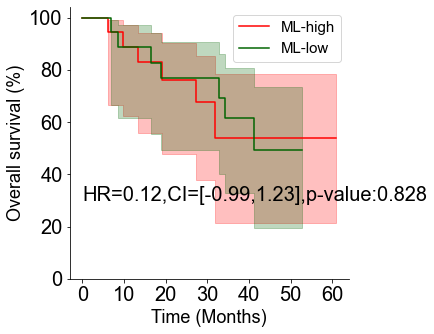

In [45]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import numpy as np
from matplotlib import rcParams
from lifelines import CoxPHFitter

rcParams['font.family']='Arial'
rcParams['pdf.fonttype'] = 42 

mutation_samples=high
wildtype_samples=low

gIT=patient_info_df.loc[mutation_samples,'OStime']
gIE=patient_info_df.loc[mutation_samples,'status (death:1,alive:0)']
gIIT=patient_info_df.loc[wildtype_samples,'OStime']
gIIE=patient_info_df.loc[wildtype_samples,'status (death:1,alive:0)']


plt.figure(figsize=(5,5))
ax=plt.subplot(111)
kmf=KaplanMeierFitter()
kmf.fit(gIT,gIE,label='ML-high')
ax=kmf.plot(ax=ax,c='red')
kmf=KaplanMeierFitter()
kmf.fit(gIIT,gIIE,label='ML-low')
kmf.plot(ax=ax,c='darkgreen')

plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,20,40,60,80,100],size=20)
plt.xticks([0,10,20,30,40,50,60],size=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

results=logrank_test(gIT,gIIT,gIE,gIIE,alpha=.95)
results.print_summary()

temp_df=pd.concat([patient_info_df.loc[mutation_samples+wildtype_samples,
                                       'OStime'],
                   patient_info_df.loc[mutation_samples+wildtype_samples,
                                       'status (death:1,alive:0)']],axis=1)
temp_df['mutation']=[1]*len(mutation_samples)+[0]*len(wildtype_samples)
cph=CoxPHFitter()
cph.fit(temp_df,'OStime','status (death:1,alive:0)')
cph.print_summary()

plt.text(0,0.3,'HR=%.2f,CI=[%.2f,%.2f],p-value:%.3f'%(cph.summary['coef'],
                                                 cph.summary['lower 0.95'],
                                                 cph.summary['upper 0.95'],
                                                 results.p_value),size=20)

plt.legend(fontsize=15)
plt.xlabel('Time (Months)',size=18)
plt.ylabel('Overall survival (%)',size=18)

plt.savefig('../Figure2_D.png',
            bbox_inches='tight')
plt.savefig('../Figure2_D.pdf',
            bbox_inches='tight')

plt.show()

In [48]:
numbers

30    2
8     2
12    0
51    0
54    4
36    0
23    2
9     1
6     1
10    0
7     2
1     1
28    1
3     2
16    2
24    2
2     0
15    1
38    1
4     2
34    1
5     1
14    0
17    0
21    0
33    1
26    0
20    0
18    2
49    2
13    1
27    1
48    2
22    0
11    2
52    1
dtype: int64

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95

---
 test_statistic    p  -log2(p)
           3.29 0.07      3.84
<lifelines.CoxPHFitter: fitted with 36 observations, 23 censored>
      duration col = 'OStime'
         event col = 'status (death:1,alive:0)'
number of subjects = 36
  number of events = 13
    log-likelihood = -38.33
  time fit was run = 2022-09-08 14:12:49 UTC

---
          coef exp(coef)  se(coef)    z    p  -log2(p)  lower 0.95  upper 0.95
mutation  1.30      3.68      0.77 1.69 0.09      3.46       -0.21        2.81
---
Concordance = 0.63
Log-likelihood ratio test = 3.74 on 1 df, -log2(p)=4.24


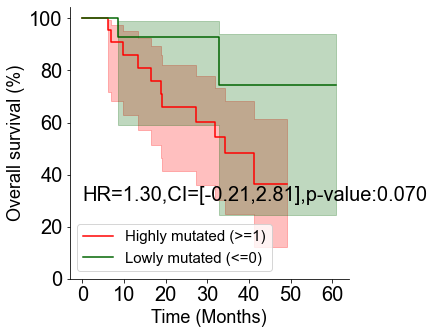

In [55]:
from matplotlib import rcParams

rcParams['font.family']='Arial'

mutation_samples=[int(i) for i in numbers.index[numbers>=1] if int(i) in patient_info_df.index]
wildtype_samples=[int(i) for i in numbers.index[numbers<=0] if int(i) in patient_info_df.index]

gIT=patient_info_df.loc[mutation_samples,'OStime']
gIE=patient_info_df.loc[mutation_samples,'status (death:1,alive:0)']
gIIT=patient_info_df.loc[wildtype_samples,'OStime']
gIIE=patient_info_df.loc[wildtype_samples,'status (death:1,alive:0)']


plt.figure(figsize=(5,5))
ax=plt.subplot(111)
kmf=KaplanMeierFitter()
kmf.fit(gIT,gIE,label='Highly mutated (>=1)')
ax=kmf.plot(ax=ax,c='red')
kmf=KaplanMeierFitter()
kmf.fit(gIIT,gIIE,label='Lowly mutated (<=0)')
kmf.plot(ax=ax,c='darkgreen')

plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,20,40,60,80,100],size=20)
plt.xticks([0,10,20,30,40,50,60],size=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

results=logrank_test(gIT,gIIT,gIE,gIIE,alpha=.95)
results.print_summary()

temp_df=pd.concat([patient_info_df.loc[mutation_samples+wildtype_samples,
                                       'OStime'],
                   patient_info_df.loc[mutation_samples+wildtype_samples,
                                       'status (death:1,alive:0)']],axis=1)
temp_df['mutation']=[1]*len(mutation_samples)+[0]*len(wildtype_samples)
cph=CoxPHFitter()
cph.fit(temp_df,'OStime','status (death:1,alive:0)')
cph.print_summary()

plt.text(0,0.3,'HR=%.2f,CI=[%.2f,%.2f],p-value:%.3f'%(cph.summary['coef'],
                                                 cph.summary['lower 0.95'],
                                                 cph.summary['upper 0.95'],
                                                 results.p_value),size=20)

plt.legend(fontsize=15)
plt.xlabel('Time (Months)',size=18)
plt.ylabel('Overall survival (%)',size=18)

plt.savefig('../Figure2_C.png',
            bbox_inches='tight')
plt.savefig('../Figure2_C.pdf',
            bbox_inches='tight')

plt.show()

In [7]:
temp

30  8  12  51  54  36  23  9  6  10  ...  26  20  18  49  13  27  48  \
SETD7     0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
SETDB1    1  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
SETD3     0  0   0   0   0   0   1  0  0   0  ...   0   0   0   0   0   0   0   
RUVBL2    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
JMJD8     0  0   0   0   0   0   0  0  1   0  ...   0   0   0   0   0   0   0   
...      .. ..  ..  ..  ..  ..  .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
SMARCC2   0  0   0   0   0   0   0  1  0   0  ...   0   0   0   0   0   0   0   
KAT6A     0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   
NSD1      0  0   0   0   1   0   0  0  0   0  ...   0   0   1   0   1   0   0   
ING2      0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   1   0   0   
JMJD1C    0  0   0   0   0   0   0  0  0   0  ...   0   0   0   0   0   0   0   

         22  11  52  
SETD7     0   0   0  
SETDB1    0   0   0  
SETD3     0   0   0  
RUVBL2    0   0   0  
JMJD8     0   0   0  
...      ..  ..  ..  
SMARCC2   0   0   0  
KAT6A     1   0   0  
NSD1      0   0   0  
ING2      0   0   0  
JMJD1C    0   1   0  

[70 rows x 36 columns]

In [85]:
numbers=(temp!=0).sum()
numbers

30    3
8     3
12    1
51    1
54    7
36    1
23    5
9     3
6     8
10    4
7     6
1     6
28    2
3     3
16    3
24    4
2     7
15    3
38    3
4     6
34    6
5     6
14    2
17    3
21    2
33    1
26    1
20    0
18    5
49    4
13    5
27    3
48    4
22    1
11    5
52    5
dtype: int64

In [86]:
numbers.median()

3.0

In [11]:
surv_df=pd.read_csv('../OS_days_WES_cohort.txt',sep='\t',index_col=0).dropna()
surv_df

OS_event  OSday
ID                 
48         1  13.27
34         0  16.77
38         0  34.40
22         0  43.23
21         1  32.70
51         0  29.50
16         0  30.33
2          0  20.57
54         1   6.10
6          1  27.20
4          1  19.10
15         0  38.90
28         1  34.33
8          0  44.30
3          0  38.67
49         1   9.83
10         0  18.33
1          0  26.23
11         0  28.20
23         1  19.00
20         0  20.57
9          0  34.77
17         0  28.50
27         1  41.23
24         0  35.33
5          1  31.93
30         1   6.93
7          0  47.67
52         0   7.27
18         0  49.10
13         0  10.00
12         0  21.70
14         0  60.83
33         1  16.50
26         0  52.77
36         1   8.60

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95

---
 test_statistic    p  -log2(p)
           4.98 0.03      5.29


/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/chenhaojie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


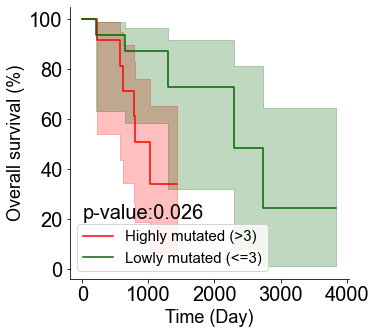

In [10]:
from matplotlib import rcParams

rcParams['font.family']='Arial'

mutation_samples=[int(i) for i in numbers.index[numbers>3] if int(i) in surv_df.index]
wildtype_samples=[int(i) for i in numbers.index[numbers<=3] if int(i) in surv_df.index]

gIT=surv_df.loc[mutation_samples,'OSday']
gIE=surv_df.loc[mutation_samples,'OS_event']
gIIT=surv_df.loc[wildtype_samples,'OSday']
gIIE=surv_df.loc[wildtype_samples,'OS_event']


plt.figure(figsize=(5,5))
ax=plt.subplot(111)
kmf=KaplanMeierFitter()
kmf.fit(gIT,gIE,label='Highly mutated (>3)')
ax=kmf.plot(ax=ax,c='red')
kmf=KaplanMeierFitter()
kmf.fit(gIIT,gIIE,label='Lowly mutated (<=3)')
kmf.plot(ax=ax,c='darkgreen')

plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,20,40,60,80,100],size=20)
plt.xticks([0,1000,2000,3000,4000],size=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

results=logrank_test(gIT,gIIT,gIE,gIIE,alpha=.95)
results.print_summary()

plt.text(0,0.2,'p-value:%.3f'%(results.p_value),size=20)

plt.legend(fontsize=15)
plt.xlabel('Time (Day)',size=18)
plt.ylabel('Overall survival (%)',size=18)

plt.savefig('../Figure2_C.png',
            bbox_inches='tight',quality=95)
plt.savefig('../Figure2_C.pdf',
            bbox_inches='tight',quality=95)

plt.show()

In [187]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import numpy as np
from matplotlib import rcParams

rcParams['font.family']='Arial'

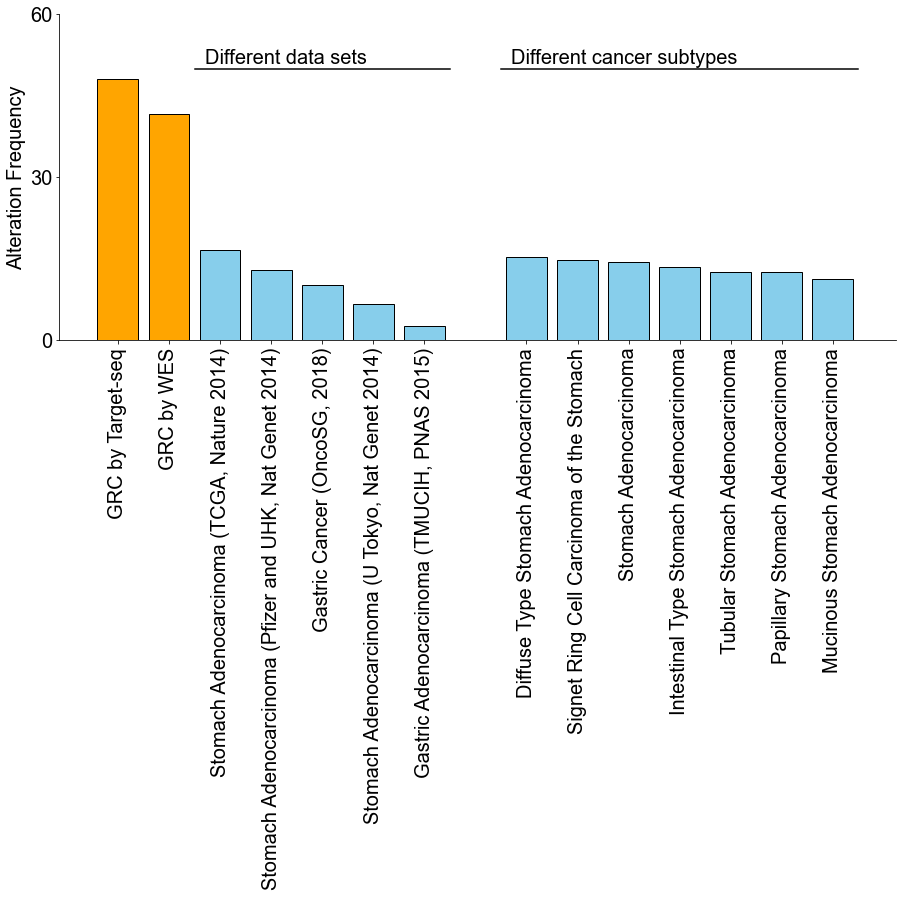

In [62]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib import rcParams

rcParams['font.family']='Arial'

different_data_sets_alteration_frequency=[
    ['GRC by Target-seq','GRC by WES',
     'Stomach Adenocarcinoma (TCGA, Nature 2014)',
     'Stomach Adenocarcinoma (Pfizer and UHK, Nat Genet 2014)',
     'Gastric Cancer (OncoSG, 2018)',
     'Stomach Adenocarcinoma (U Tokyo, Nat Genet 2014)',
     'Gastric Adenocarcinoma (TMUCIH, PNAS 2015)'],
    [48,41.7,16.61016949,13,10.20408163,6.666666667,2.564102564]]

different_cancer_types_alteration_frequency=[
    ['Diffuse Type Stomach Adenocarcinoma',
     'Signet Ring Cell Carcinoma of the Stomach',
     'Stomach Adenocarcinoma',
     'Intestinal Type Stomach Adenocarcinoma',
     'Tubular Stomach Adenocarcinoma',
     'Papillary Stomach Adenocarcinoma',
     'Mucinous Stomach Adenocarcinoma'],
    [15.27777778,14.81481481,14.39539347,13.58024691,12.65822785,12.5,11.36363636,]]

plt.figure(figsize=(15,6))
ax=plt.subplot(111)

plt.bar([i for i in range(len(different_data_sets_alteration_frequency[0]))],
        different_data_sets_alteration_frequency[1],color=['orange']*2+['skyblue']*5,ec='black')


plt.bar([i+8 for i in range(len(different_cancer_types_alteration_frequency[0]))],
        different_cancer_types_alteration_frequency[1],color='skyblue',ec='black')

plt.xticks([i for i in range(len(different_data_sets_alteration_frequency[0]))]+[i+8 for i in range(len(different_cancer_types_alteration_frequency[0]))],
           different_data_sets_alteration_frequency[0]+different_cancer_types_alteration_frequency[0],
           rotation=90,size=20)

plt.yticks([0,30,60],size=20)
plt.ylabel('Alteration Frequency',size=20)
plt.ylim(0,60)

plt.plot([1.5,6.5],[50,50],color='black')
plt.text(1.7,51,'Different data sets',size=20)

plt.plot([7.5,14.5],[50,50],color='black')
plt.text(7.7,51,'Different cancer subtypes',size=20)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../Figure4_A.pdf',bbox_inches='tight')
plt.savefig('../Figure4_A.png',bbox_inches='tight')


plt.show()

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib import rcParams

rcParams['font.family']='Arial'

different_data_sets_alteration_frequency=[
    ['GRC by Target-seq','GRC by WES',
     'Stomach Adenocarcinoma (TCGA, Nature 2014)',
     'Stomach Adenocarcinoma (Pfizer and UHK, Nat Genet 2014)',
     'Gastric Cancer (OncoSG, 2018)',
     'Stomach Adenocarcinoma (U Tokyo, Nat Genet 2014)',
     'Gastric Adenocarcinoma (TMUCIH, PNAS 2015)'],
    [48,41.7,16.61016949,13,10.20408163,6.666666667,2.564102564]]

different_cancer_types_alteration_frequency=[
    ['Diffuse Type Stomach Adenocarcinoma',
     'Signet Ring Cell Carcinoma of the Stomach',
     'Stomach Adenocarcinoma',
     'Intestinal Type Stomach Adenocarcinoma',
     'Tubular Stomach Adenocarcinoma',
     'Papillary Stomach Adenocarcinoma',
     'Mucinous Stomach Adenocarcinoma'],
    [15.27777778,14.81481481,14.39539347,13.58024691,12.65822785,12.5,11.36363636,]]

plt.figure(figsize=(15,6))
ax=plt.subplot(111)

plt.bar([i for i in range(len(different_data_sets_alteration_frequency[0]))],
        different_data_sets_alteration_frequency[1],color=['orange']*2+['skyblue']*5,ec='black')


plt.bar([i+8 for i in range(len(different_cancer_types_alteration_frequency[0]))],
        different_cancer_types_alteration_frequency[1],color='skyblue',ec='black')

plt.xticks([i for i in range(len(different_data_sets_alteration_frequency[0]))]+[i+8 for i in range(len(different_cancer_types_alteration_frequency[0]))],
           different_data_sets_alteration_frequency[0]+different_cancer_types_alteration_frequency[0],
           rotation=90,size=20)

plt.yticks([0,30,60],size=20)
plt.ylabel('Alteration Frequency',size=20)
plt.ylim(0,60)

plt.plot([1.5,6.5],[50,50],color='black')
plt.text(1.7,51,'Different data sets',size=20)

plt.plot([7.5,14.5],[50,50],color='black')
plt.text(7.7,51,'Different cancer subtypes',size=20)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../Figure4_A.pdf',bbox_inches='tight')
plt.savefig('../Figure4_A.png',bbox_inches='tight')


plt.show()

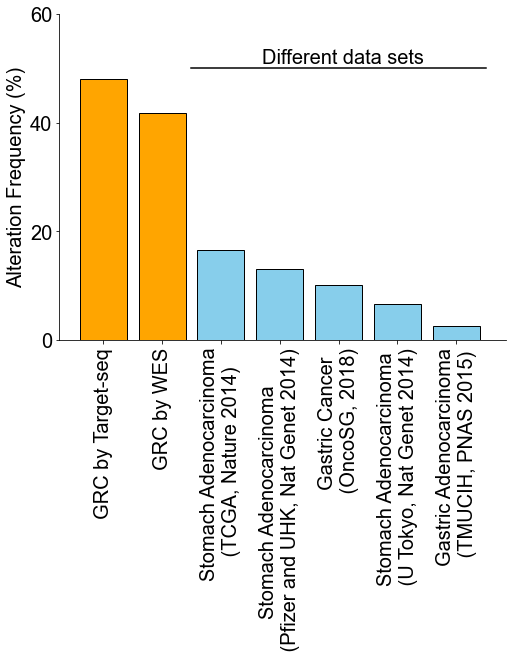

In [64]:
different_data_sets_alteration_frequency=[
    ['GRC by Target-seq','GRC by WES',
     'Stomach Adenocarcinoma\n (TCGA, Nature 2014)',
     'Stomach Adenocarcinoma\n (Pfizer and UHK, Nat Genet 2014)',
     'Gastric Cancer\n (OncoSG, 2018)',
     'Stomach Adenocarcinoma\n (U Tokyo, Nat Genet 2014)',
     'Gastric Adenocarcinoma\n (TMUCIH, PNAS 2015)'],
    [48,41.7,16.61016949,13,10.20408163,6.666666667,2.564102564]]

plt.figure(figsize=(8,6))
ax=plt.subplot(111)

plt.bar([i for i in range(len(different_data_sets_alteration_frequency[0]))],
        different_data_sets_alteration_frequency[1],color=['orange']*2+['skyblue']*5,ec='black')

plt.xticks([i for i in range(len(different_data_sets_alteration_frequency[0]))],
           different_data_sets_alteration_frequency[0],
           rotation=90,size=20)

plt.yticks([0,20,40,60],size=20)
plt.ylabel('Alteration Frequency (%)',size=20)
plt.ylim(0,60)

plt.plot([1.5,6.5],[50,50],color='black')
plt.text(2.7,51,'Different data sets',size=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../Figure4_A1.pdf',bbox_inches='tight')
plt.savefig('../Figure4_A1.png',bbox_inches='tight')

plt.show()

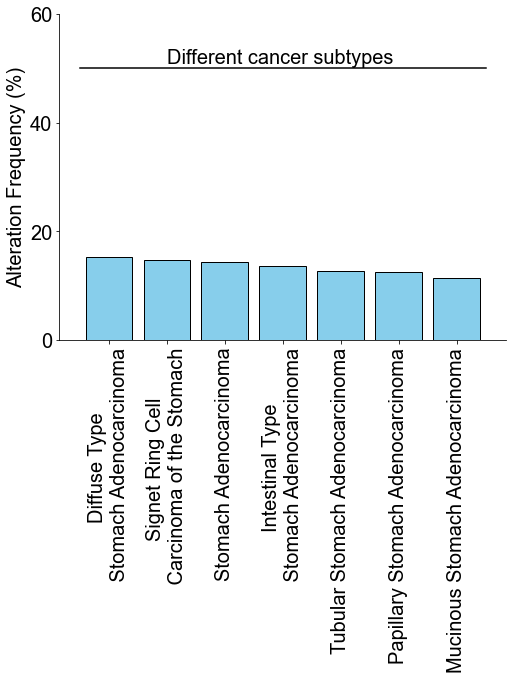

In [63]:
different_cancer_types_alteration_frequency=[
    ['Diffuse Type\n Stomach Adenocarcinoma',
     'Signet Ring Cell\n Carcinoma of the Stomach',
     'Stomach Adenocarcinoma',
     'Intestinal Type\n Stomach Adenocarcinoma',
     'Tubular Stomach Adenocarcinoma',
     'Papillary Stomach Adenocarcinoma',
     'Mucinous Stomach Adenocarcinoma'],
    [15.27777778,14.81481481,14.39539347,13.58024691,12.65822785,12.5,11.36363636,]]

plt.figure(figsize=(8,6))
ax=plt.subplot(111)

plt.bar([i for i in range(len(different_cancer_types_alteration_frequency[0]))],
        different_cancer_types_alteration_frequency[1],color='skyblue',ec='black')

plt.xticks([i for i in range(len(different_cancer_types_alteration_frequency[0]))],
           different_cancer_types_alteration_frequency[0],
           rotation=90,size=20)

plt.yticks([0,20,40,60],size=20)
plt.ylabel('Alteration Frequency (%)',size=20)
plt.ylim(0,60)

plt.plot([-0.5,6.5],[50,50],color='black')
plt.text(1,51,'Different cancer subtypes',size=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../Figure4_A2.pdf',bbox_inches='tight')
plt.savefig('../Figure4_A2.png',bbox_inches='tight')


